In [1]:
#Project 

## Importing nessray libraries

In [3]:
import pandas as pd 
import numpy as np 

import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder

In [4]:
# ploting functions

def plot_bar(data, x_column, y_column, title='Bar Plot', xlabel='Category', ylabel='Value', 
             color='#01394c', orientation='vertical', figsize=(10, 7)):
    if orientation not in ['vertical', 'horizontal']:
        raise ValueError("Orientation must be either 'vertical' or 'horizontal'.")

    x = data[x_column]
    y = data[y_column]

    plt.figure(figsize=figsize)
    if orientation == 'vertical':
        plt.bar(x, y, color=color)
    elif orientation == 'horizontal':
        plt.barh(x, y, color=color)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    if orientation == 'vertical':
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [5]:
def plot_histogram(series, title='Histogram', xlabel='Value', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman'):
    mean_val = series.mean()

    plt.figure(figsize=figsize)
    sns.histplot(series, kde=show_kde, bins=bins, color=color, edgecolor='black')
    
    if show_mean:
        plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        plt.legend(fontsize=12)

    plt.title(title, fontsize=16, fontname=fontname)
    plt.xlabel(xlabel, fontsize=14, fontname=fontname)
    plt.ylabel(ylabel, fontsize=14, fontname=fontname)
    plt.grid(visible=False)
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_scatter(series, title='Scatter Plot', xlabel='Index', ylabel='Value',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman'):

    plt.figure(figsize=figsize)
    plt.scatter(range(len(series)), series, color=color, alpha=alpha, s=point_size)

    plt.title(title, fontsize=15, fontname=fontname)
    plt.xlabel(xlabel, fontsize=12, fontname=fontname)
    plt.ylabel(ylabel, fontsize=12, fontname=fontname)
    plt.tight_layout()

    plt.tight_layout()
    plt.show()

In [7]:
def plot_categorical_bar(values, labels, title='Bar Plot', xlabel='Category', ylabel='Count',
                         colors=None, fontname='Times New Roman', figsize=(8, 5), 
                         label_fontsize=12, title_fontsize=15, value_fontsize=7, 
                         text_offset=5):

    if colors is None:
        female_colors = plt.cm.Reds(np.linspace(0.4, 1, len(labels)//2))
        male_colors = plt.cm.Blues(np.linspace(0.4, 1, len(labels) - len(female_colors)))
        
        colors = np.concatenate((female_colors, male_colors))
    
    plt.figure(figsize=figsize)

    plt.bar(labels, values, color=colors)

    for i, val in enumerate(values):
        plt.text(i, val + text_offset, str(val), ha='center', fontsize=value_fontsize)

    plt.title(title, fontsize=title_fontsize, fontname=fontname)
    plt.xlabel(xlabel, fontsize=label_fontsize, fontname=fontname)
    plt.ylabel(ylabel, fontsize=label_fontsize, fontname=fontname)
    
    plt.tight_layout()
    plt.show()

In [8]:


def replace_outliers_with_nan(dataframe, column, mean, std):
    # Convert the column to numeric, coercing errors to NaN
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')
    
    # Drop NaN values and calculate Z-scores
    SeriesOfData = dataframe[column].dropna()
    ZScore = (SeriesOfData - mean) / std
    
    # Identify outliers (Z-score > 3 or < -3)
    outliers = SeriesOfData[abs(ZScore) > 3]
    
    # Print statistics
    print("Mean:", mean)
    print("Standard Deviation:", std)
    print("Outliers: \n", outliers)
    print("Number of rows containing outliers:", len(outliers))
    
    # Replace outliers with NaN in the original DataFrame
    dataframe.loc[dataframe.index.intersection(outliers.index), column] = np.nan
    
    return dataframe.head(5)

In [9]:
# Importing the first dataframe as csv file gained form kagel by downloading the file manually
lifeExpectancyDataframe = pd.read_csv("Life Expectancy Data.csv")

# Displaying the fist ten rows of the dataframe
lifeExpectancyDataframe.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [10]:
# Creating a copy from the origonal dataframe 
lifeExpectancyDataframe_copy = lifeExpectancyDataframe.copy()

In [11]:
# Importing the second dataframe file gained API request
# Jerusalem coordinates - Our target 
lat, lon = 31.7683, 35.2137

# Time period
start_date = "2024-03-15"
end_date = "2024-04-05"

# Request 
url = (
    f"https://air-quality-api.open-meteo.com/v1/air-quality"
    f"?latitude={lat}&longitude={lon}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&hourly=pm10,pm2_5,carbon_monoxide,ozone"
    f"&timezone=auto"
)

response = requests.get(url)
data = response.json()

# Validating the responce 
print("Response status: " +str(response))

# Convert to DataFrame
airQualityDataframe = pd.DataFrame({
    'timestamp': data['hourly']['time'],
    'pm10': data['hourly']['pm10'],
    'pm2_5': data['hourly']['pm2_5'],
    'carbon_monoxide': data['hourly']['carbon_monoxide'],
    'ozone': data['hourly']['ozone']
})

# Saving the data into csv file
airQualityDataframe.to_csv("jerusalem_air_quality_openmeteo.csv", index=False)

# Validating the saving of the dataframe from the API request into the dataframe
print(f"Saved {len(airQualityDataframe)} rows to 'jerusalem_air_quality_openmeteo.csv'")

Response status: <Response [200]>
Saved 528 rows to 'jerusalem_air_quality_openmeteo.csv'


In [12]:
# Displaying fist 10 rows of the dataframe
print(airQualityDataframe.head(10))

          timestamp  pm10  pm2_5  carbon_monoxide  ozone
0  2024-03-15T00:00  31.5   19.9            184.0   57.0
1  2024-03-15T01:00  31.6   19.1            171.0   58.0
2  2024-03-15T02:00  27.1   16.0            165.0   59.0
3  2024-03-15T03:00  23.7   15.9            156.0   62.0
4  2024-03-15T04:00  22.9   16.2            146.0   70.0
5  2024-03-15T05:00  21.8   14.4            141.0   71.0
6  2024-03-15T06:00  21.8   14.4            142.0   69.0
7  2024-03-15T07:00  23.9   14.3            148.0   66.0
8  2024-03-15T08:00  23.7   14.0            160.0   66.0
9  2024-03-15T09:00  18.7   11.8            153.0   76.0


In [13]:
# Creating a copy from the origonal dataframe 
airQualityDataframe_copy = airQualityDataframe.copy()

In [14]:
## inspecting the dataframe to start the cleaning process: 

In [15]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [16]:
lifeExpectancyDataframe.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
airQualityDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        528 non-null    object 
 1   pm10             528 non-null    float64
 2   pm2_5            528 non-null    float64
 3   carbon_monoxide  528 non-null    float64
 4   ozone            528 non-null    float64
dtypes: float64(4), object(1)
memory usage: 20.8+ KB


In [18]:
airQualityDataframe.isna().sum()

timestamp          0
pm10               0
pm2_5              0
carbon_monoxide    0
ozone              0
dtype: int64

In [19]:
# Inspecting the naming style of heading 
print(lifeExpectancyDataframe.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [20]:
# Strip leading and trailing spaces from all column names
lifeExpectancyDataframe.columns = lifeExpectancyDataframe.columns.str.strip()

# Verify the cleaned column names
print(lifeExpectancyDataframe.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [21]:
# Rearranging the data ascending based on the Year feature for better understanding
lifeExpectancyDataframe.sort_values(by='Year', ascending=True, inplace=True) 
lifeExpectancyDataframe.reset_index(drop=True, inplace=True)
lifeExpectancyDataframe

Country  Year      Status  \
0                                              Zimbabwe  2000  Developing   
1                                                Belize  2000  Developing   
2                                            Kazakhstan  2000  Developing   
3                                     Equatorial Guinea  2000  Developing   
4                                           South Sudan  2000  Developing   
...                                                 ...   ...         ...   
2933  United Kingdom of Great Britain and Northern I...  2015   Developed   
2934                                       Saudi Arabia  2015  Developing   
2935                                           Bulgaria  2015   Developed   
2936                                             Brazil  2015  Developing   
2937                                        Afghanistan  2015  Developing   

      Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0                46.0            665.0             24     1.68   
1                68.3            196.0              0     4.79   
2                63.9            292.0              9     6.00   
3                52.7            336.0              3     4.46   
4                48.9             38.0             31      NaN   
...               ...              ...            ...      ...   
2933             81.2             69.0              3    10.66   
2934             74.5             88.0              7      NaN   
2935             74.5            137.0              0      NaN   
2936             75.0            142.0             42      NaN   
2937             65.0            263.0             62     0.01   

      percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0                   0.000000         79.0     1483  ...   78.0   
1                 219.023984         76.0        0  ...   91.0   
2                 112.541157         99.0      245  ...   96.0   
3                  14.954513          NaN        0  ...   41.0   
4                   0.000000          NaN        0  ...    NaN   
...                      ...          ...      ...  ...    ...   
2933                0.000000          NaN       91  ...   96.0   
2934                0.000000         98.0      219  ...   97.0   
2935                0.000000         92.0        0  ...   91.0   
2936                0.000000         96.0      214  ...   98.0   
2937               71.279624         65.0     1154  ...    6.0   

      Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
0                  7.10        78.0      43.5   547.358878  12222251.0   
1                  3.98        91.0       0.3  3364.423711    247315.0   
2                  4.16        97.0       0.1  1229.958000  14883626.0   
3                  2.73        34.0       1.9   172.684910    614323.0   
4                   NaN         NaN       2.7          NaN     67656.0   
...                 ...         ...       ...          ...         ...   
2933                NaN        96.0       0.1          NaN         NaN   
2934                NaN        98.0       0.1  2732.861720         NaN   
2935                NaN        91.0       0.1  6993.477360   7177991.0   
2936                NaN        96.0       0.1  8757.262200   2596218.0   
2937               8.16        65.0       0.1   584.259210  33736494.0   

      thinness  1-19 years  thinness 5-9 years  \
0                     11.0                11.2   
1                      3.8                 3.7   
2                      2.7                 2.7   
3                      1.7                 1.6   
4                      NaN                 NaN   
...                    ...                 ...   
2933                   0.8                 0.6   
2934                   7.8                 7.6   
2935                   1.9                 1.8   
2936                   2.7                 2.6   
2937                  17.2                17.3   

      Income composition of resources  Schoolin

## _Exploration First Dataframe -before cleaning:_

### Column one: 

In [24]:
# checking for unique items and thier count
len(lifeExpectancyDataframe['Country'].unique())
print(lifeExpectancyDataframe['Country'].value_counts())

Country
Zimbabwe                            16
Peru                                16
Saint Lucia                         16
Saint Vincent and the Grenadines    16
Bulgaria                            16
                                    ..
Niue                                 1
Cook Islands                         1
Monaco                               1
Palau                                1
San Marino                           1
Name: count, Length: 193, dtype: int64


In [25]:
# checking for missing items and their count
print("Nan values sum: "+ str(lifeExpectancyDataframe['Country'].isna().sum()))

Nan values sum: 0


In [26]:
# checking for duplicated items and thier count
duplicates = lifeExpectancyDataframe.duplicated(subset=['Country', 'Year'], keep='first')
duplicates.sum()

0

In [27]:
# Insuring the type is string 
lifeExpectancyDataframe['Country'] = lifeExpectancyDataframe['Country'].astype(str)

### Column two: 

In [29]:
# checking for unique items and thier count
len(lifeExpectancyDataframe['Year'].unique())
print(lifeExpectancyDataframe['Year'].value_counts())

Year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
Name: count, dtype: int64


In [30]:
# checking for missing items and their count
print("Nan values sum: "+str(lifeExpectancyDataframe['Year'].isna().sum()))

Nan values sum: 0


In [31]:
# checking for duplicated items and thier count
duplicates = lifeExpectancyDataframe.duplicated(subset=['Year', 'Country'], keep='first')
duplicates.sum()

0

In [32]:
# Investigating the data statically
lifeExpectancyDataframe['Year'].describe()

count    2938.000000
mean     2007.518720
std         4.613841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: Year, dtype: float64

In [33]:
# Insuring the type is int because years are natural numbers so I can use int 16 to save more space in the memory
lifeExpectancyDataframe['Year'] = lifeExpectancyDataframe['Year'].astype('int16')

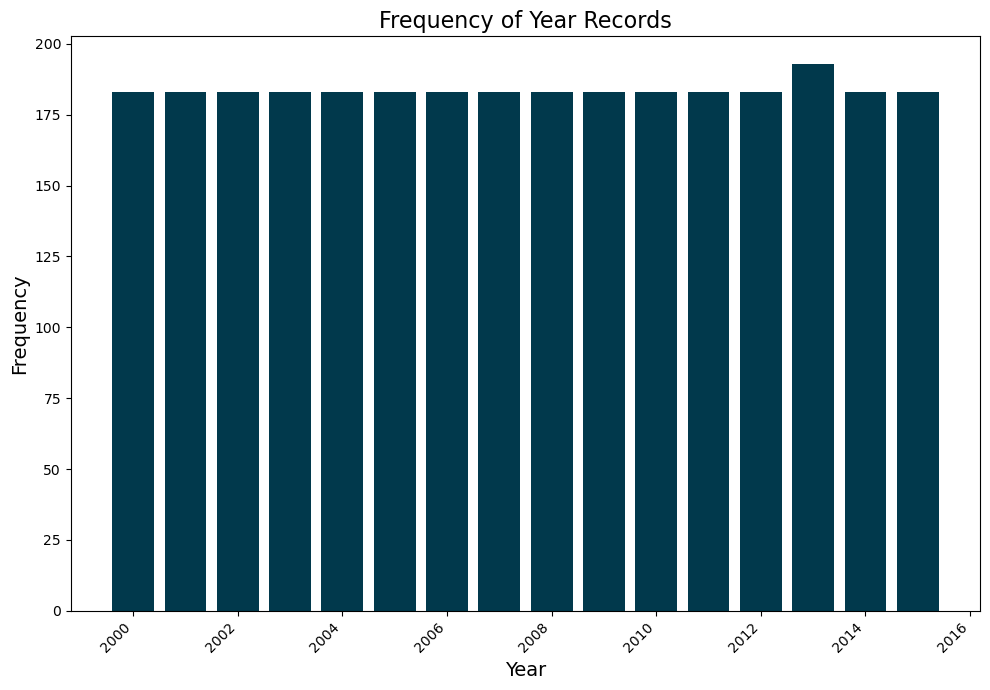

In [34]:
# Plotting the distribution of years
year_counts = lifeExpectancyDataframe['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Frequency']

# Plot function
plot_bar(data=year_counts, 
         x_column='Year', 
         y_column='Frequency', 
         title="Frequency of Year Records", 
         xlabel="Year", 
         ylabel="Frequency", 
         color='#01394c', 
         orientation='vertical')

As can be noticed from the figure the recordes in the year 2014 are set to be the highest, while the rest of the years has same number of records. 

In [36]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int16  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Column three: 

In [38]:
# investigating the data of the column 
lifeExpectancyDataframe['Life expectancy'].head(10)

0    46.0
1    68.3
2    63.9
3    52.7
4    48.9
5    57.3
6    55.4
7    51.9
8    55.0
9    64.1
Name: Life expectancy, dtype: float64

From the cell above we can see that the column contains some non-real numbers or float numbers as a start I will not turn it into int values. 

In [40]:
# checking for missing items and their count
print("Nan values sum: "+str(lifeExpectancyDataframe['Life expectancy'].isna().sum()))

Nan values sum: 10


In [41]:
# Investigating the data statically 
lifeExpectancyDataframe['Life expectancy'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

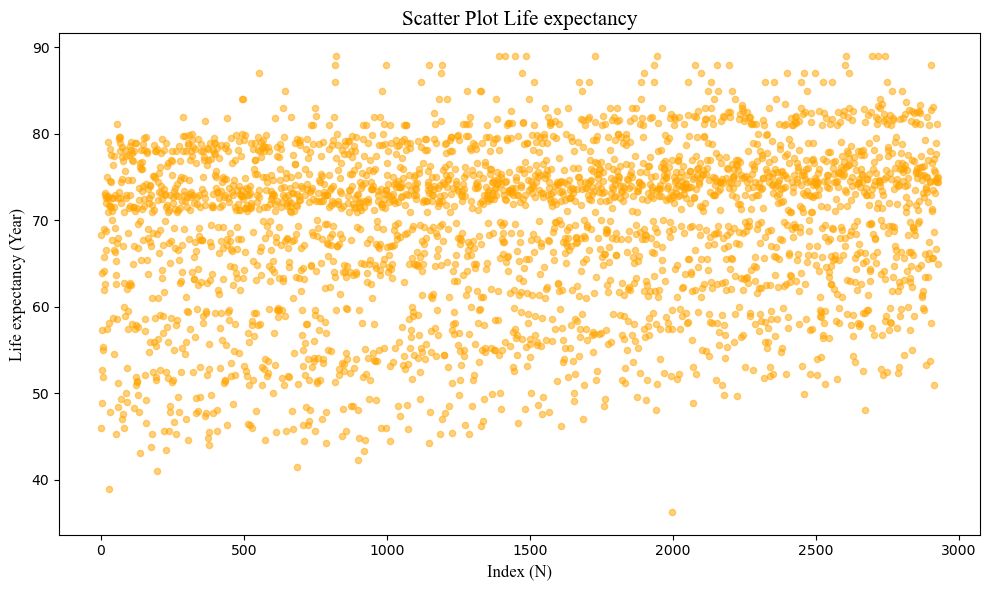

In [42]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Life expectancy'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Life expectancy', xlabel='Index (N)', ylabel='Life expectancy (Year)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

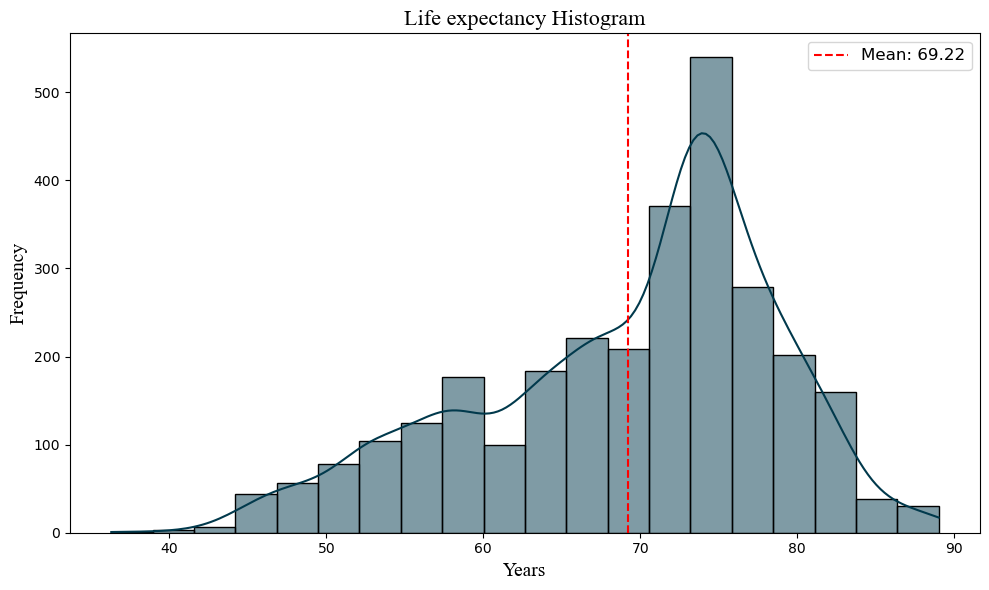

In [43]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Life expectancy'], errors='coerce').dropna()

plot_histogram(Data, title='Life expectancy Histogram', xlabel='Years', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')

From the plot above we can see the average of life expectancy is around 69 years, and the most frequent value is around 75 years with a low thresholds of 89 and 36.
The previous cell a general understanding to the distribution of the data can be generated as following, the min age in the dataset is aproximatly _36_ years and the highest is _89_ years with an avg of _69_ pointing to a normal life expectancy.

In [45]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Life expectancy']= lifeExpectancyDataframe['Life expectancy'].astype('float16')

### Column four: 

In [47]:
# checking for missing items and their count
print("Nan values sum: "+str(lifeExpectancyDataframe['Status'].isna().sum()))

Nan values sum: 0


In [48]:
# Investigating the feature enteries 
print("Nan values sum: "+str(lifeExpectancyDataframe['Status'].isna().sum()))

Nan values sum: 0


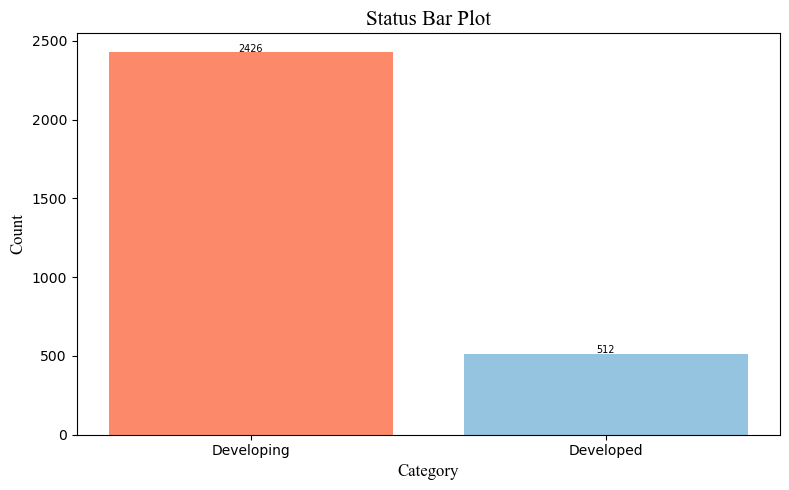

In [49]:
# Bar plot plotting
Data = lifeExpectancyDataframe['Status'].value_counts()
labels = Data.index
Data = Data.values

plot_categorical_bar(Data, labels, title='Status Bar Plot', xlabel='Category', ylabel='Count',
                     colors=None, fontname='Times New Roman', figsize=(8, 5), 
                     label_fontsize=12, title_fontsize=15, value_fontsize=7, 
                     text_offset=5)

From the figure above we can notice the numbers of developing countries is larger by four times than the developed countries pointing to more poor communities.

In [51]:
# Changing the type into category to save more space and arrange the data better
lifeExpectancyDataframe['Status'] = lifeExpectancyDataframe['Status'].astype('category')

### Column five: 

In [53]:
# investigating the data of the column 
lifeExpectancyDataframe['Adult Mortality'].head(10)

0    665.0
1    196.0
2    292.0
3    336.0
4     38.0
5    397.0
6    279.0
7    428.0
8    355.0
9    222.0
Name: Adult Mortality, dtype: float64

In [54]:
# checking for missing items and their count
print("Nan values sum: "+str(lifeExpectancyDataframe['Adult Mortality'].isna().sum()))

Nan values sum: 10


In [55]:
# Investigating the data statically 
lifeExpectancyDataframe['Adult Mortality'].describe()

count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64

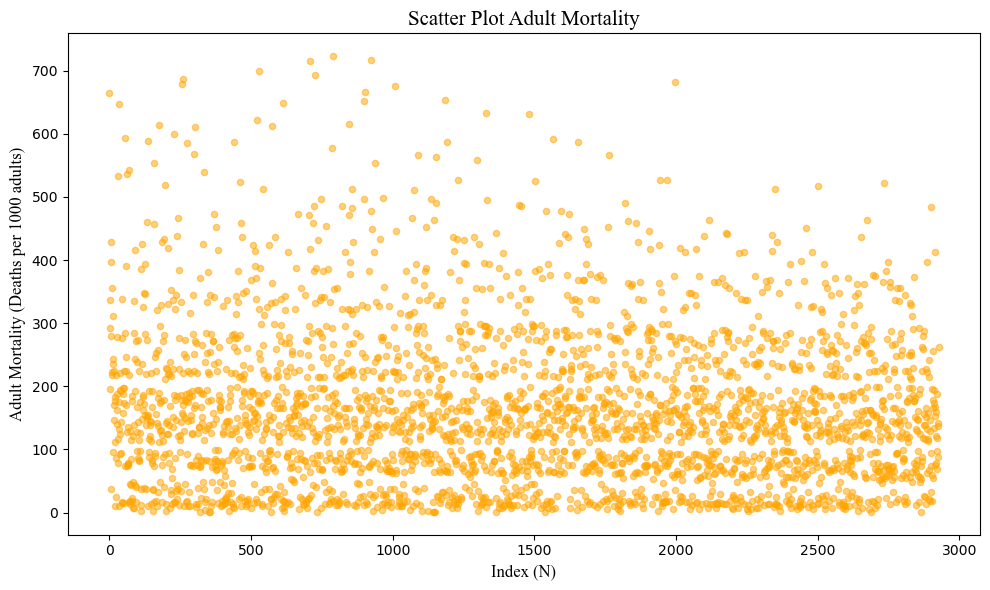

In [56]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Adult Mortality'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Adult Mortality', xlabel='Index (N)', ylabel='Adult Mortality (Deaths per 1000 adults)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

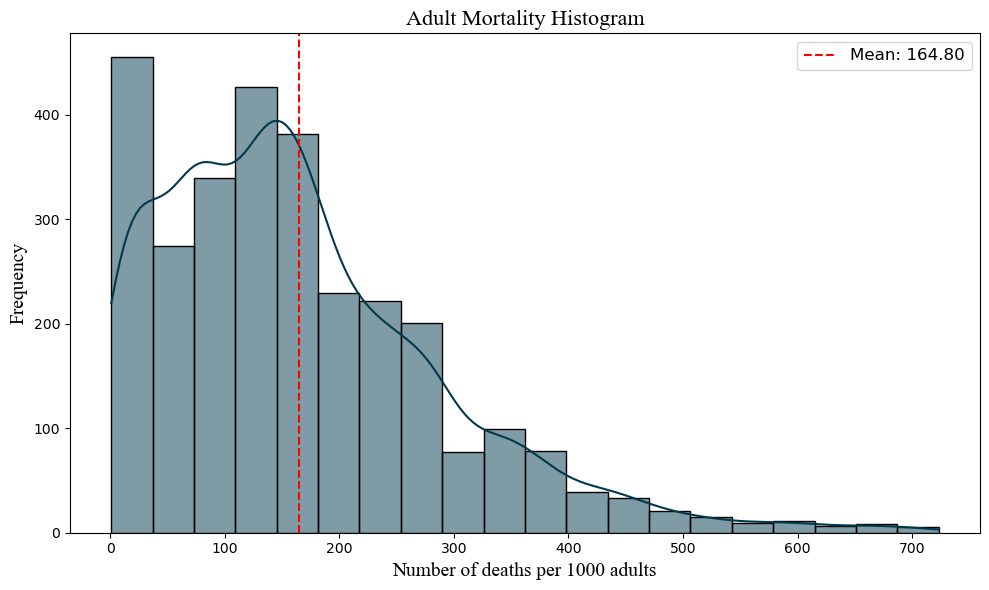

In [57]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Adult Mortality'], errors='coerce').dropna()

plot_histogram(Data, title='Adult Mortality Histogram', xlabel='Number of deaths per 1000 adults', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')

From the figure above we can notice that the data is more skweed to the right side, with mean of 164.8 and low high values. The feature renders the numbers of people how dies from the X to Y for each _1000_ person. Based on the relative fact we can say the some countries have high death rates but the frequency of the countires is low.  
As a comclusion the numbers of personal to die with in the range is a kind of low. 

In [59]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Adult Mortality']= lifeExpectancyDataframe['Adult Mortality'].astype('float16')

### Column six:

In [61]:
# Investigating the data of the column 
lifeExpectancyDataframe['infant deaths'].head(10)

0    24
1     0
2     9
3     3
4    31
5    51
6    25
7    77
8    45
9     0
Name: infant deaths, dtype: int64

In [62]:
# Renaming the feature
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'infant deaths': 'Infant deaths'})

In [63]:
# checking for missing items and their count
print("Nan values sum: "+str(lifeExpectancyDataframe['Infant deaths'].isna().sum()))

Nan values sum: 0


In [64]:
# Investigating the data statically 
lifeExpectancyDataframe['Infant deaths'].describe()

count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: Infant deaths, dtype: float64

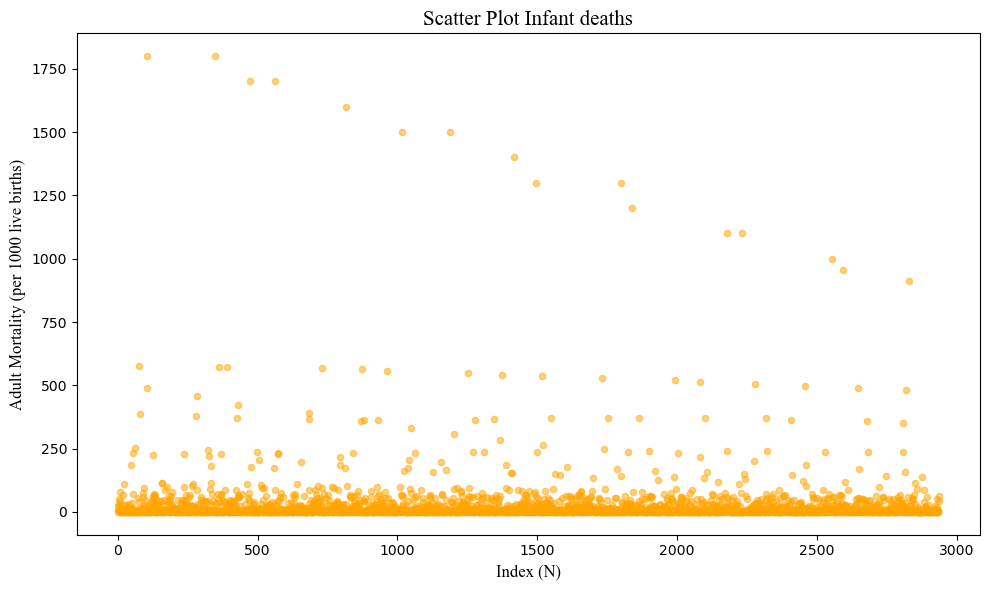

In [65]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Infant deaths'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Infant deaths', xlabel='Index (N)', ylabel='Adult Mortality (per 1000 live births)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

The measuring unit of the feature is the number of infant deaths per __1000__ live births, indicating a strong presence of outliers.

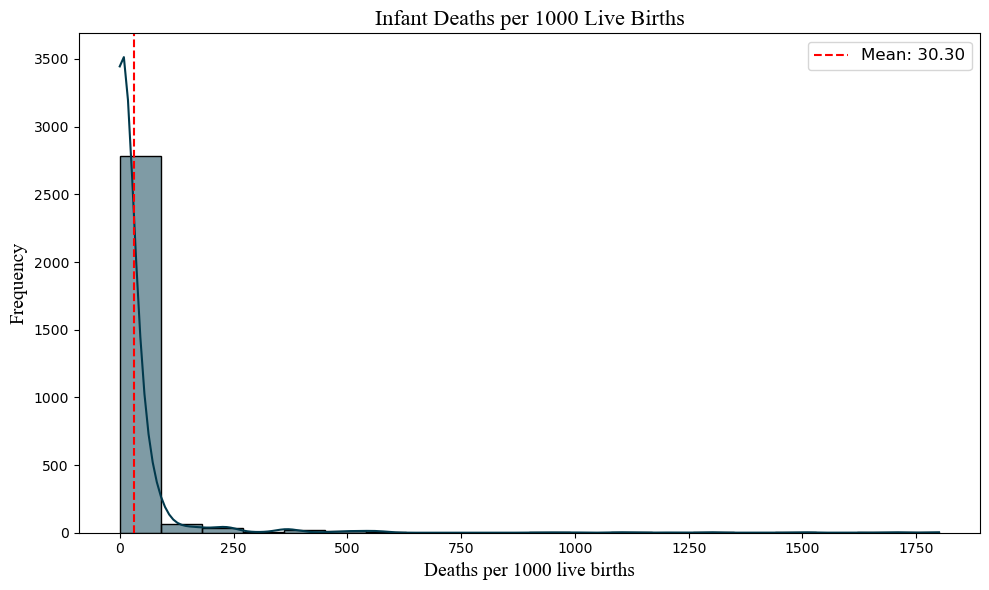

In [67]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Infant deaths'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Infant Deaths per 1000 Live Births',
               xlabel='Deaths per 1000 live births',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The previous plot shows possible outliers as the range maxed at 1000 and we have values exceeding the range of measuring. 

In [69]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Infant deaths']= lifeExpectancyDataframe['Infant deaths'].astype('float16')

### Column seven: 

In [71]:
# Renaming the feature
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'Alcohol': 'Alcohol consumption'})

In [72]:
# Investigating the data of the column 
lifeExpectancyDataframe['Alcohol consumption'].head(10)

0    1.68
1    4.79
2    6.00
3    4.46
4     NaN
5    7.30
6    1.34
7    1.51
8    0.01
9    0.46
Name: Alcohol consumption, dtype: float64

In [73]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Alcohol consumption'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 194


In [74]:
# Suming the number of known values
data = lifeExpectancyDataframe['Alcohol consumption']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2744


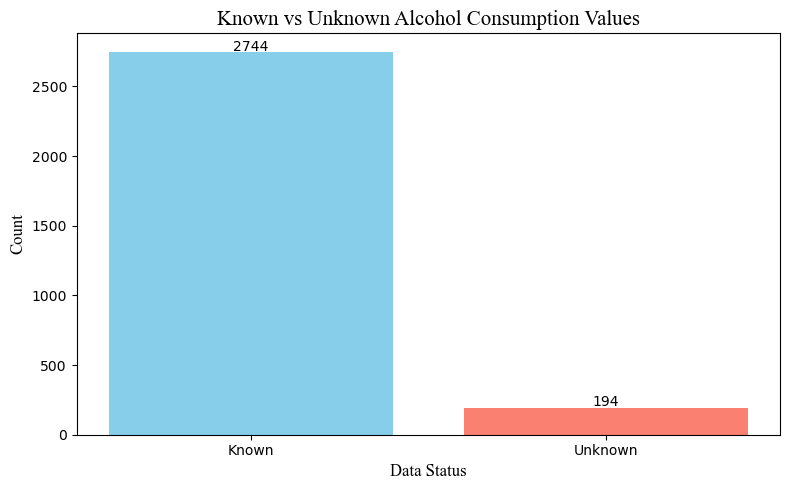

In [75]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Alcohol Consumption Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

In [76]:
# Investigating the data statically 
lifeExpectancyDataframe['Alcohol consumption'].describe()

count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol consumption, dtype: float64

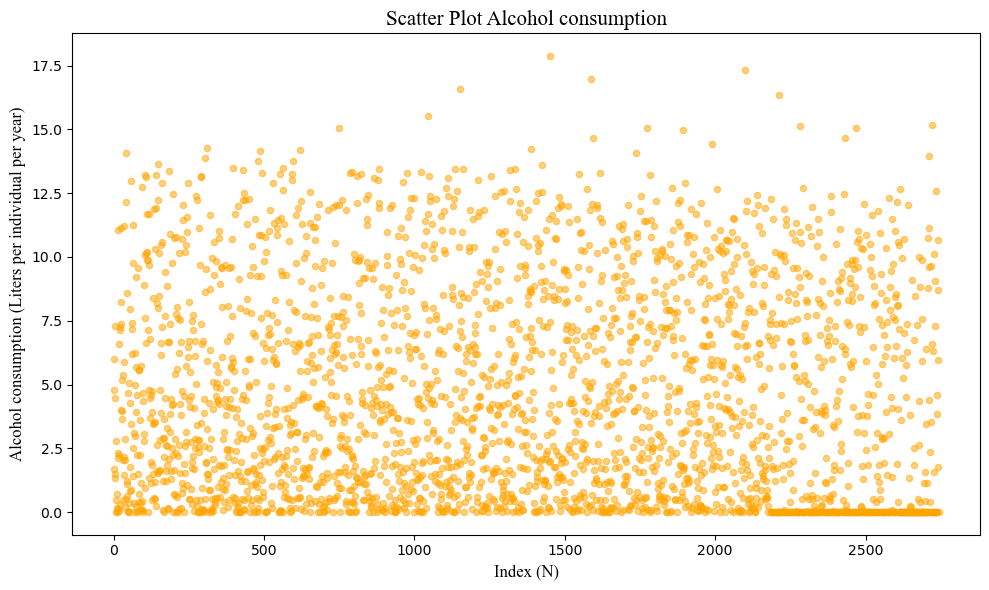

In [77]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Alcohol consumption'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Alcohol consumption', xlabel='Index (N)', ylabel='Alcohol consumption (Liters per individual per year)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

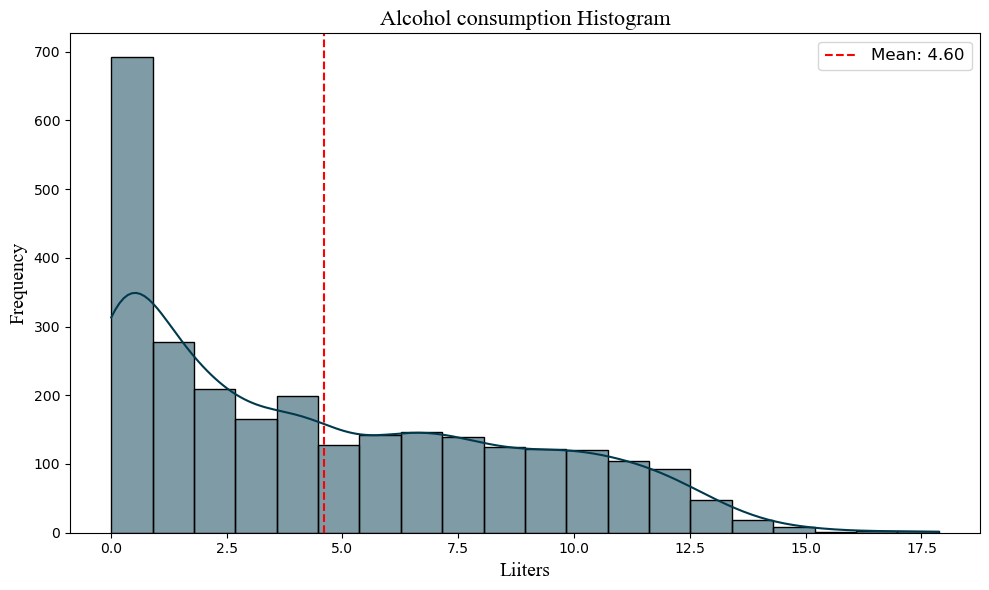

In [78]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Alcohol consumption'], errors='coerce').dropna()

plot_histogram(Data, title='Alcohol consumption Histogram', xlabel='Liiters', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')

The previous plots shows a right skweeing and higher density of the data between the _0.0_ and _2.5_ with possible small number of outliers as well as a huge number of missing values. 

In [80]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Alcohol consumption']= lifeExpectancyDataframe['Alcohol consumption'].astype('float16')

### Column eight

In [82]:
# Renaming the feature
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'percentage expenditure': 'Percentage expenditure'})

In [83]:
# Investigating the data of the column 
lifeExpectancyDataframe['Percentage expenditure'].head(10)

0      0.000000
1    219.023984
2    112.541157
3     14.954513
4      0.000000
5     45.963808
6     37.381820
7      0.681686
8      0.000000
9     11.075433
Name: Percentage expenditure, dtype: float64

In [84]:
# checking for missing items and their count
print("Nan values sum: " + str(lifeExpectancyDataframe['Percentage expenditure'].isna().sum()))

Nan values sum: 0


In [85]:
# Investigating the data statically 
lifeExpectancyDataframe['Percentage expenditure'].describe()

count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: Percentage expenditure, dtype: float64

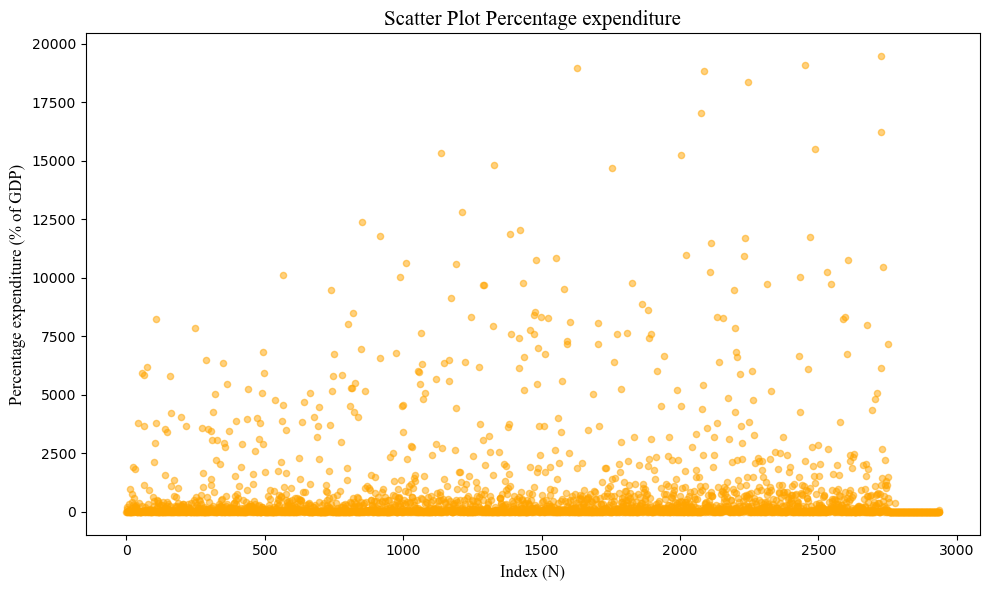

In [86]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Percentage expenditure'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Percentage expenditure', xlabel='Index (N)', ylabel='Percentage expenditure (% of GDP)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

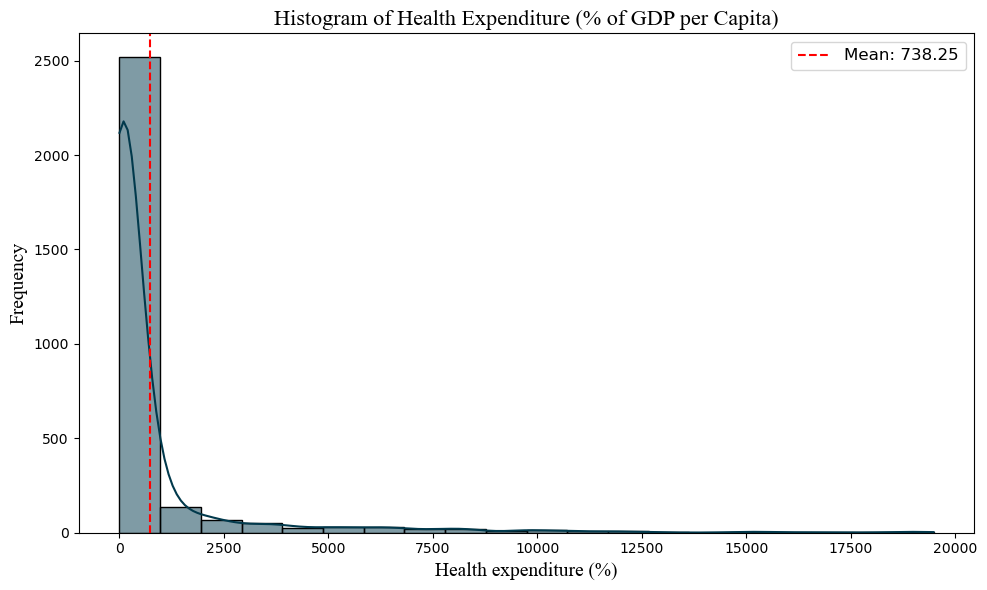

In [87]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Percentage expenditure'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Health Expenditure (% of GDP per Capita)',
               xlabel='Health expenditure (%)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

the previous figure points to a high right skewed data with possible outliers and high density of data between _0-2500_. 

In [89]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Percentage expenditure']= lifeExpectancyDataframe['Percentage expenditure'].astype('float16')

### Column nine:

In [91]:
# Investigating the data of the column 
lifeExpectancyDataframe['Hepatitis B'].head(10) 

0    79.0
1    76.0
2    99.0
3     NaN
4     NaN
5    73.0
6     NaN
7     NaN
8     NaN
9     9.0
Name: Hepatitis B, dtype: float64

In [92]:
# Investigating the data statically
lifeExpectancyDataframe['Hepatitis B'].describe()

count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [93]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Hepatitis B'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 553


In [94]:
# Suming the number of known values
data = lifeExpectancyDataframe['Hepatitis B']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2385


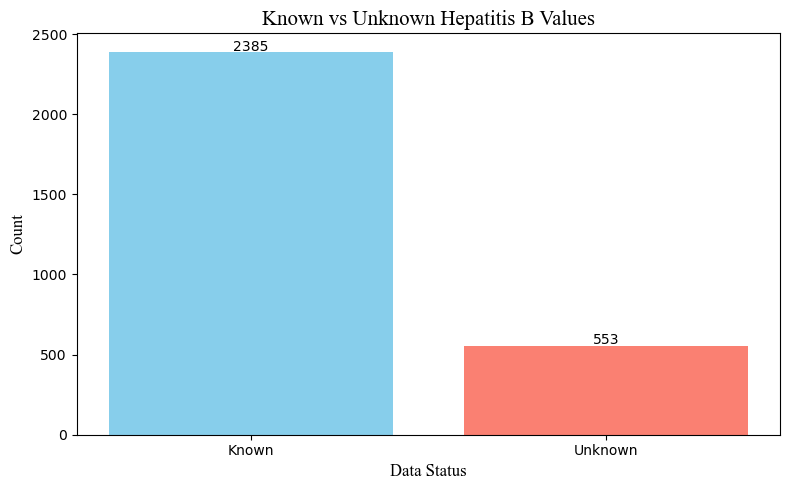

In [95]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Hepatitis B Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

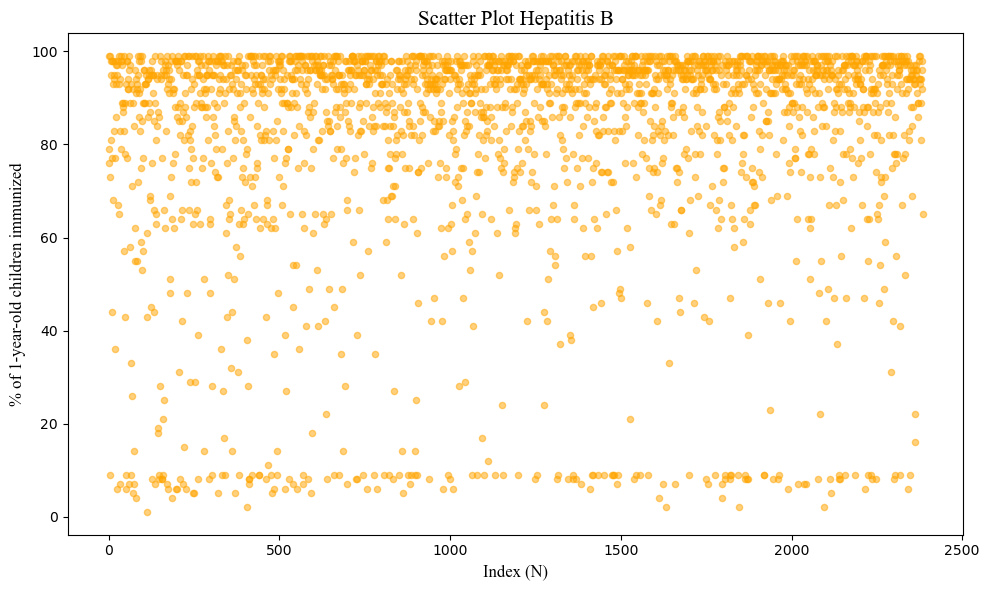

In [96]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Hepatitis B'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Hepatitis B', xlabel='Index (N)', ylabel='% of 1-year-old children immunized',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

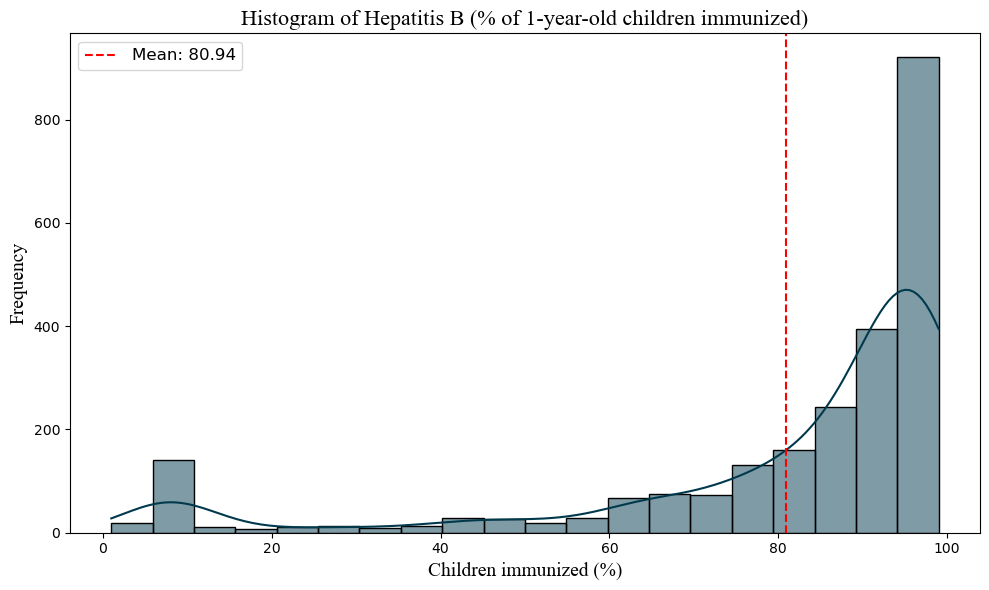

In [97]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Hepatitis B'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Hepatitis B (% of 1-year-old children immunized)',
               xlabel='Children immunized (%)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

From the figures above we can see the data is skewed more to the left, with high mean pointing to the high percentage of babies being immunized.

In [99]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Hepatitis B']= lifeExpectancyDataframe['Hepatitis B'].astype('float16')

### Column ten: 

In [101]:
# Investigating the data of the column 
lifeExpectancyDataframe['Measles'].head(10)

0     1483
1        0
2      245
3        0
4        0
5     1459
6     4244
7    21002
8     3965
9        0
Name: Measles, dtype: int64

In [102]:
# Investigating the data statically
lifeExpectancyDataframe['Measles'].describe()

count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles, dtype: float64

In [103]:
# checking for missing items and their count
print("Nan values sum: " + str(lifeExpectancyDataframe['Measles'].isna().sum()))

Nan values sum: 0


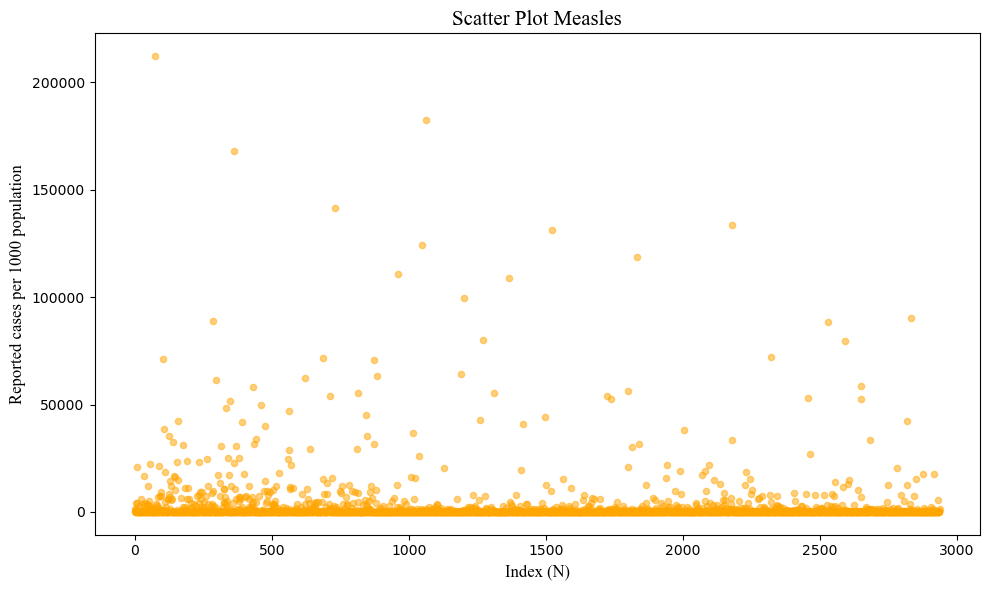

In [104]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Measles'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Measles', xlabel='Index (N)', ylabel='Reported cases per 1000 population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

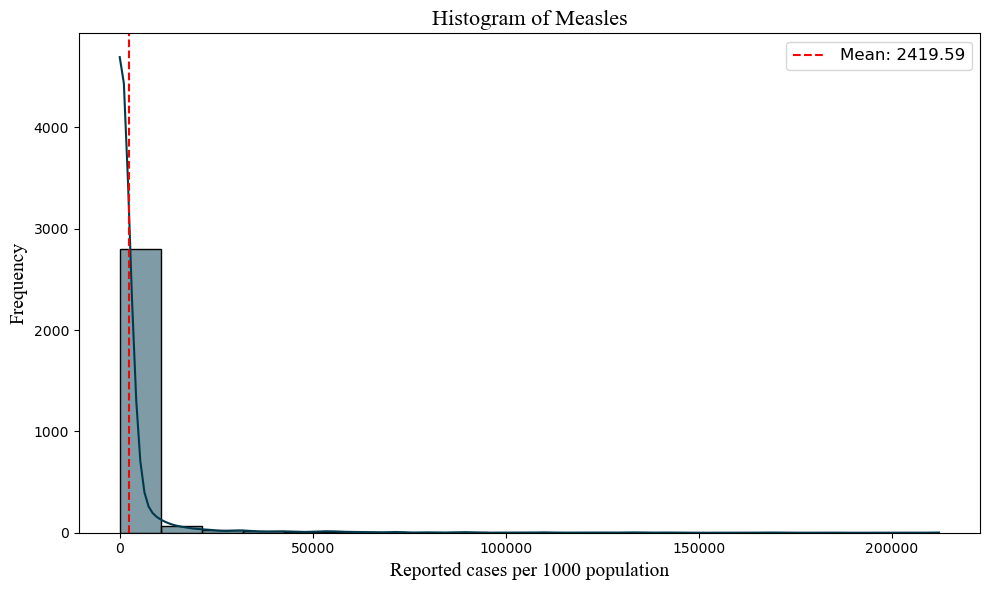

In [105]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Measles'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Measles',
               xlabel='Reported cases per 1000 population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The previous figures indicates possible outliers, and the data looks more skewed to the right side. 

In [107]:
# The data will be stored as int but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Measles']= lifeExpectancyDataframe['Measles'].astype('uint16')

### Column eleven:

In [109]:
# Investigating the data of the column 
lifeExpectancyDataframe['BMI'].head(10)

0    25.5
1     4.8
2    43.9
3    18.3
4     NaN
5     4.1
6    18.4
7    14.4
8    17.8
9    67.9
Name: BMI, dtype: float64

In [110]:
# Investigating the data statically
lifeExpectancyDataframe['BMI'].describe()

count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name: BMI, dtype: float64

In [111]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['BMI'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 34


In [112]:
# Suming the number of known values
data = lifeExpectancyDataframe['BMI']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2904


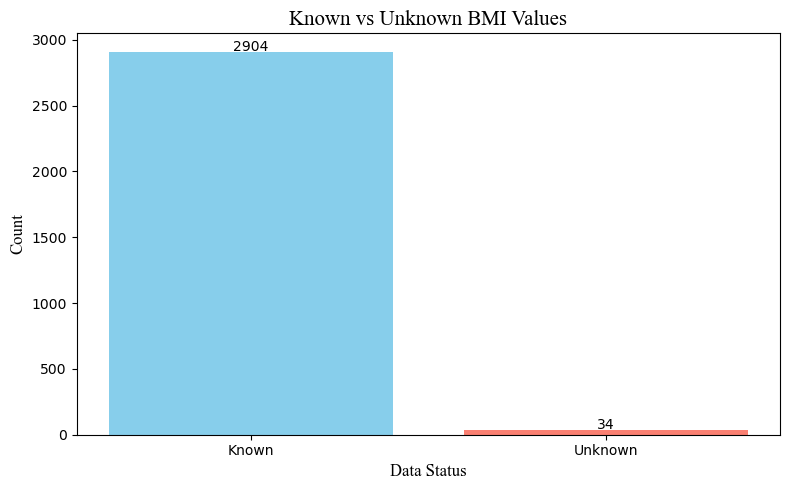

In [113]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown BMI Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

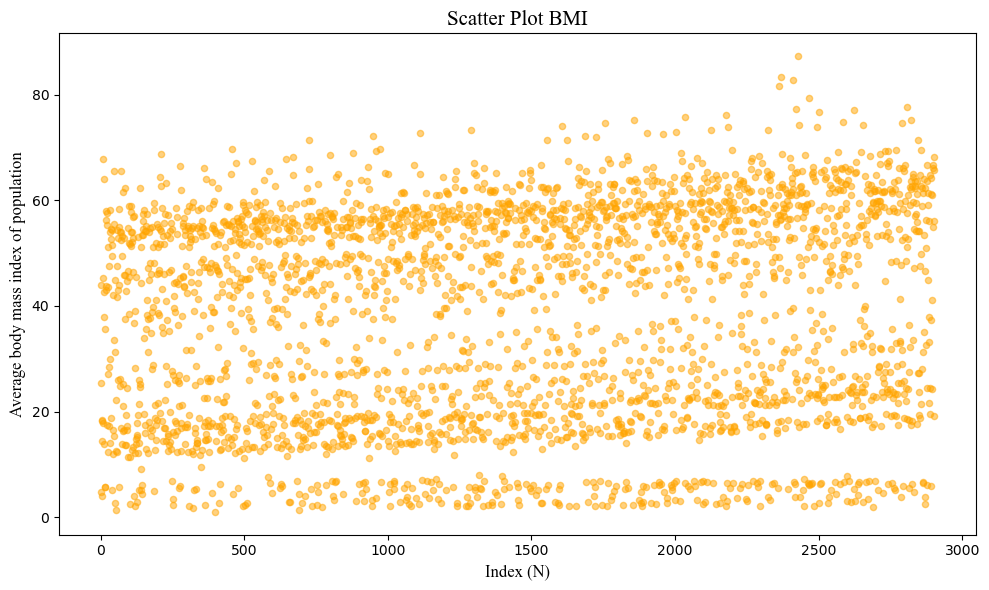

In [114]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['BMI'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot BMI', xlabel='Index (N)', ylabel='Average body mass index of population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

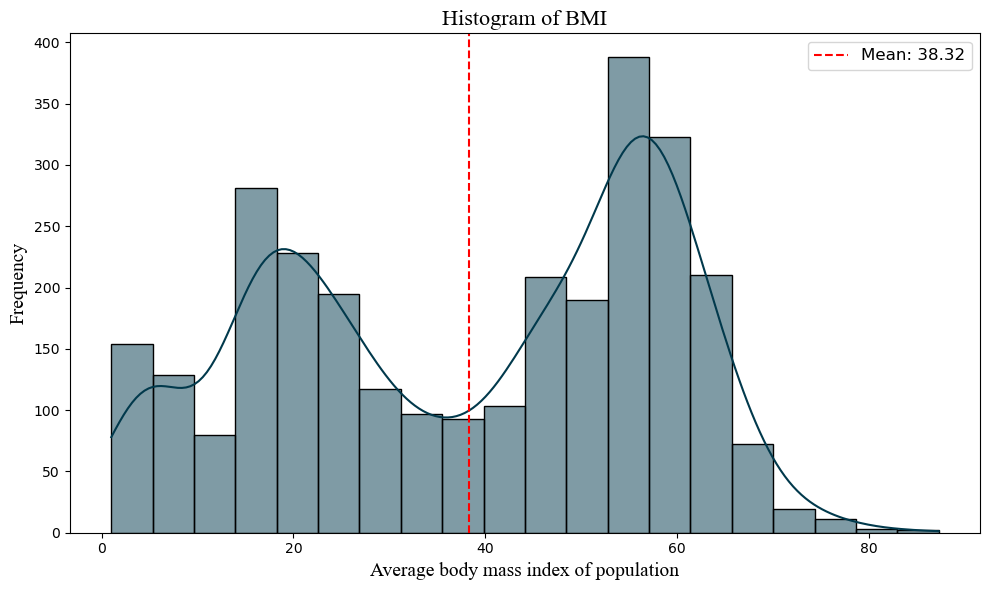

In [115]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['BMI'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of BMI',
               xlabel='Average body mass index of population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The distribution of the data is not fully nature making the reading of the trend or locate the outlaires more chalinging. 

In [117]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['BMI']= lifeExpectancyDataframe['BMI'].astype('float16')

### Column twelve 

In [119]:
# Renaming the feature
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'under-five deaths': 'Death numbers under-five'})

In [120]:
# Investigating the data of the column 
lifeExpectancyDataframe['Death numbers under-five'].head(10)

0     39
1      0
2     10
3      4
4     50
5     73
6     40
7    121
8     74
9      0
Name: Death numbers under-five, dtype: int64

In [121]:
# Investigating the data statically
lifeExpectancyDataframe['Death numbers under-five'].describe()

count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: Death numbers under-five, dtype: float64

In [122]:
# checking for missing items and their count
print("Nan values sum: " + str(lifeExpectancyDataframe['Death numbers under-five'].isna().sum()))

Nan values sum: 0


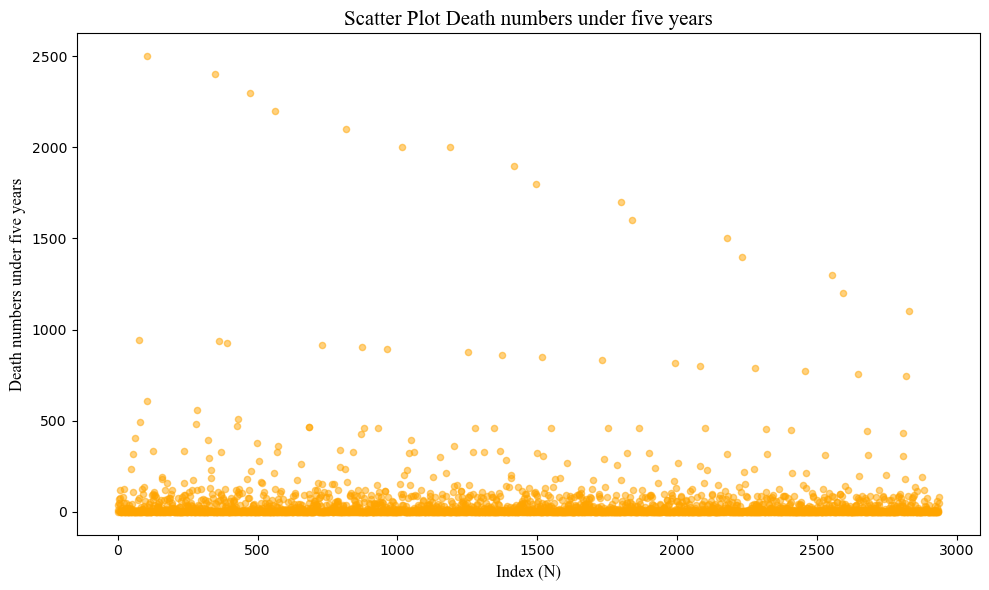

In [123]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Death numbers under-five'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Death numbers under five years', xlabel='Index (N)', ylabel='Death numbers under five years',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

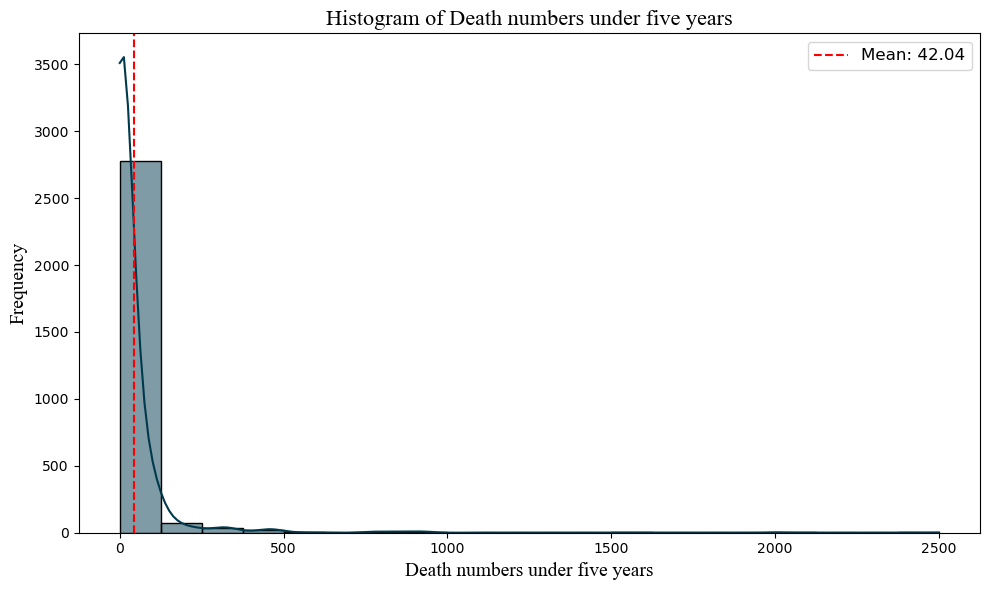

In [124]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Death numbers under-five'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Death numbers under five years',
               xlabel='Death numbers under five years',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

In [125]:
# The data will be stored as int but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Death numbers under-five']= lifeExpectancyDataframe['Death numbers under-five'].astype('uint16')

The data is skewed more to the right side with higher data concentration in the lower levels roughly between _zero_ and _five hundred_, also the high values of death points into possible outliers. 

### Column thirteen:

In [128]:
# Renaming the feature
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'Polio': 'Polio disease'})

In [129]:
# Investigating the data of the column 
lifeExpectancyDataframe['Polio disease'].head(10)

0    78.0
1    91.0
2    96.0
3    41.0
4     NaN
5    71.0
6    78.0
7     8.0
8    37.0
9     9.0
Name: Polio disease, dtype: float64

In [130]:
# Investigating the data statically
lifeExpectancyDataframe['Polio disease'].describe()

count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio disease, dtype: float64

In [131]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Polio disease'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 19


In [132]:
# Suming the number of known values
data = lifeExpectancyDataframe['Polio disease']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2919


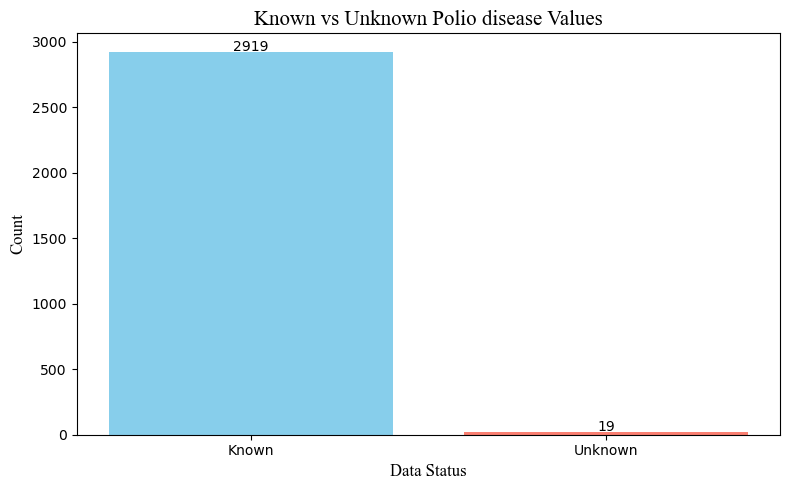

In [133]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Polio disease Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

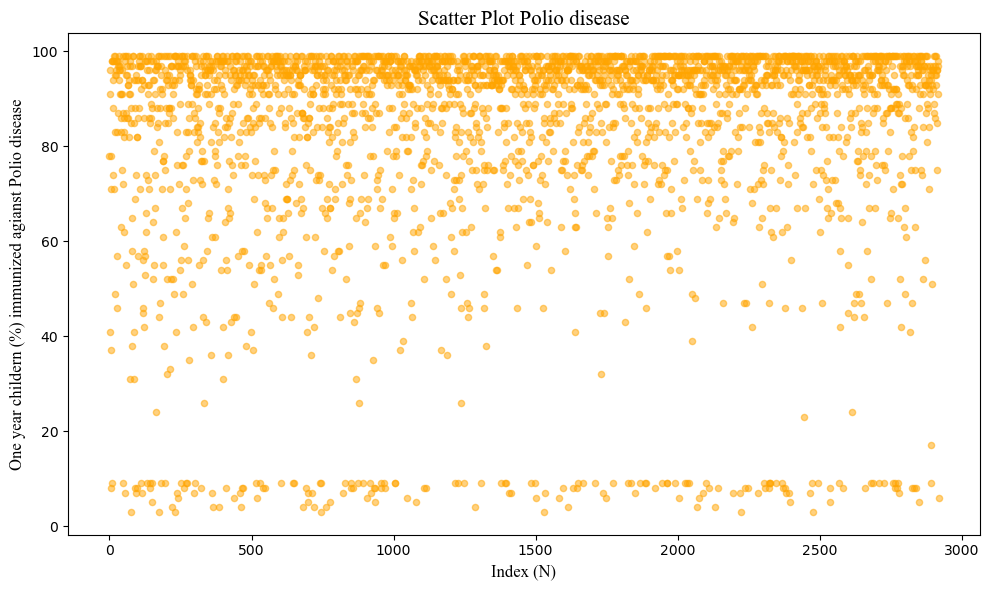

In [134]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Polio disease'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Polio disease', xlabel='Index (N)', ylabel='One year childern (%) immunized agianst Polio disease',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

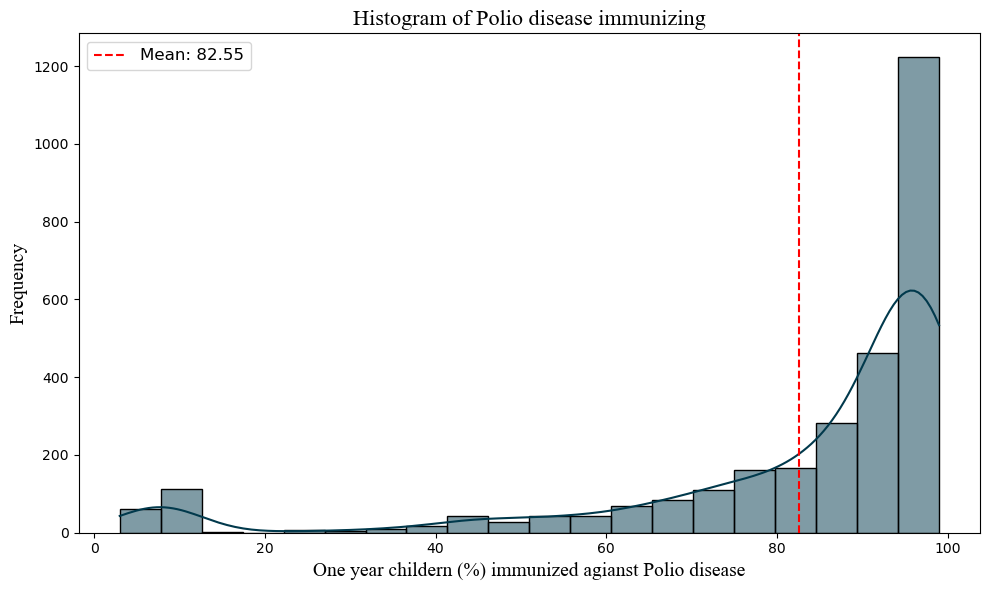

In [135]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Polio disease'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Polio disease immunizing',
               xlabel='One year childern (%) immunized agianst Polio disease',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The previous figures indicates a huge numbers of childernes to be imuzed against the disease with a mean of _82.55_ as well as skeweeing more to the left. Indicating an overall good health care system. 

In [137]:
# The data will be stored as int but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Death numbers under-five']= lifeExpectancyDataframe['Death numbers under-five'].astype('uint16')

### Column fourteen

In [139]:
# Investigating the data of the column 
lifeExpectancyDataframe['Total expenditure'].head(10)

0    7.10
1    3.98
2    4.16
3    2.73
4     NaN
5    8.70
6    4.34
7    4.68
8     NaN
9    8.12
Name: Total expenditure, dtype: float64

In [140]:
# Investigating the data statically
lifeExpectancyDataframe['Total expenditure'].describe()

count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64

In [141]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Total expenditure'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 226


In [142]:
# Suming the number of known values
data = lifeExpectancyDataframe['Total expenditure']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2712


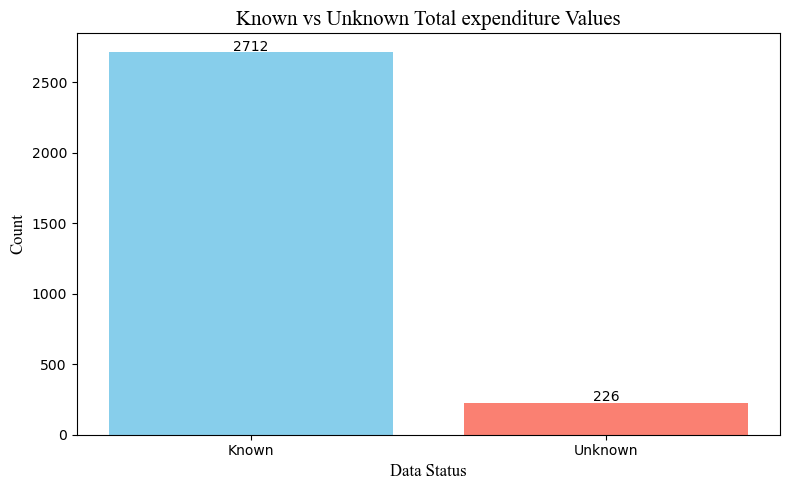

In [143]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Total expenditure Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

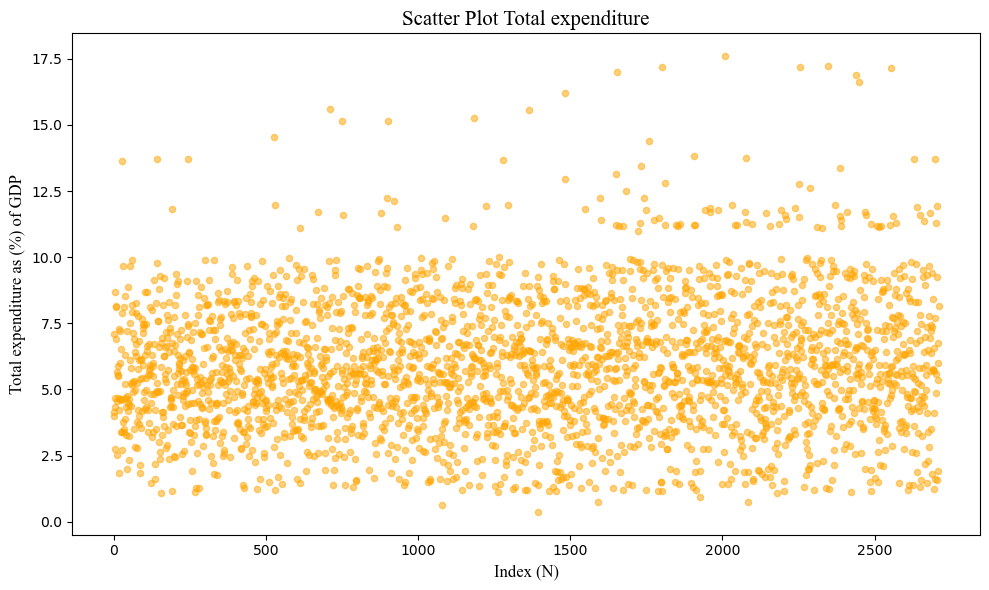

In [144]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Total expenditure'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Total expenditure', xlabel='Index (N)', ylabel='Total expenditure as (%) of GDP',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

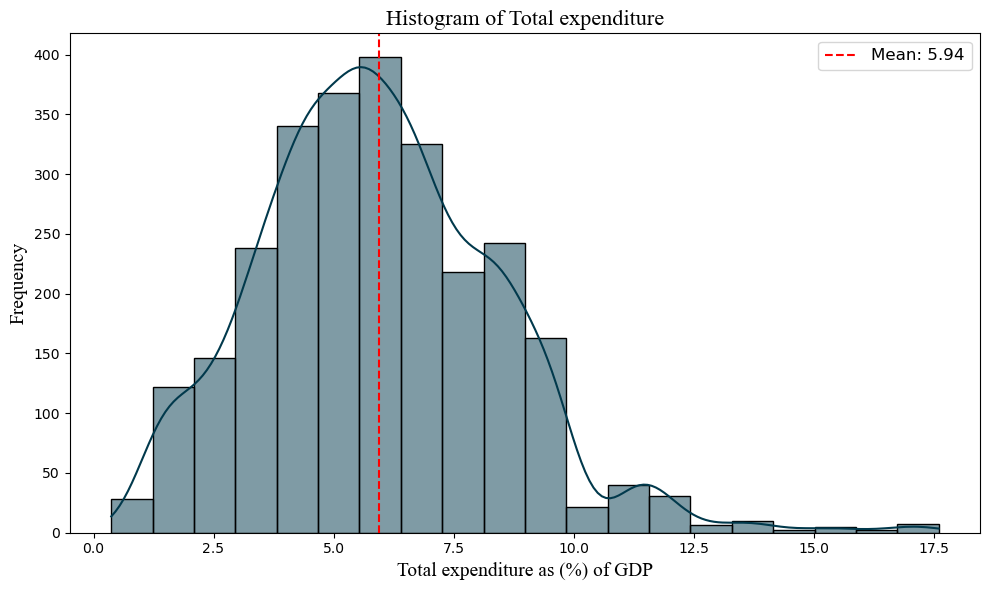

In [145]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Total expenditure'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Total expenditure',
               xlabel='Total expenditure as (%) of GDP',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is roughly distributed normally with high range values and maybe low number of outliers. 

In [147]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Total expenditure']= lifeExpectancyDataframe['Total expenditure'].astype('float16')

### Column fifteen: 

In [149]:
# Investigating the data of the column 
lifeExpectancyDataframe['Diphtheria'].head(10)

0    78.0
1    91.0
2    97.0
3    34.0
4     NaN
5    73.0
6    78.0
7    82.0
8    33.0
9     9.0
Name: Diphtheria, dtype: float64

In [150]:
# Investigating the data statically
lifeExpectancyDataframe['Diphtheria'].describe()

count    2919.000000
mean       82.324084
std        23.716912
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria, dtype: float64

In [151]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Diphtheria'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 19


In [152]:
# Suming the number of known values
data = lifeExpectancyDataframe['Diphtheria']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2919


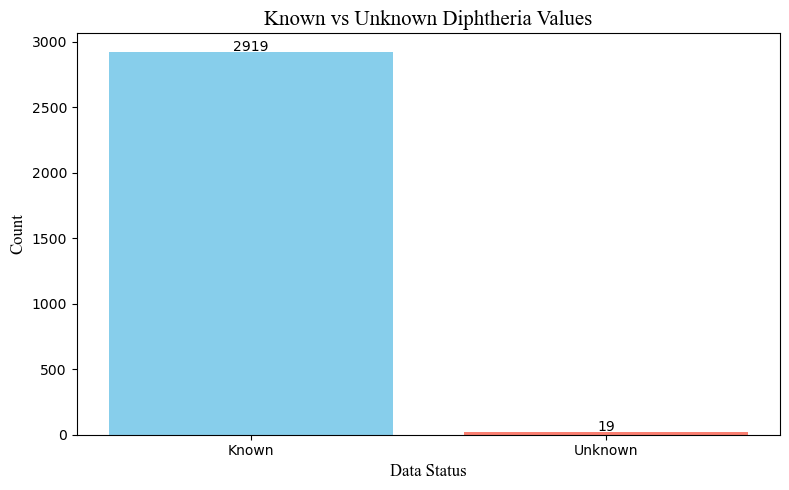

In [153]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Diphtheria Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

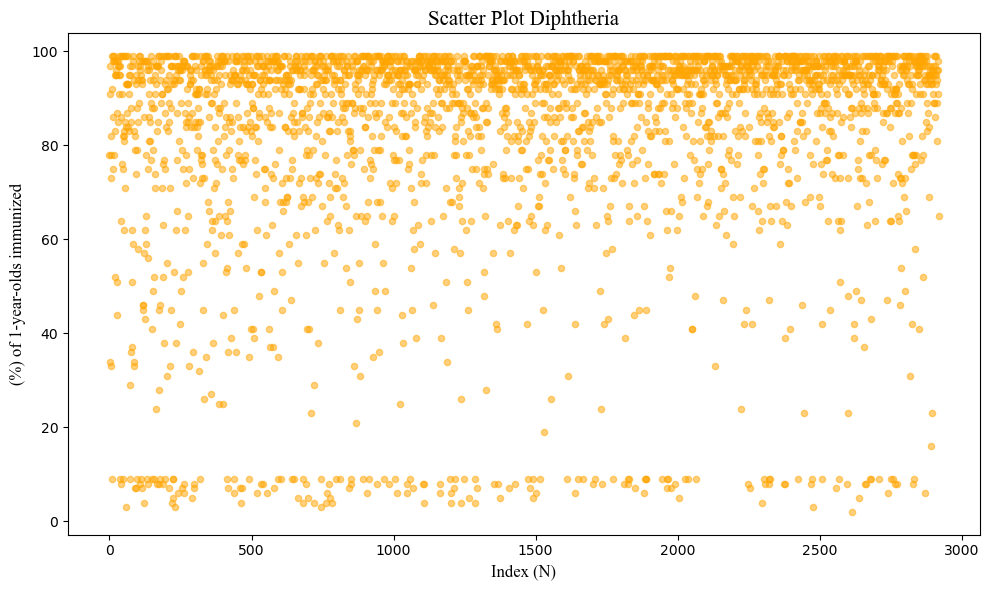

In [154]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Diphtheria'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Diphtheria', xlabel='Index (N)', ylabel='(%) of 1-year-olds immunized',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

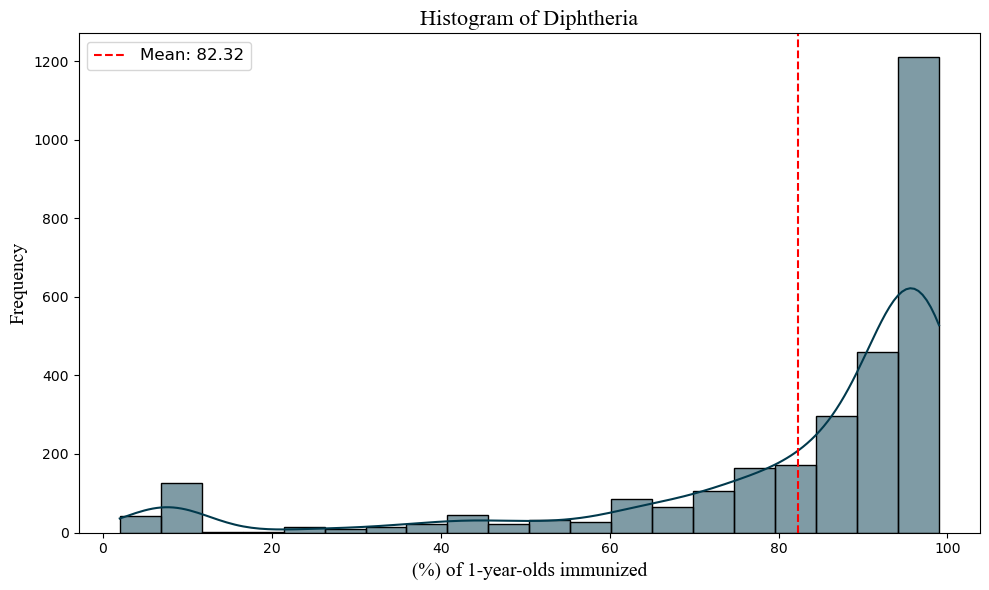

In [155]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Diphtheria'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Diphtheria',
               xlabel='(%) of 1-year-olds immunized',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

From the figures above we can see the data is skewed more to the left, with high mean pointing to the high percentage of elders being immunized.

In [157]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Diphtheria']= lifeExpectancyDataframe['Diphtheria'].astype('float16')

### Column sixteen: 

In [159]:
# Investigating the data of the column 
lifeExpectancyDataframe['HIV/AIDS'].head(10)

0    43.5
1     0.3
2     0.1
3     1.9
4     2.7
5    21.3
6     2.0
7    18.1
8     0.8
9     0.1
Name: HIV/AIDS, dtype: float64

In [160]:
# Investigating the data statically
lifeExpectancyDataframe['HIV/AIDS'].describe()

count    2938.000000
mean        1.742103
std         5.077785
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name: HIV/AIDS, dtype: float64

In [161]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['HIV/AIDS'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 0


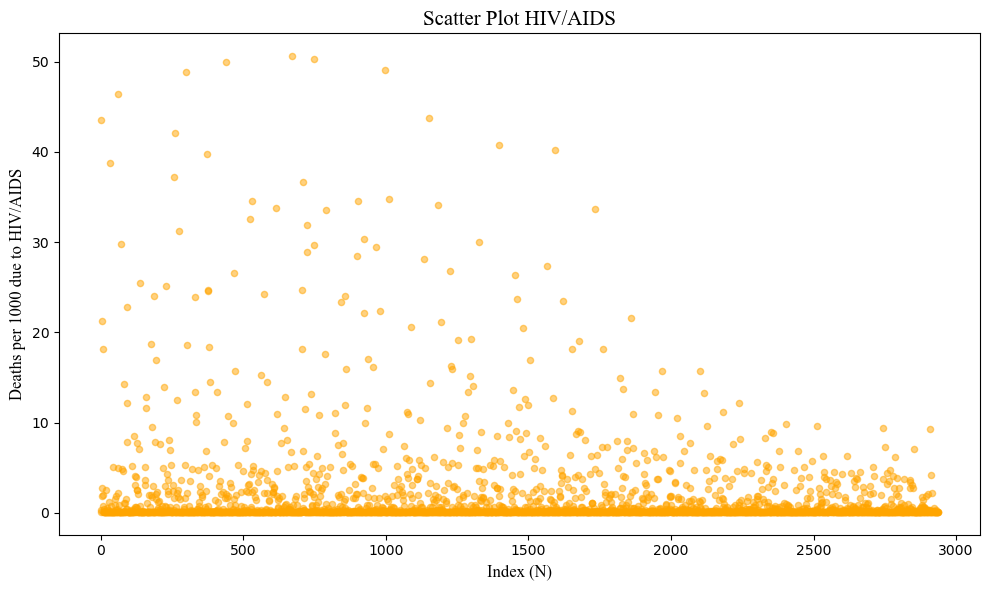

In [162]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['HIV/AIDS'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot HIV/AIDS', xlabel='Index (N)', ylabel='Deaths per 1000 due to HIV/AIDS',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

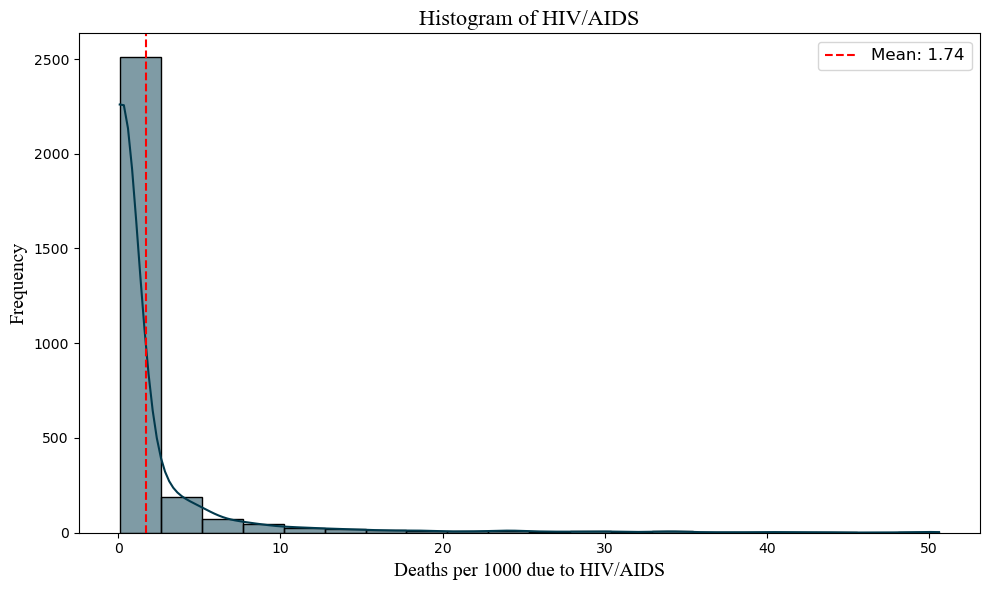

In [163]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['HIV/AIDS'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of HIV/AIDS',
               xlabel='Deaths per 1000 due to HIV/AIDS',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is more skewed to the right side and not distributed normally, possible outliers can be found and the majority of the data is around the mean. 

In [165]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['HIV/AIDS']= lifeExpectancyDataframe['HIV/AIDS'].astype('float16')

### Column seventine: 

In [167]:
# Investigating the data of the column 
lifeExpectancyDataframe['GDP'].head(10)

0     547.358878
1    3364.423711
2    1229.958000
3     172.684910
4            NaN
5     337.225300
6     374.192394
7      43.979713
8            NaN
9     796.793763
Name: GDP, dtype: float64

In [168]:
# Investigating the data statically
lifeExpectancyDataframe['GDP'].describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64

In [169]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['GDP'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 448


In [170]:
# Suming the number of known values
data = lifeExpectancyDataframe['GDP']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2490


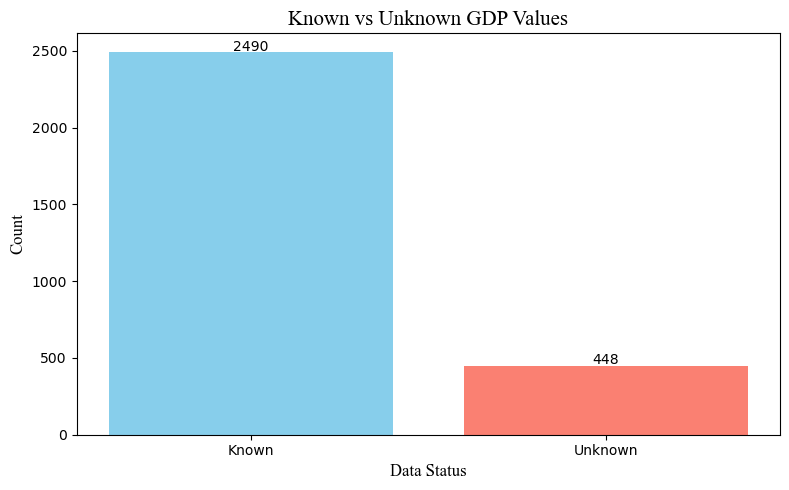

In [171]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown GDP Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

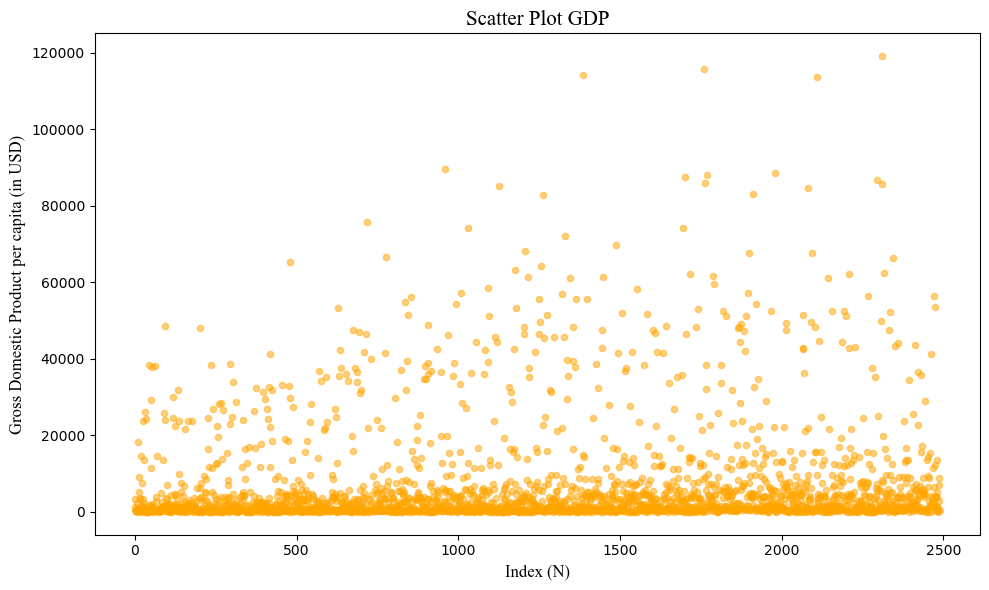

In [172]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['GDP'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot GDP', xlabel='Index (N)', ylabel='Gross Domestic Product per capita (in USD)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

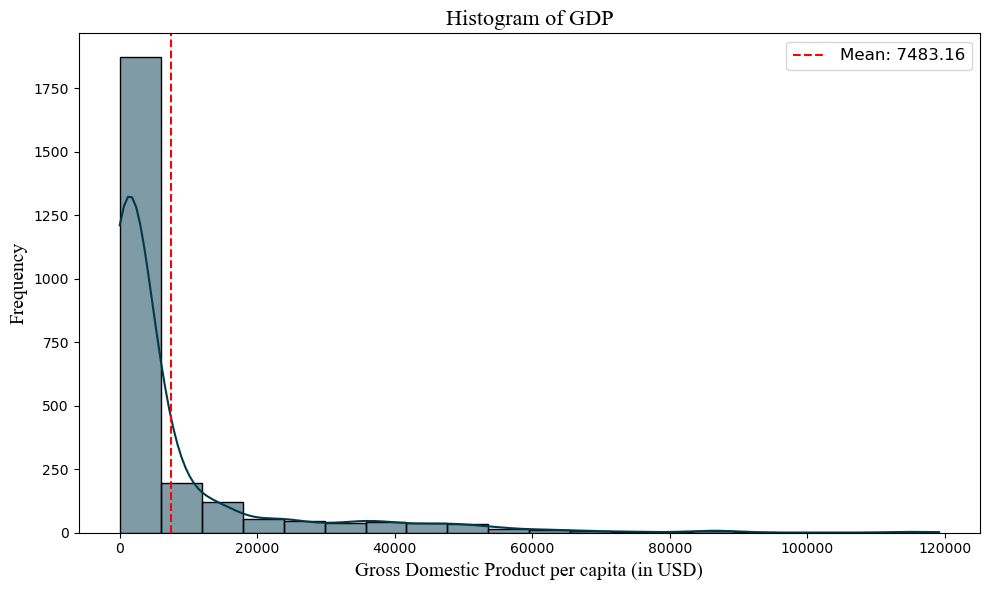

In [173]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['GDP'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of GDP',
               xlabel='Gross Domestic Product per capita (in USD)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is skewed more to the right side with a mean of _7483_, the data has some high incomes but will never be considered as outliers (I think they are drug dealers). 

In [175]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 32 bit.
lifeExpectancyDataframe['GDP']= lifeExpectancyDataframe['GDP'].astype('float32')

### Column eighteen: 

In [177]:
# Investigating the data of the column 
lifeExpectancyDataframe['Population'].head(10)

0    12222251.0
1      247315.0
2    14883626.0
3      614323.0
4       67656.0
5    44896856.0
6     6865951.0
7     3145483.0
8           NaN
9        8446.0
Name: Population, dtype: float64

In [178]:
# Investigating the data statically
lifeExpectancyDataframe['Population'].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

In [179]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Population'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 652


In [180]:
# Suming the number of known values
data = lifeExpectancyDataframe['Population']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2286


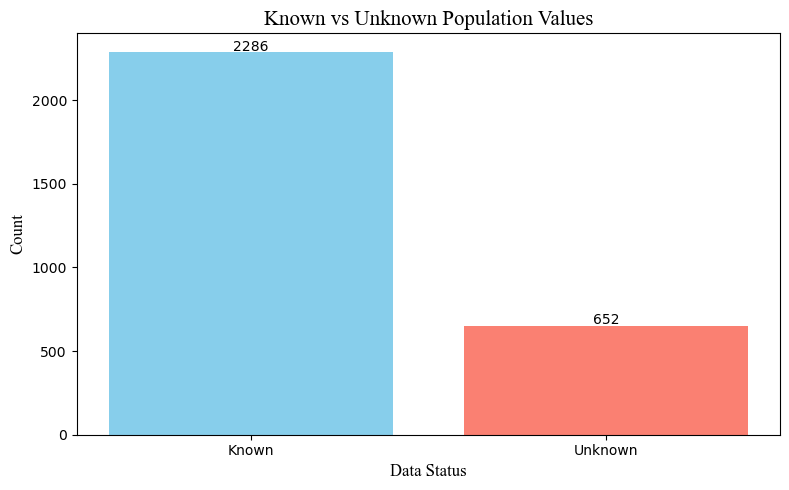

In [181]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Population Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

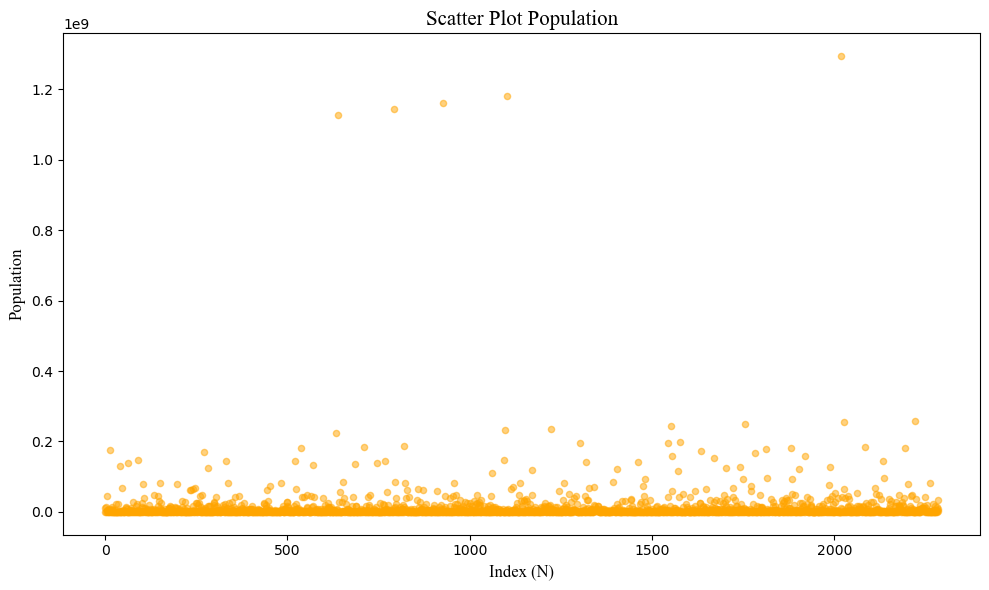

In [182]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Population'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='Population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

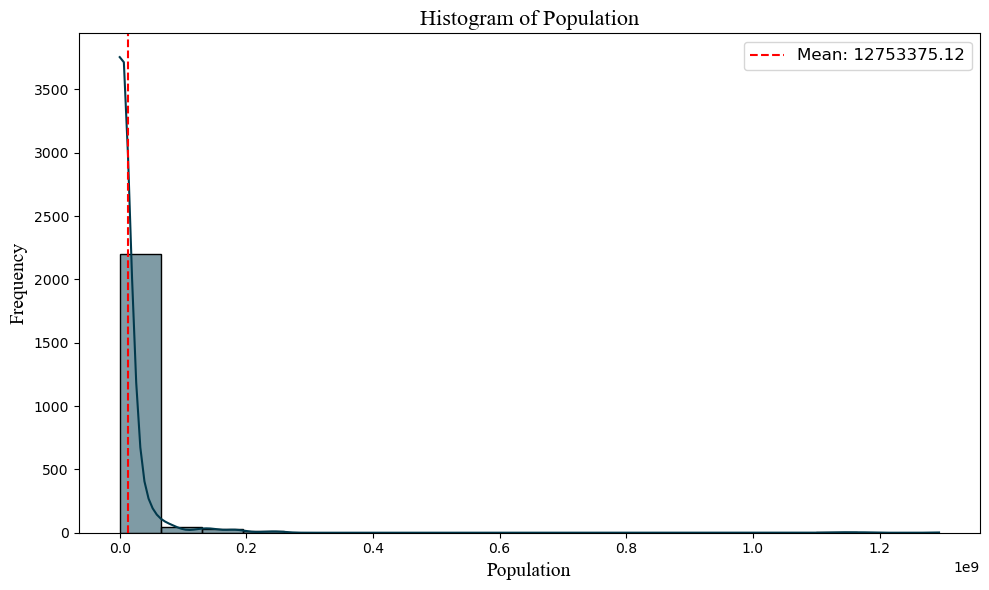

In [183]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Population'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Population',
               xlabel='Population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is skewed more to the right with higher frequency around the mean with some high points indicating high population in some contires.

### Column nineteen: 

In [186]:
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'thinness  1-19 years': 'Thinness 10-19 years'})

In [187]:
# Investigating the data of the column 
lifeExpectancyDataframe['Thinness 10-19 years'].head(10)

0    11.0
1     3.8
2     2.7
3     1.7
4     NaN
5    16.3
6     9.7
7     9.2
8     8.0
9     0.2
Name: Thinness 10-19 years, dtype: float64

In [188]:
# Investigating the data statically
lifeExpectancyDataframe['Thinness 10-19 years'].describe()

count    2904.000000
mean        4.839704
std         4.420195
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name: Thinness 10-19 years, dtype: float64

In [189]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Thinness 10-19 years'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 34


In [190]:
# Suming the number of known values
data = lifeExpectancyDataframe['Thinness 10-19 years']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2904


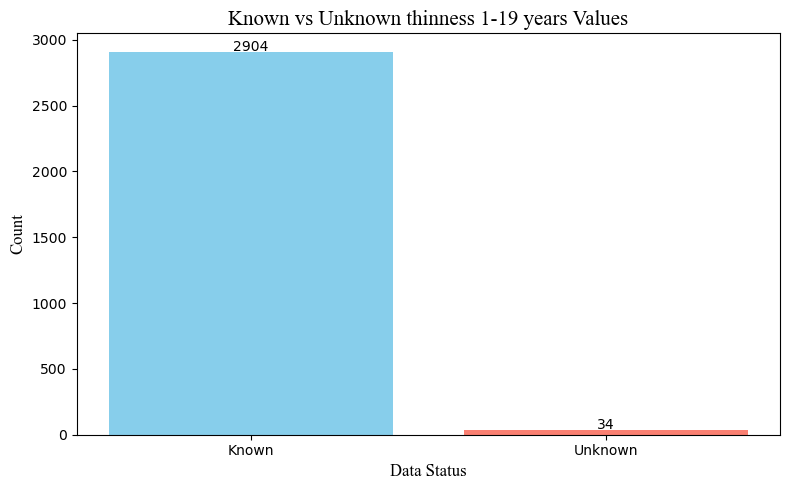

In [191]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown thinness 1-19 years Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

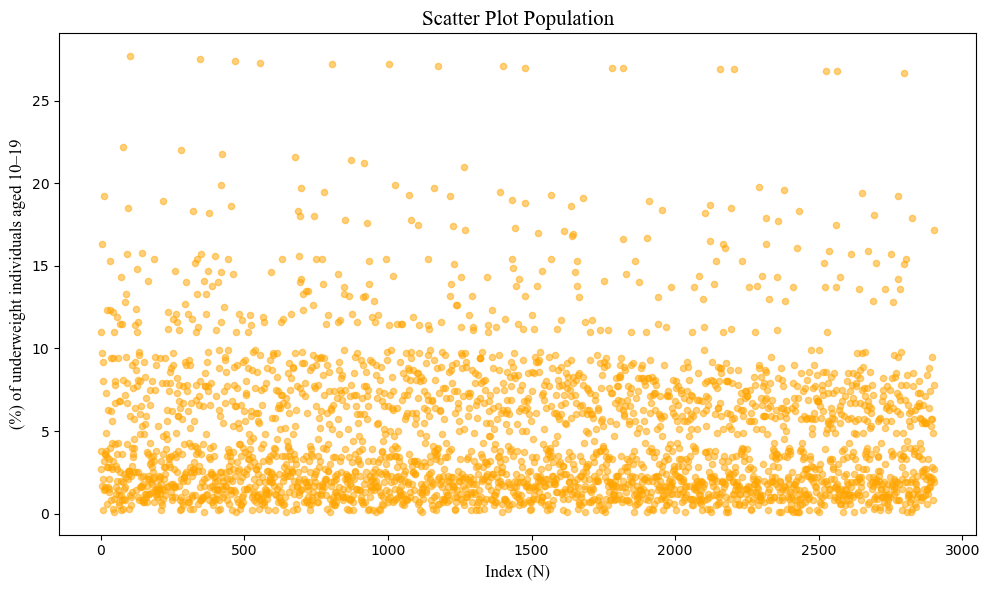

In [192]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 10-19 years'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='(%) of underweight individuals aged 10–19',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

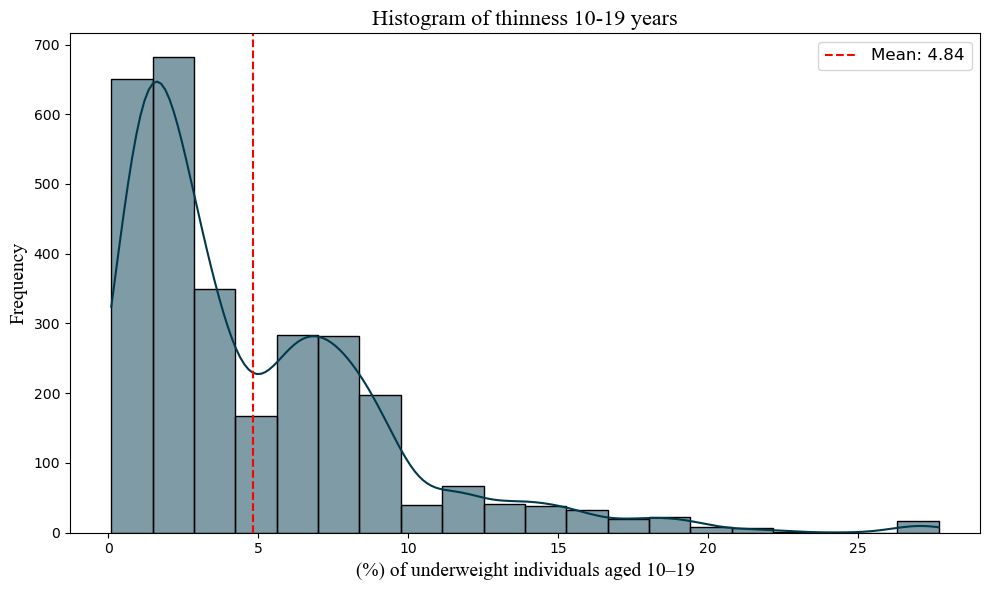

In [193]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 10-19 years'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of thinness 10-19 years',
               xlabel='(%) of underweight individuals aged 10–19',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is skewed more to the right side with higher density around the mean plus some high values.

In [195]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Thinness 10-19 years']= lifeExpectancyDataframe['Thinness 10-19 years'].astype('float16')

### Column twenty: 

In [197]:
lifeExpectancyDataframe = lifeExpectancyDataframe.rename(columns={'thinness 5-9 years': 'Thinness 5-9 years'})

In [198]:
# Investigating the data of the column 
lifeExpectancyDataframe['Thinness 5-9 years'].head(10)

0    11.2
1     3.7
2     2.7
3     1.6
4     NaN
5    19.1
6     9.6
7     9.1
8     7.9
9     0.2
Name: Thinness 5-9 years, dtype: float64

In [199]:
# Investigating the data statically
lifeExpectancyDataframe['Thinness 5-9 years'].describe()

count    2904.000000
mean        4.870317
std         4.508882
min         0.100000
25%         1.500000
50%         3.300000
75%         7.200000
max        28.600000
Name: Thinness 5-9 years, dtype: float64

In [200]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Thinness 5-9 years'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 34


In [201]:
# Suming the number of known values
data = lifeExpectancyDataframe['Thinness 5-9 years']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2904


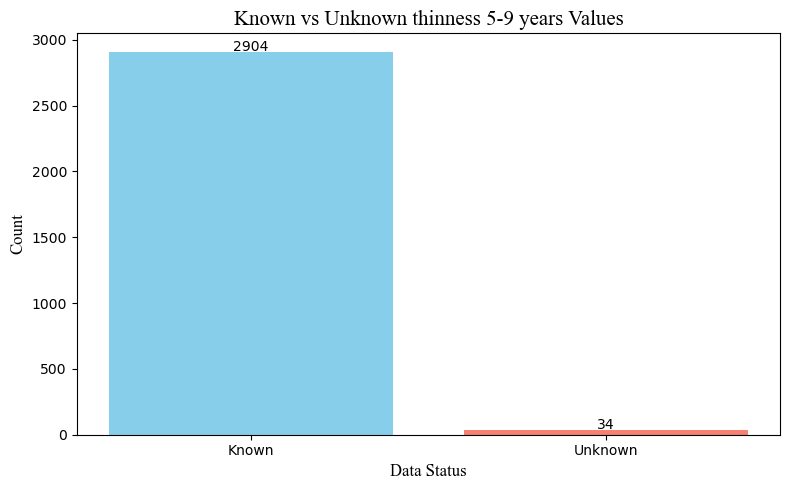

In [202]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown thinness 5-9 years Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

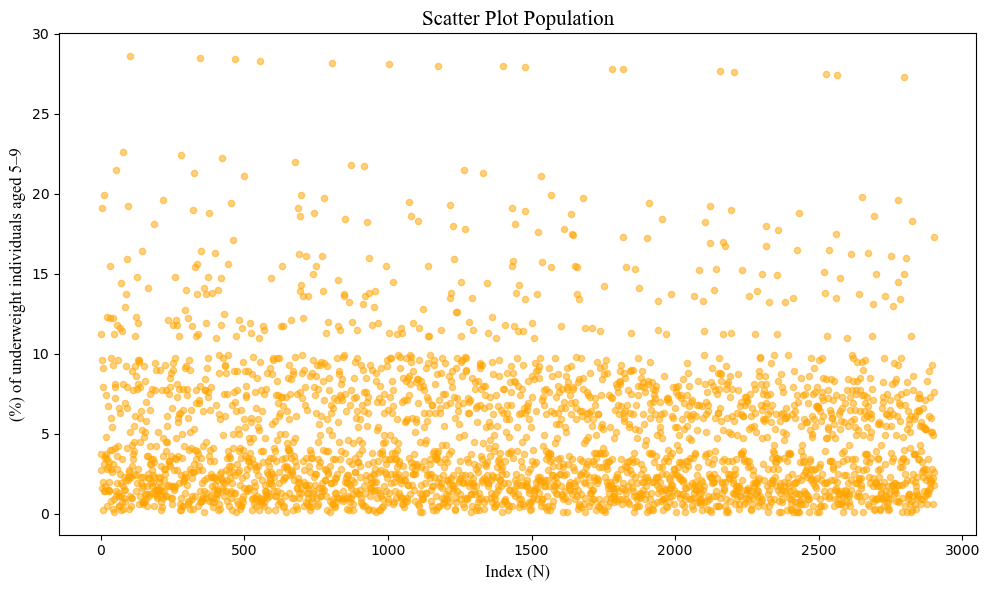

In [203]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 5-9 years'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='(%) of underweight individuals aged 5–9',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

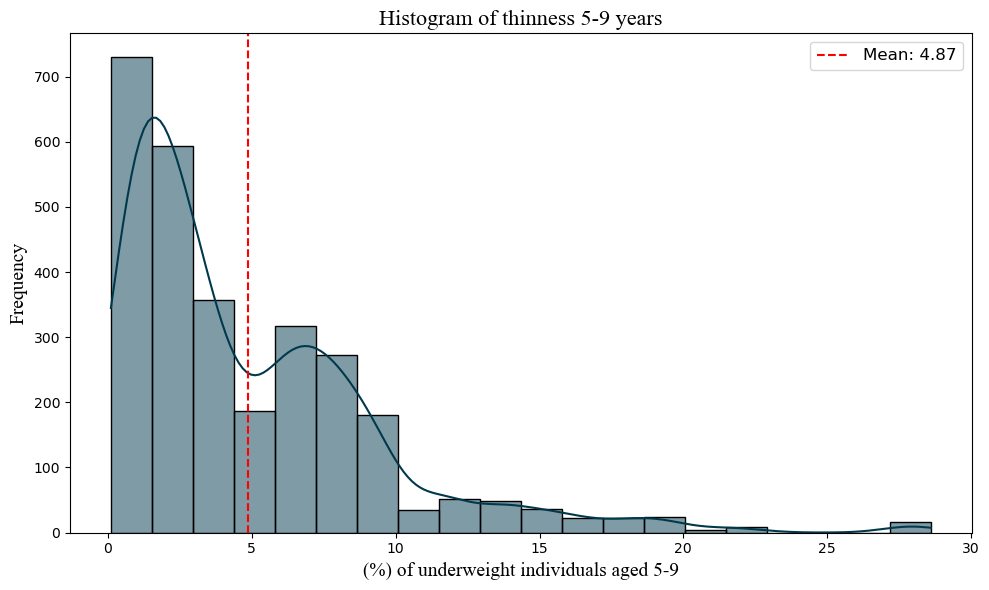

In [204]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 5-9 years'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of thinness 5-9 years',
               xlabel='(%) of underweight individuals aged 5-9',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is skewed more to the right side with higher density around the mean plus some high values.

In [206]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Thinness 5-9 years']= lifeExpectancyDataframe['Thinness 5-9 years'].astype('float16')

### Column twenty one: 

In [208]:
# Investigating the data of the column 
lifeExpectancyDataframe['Income composition of resources'].head(10)

0    0.434
1    0.668
2    0.676
3    0.000
4    0.000
5    0.635
6    0.389
7    0.448
8      NaN
9    0.000
Name: Income composition of resources, dtype: float64

In [209]:
# Investigating the data statically
lifeExpectancyDataframe['Income composition of resources'].describe()

count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: Income composition of resources, dtype: float64

In [210]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Income composition of resources'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 167


In [211]:
# Suming the number of known values
data = lifeExpectancyDataframe['Income composition of resources']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2771


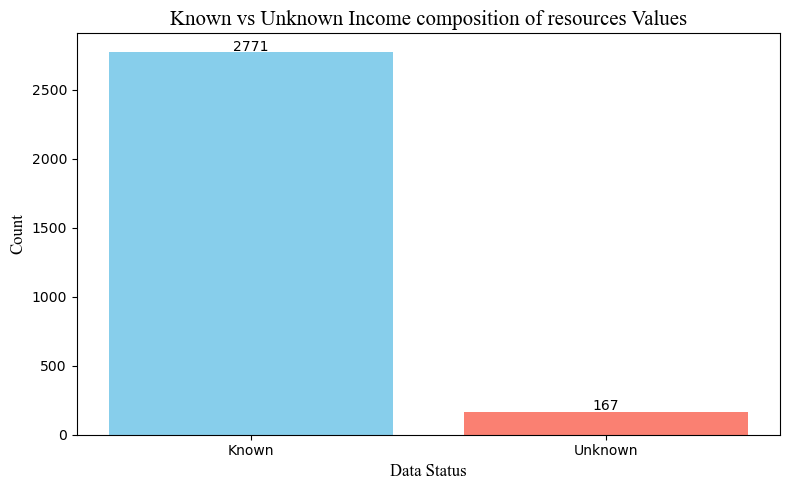

In [212]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Income composition of resources Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

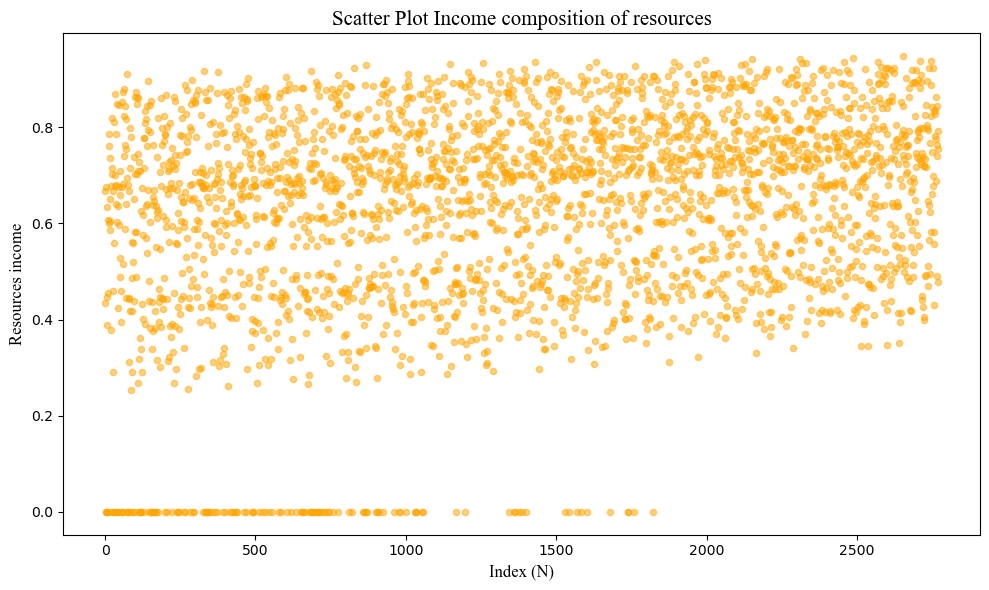

In [213]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Income composition of resources'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Income composition of resources', xlabel='Index (N)', ylabel='Resources income',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

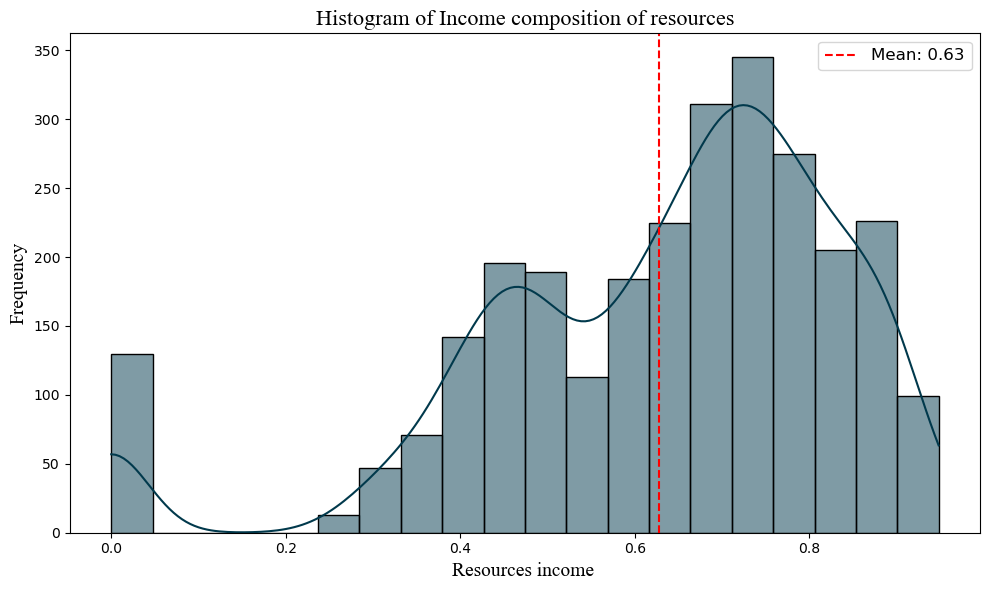

In [214]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Income composition of resources'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Income composition of resources',
               xlabel='Resources income ',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is more skewed to the left side wit high mean and desnsity pointing to at good education, services and income.

### Column twenty two: 

In [217]:
# Investigating the data of the column 
lifeExpectancyDataframe['Schooling'].head(10)

0     9.8
1    11.7
2    12.1
3     0.0
4     0.0
5    13.0
6     6.4
7     8.4
8     NaN
9    10.0
Name: Schooling, dtype: float64

In [218]:
# Investigating the data statically
lifeExpectancyDataframe['Schooling'].describe()

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

In [219]:
# checking for missing items and their count
unknown_values = lifeExpectancyDataframe['Schooling'].isna().sum()
print("Nan values sum: " + str(unknown_values))

Nan values sum: 163


In [220]:
# Suming the number of known values
data = lifeExpectancyDataframe['Schooling']
known_values = data.notna().sum()

print("Known values:", known_values)

Known values: 2775


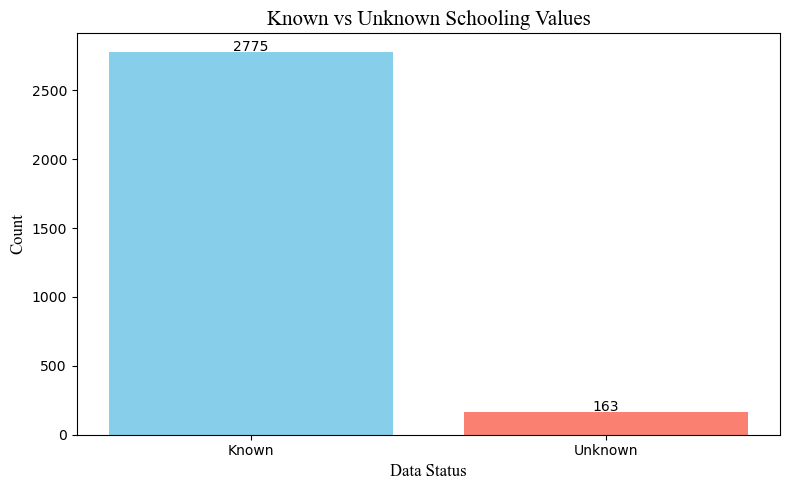

In [221]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Schooling Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

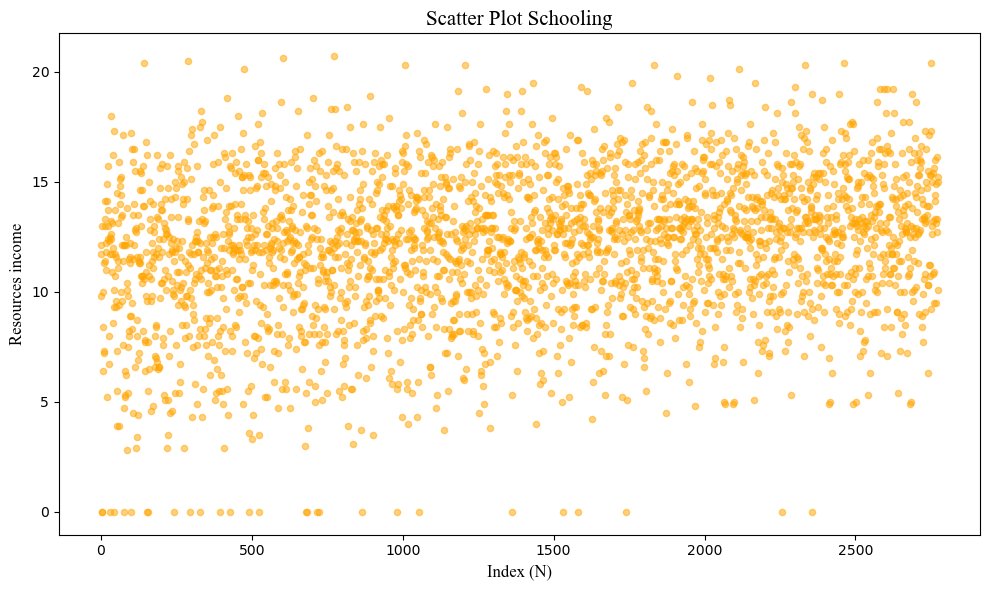

In [222]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Schooling'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Schooling', xlabel='Index (N)', ylabel='Resources income',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

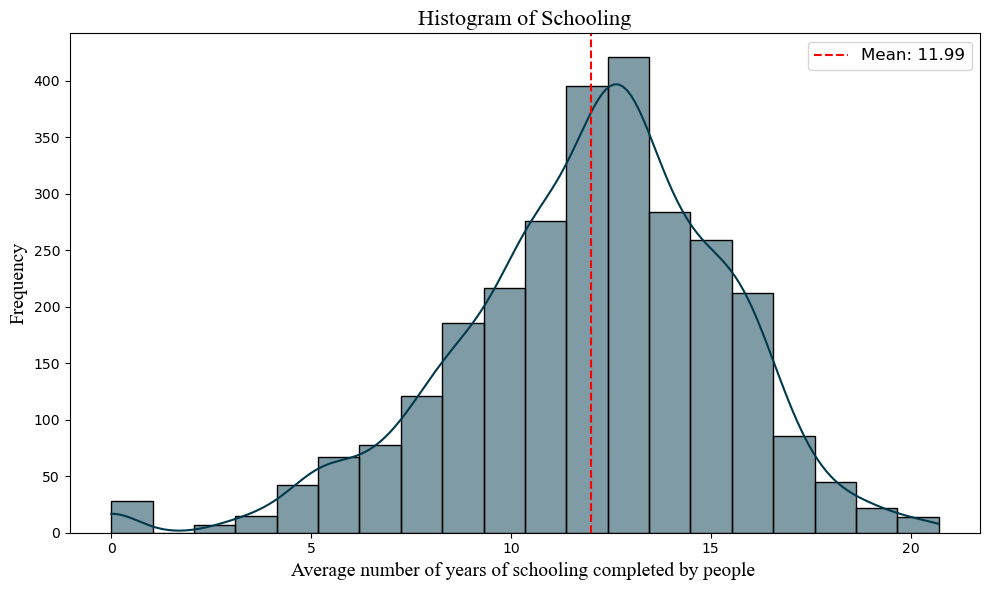

In [223]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Schooling'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Schooling',
               xlabel='Average number of years of schooling completed by people ',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

The data is normally distributed which is logically resalable, starting from _zero_ till _twenty_ as non educated societies ending with highly educated and PhD holders, with an average of _12_.

In [225]:
# The data will be stored as float but to save more memory and refrence to the range we are working with the size will be reduced to 16 bit.
lifeExpectancyDataframe['Schooling']= lifeExpectancyDataframe['Schooling'].astype('float16')

In [226]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   object  
 1   Year                             2938 non-null   int16   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2928 non-null   float16 
 4   Adult Mortality                  2928 non-null   float16 
 5   Infant deaths                    2938 non-null   float16 
 6   Alcohol consumption              2744 non-null   float16 
 7   Percentage expenditure           2938 non-null   float16 
 8   Hepatitis B                      2385 non-null   float16 
 9   Measles                          2938 non-null   uint16  
 10  BMI                              2904 non-null   float16 
 11  Death numbers under-five         2938 non-null   uint16  
 12  Polio 

In [227]:
# Swapping the columns for more arrangement
listOfcolumns = list(lifeExpectancyDataframe.columns)

i1 = listOfcolumns.index('Thinness 10-19 years')
i2 = listOfcolumns.index('Thinness 5-9 years')

listOfcolumns[i1], listOfcolumns[i2] = listOfcolumns[i2], listOfcolumns[i1]
lifeExpectancyDataframe = lifeExpectancyDataframe[listOfcolumns]

In [228]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   object  
 1   Year                             2938 non-null   int16   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2928 non-null   float16 
 4   Adult Mortality                  2928 non-null   float16 
 5   Infant deaths                    2938 non-null   float16 
 6   Alcohol consumption              2744 non-null   float16 
 7   Percentage expenditure           2938 non-null   float16 
 8   Hepatitis B                      2385 non-null   float16 
 9   Measles                          2938 non-null   uint16  
 10  BMI                              2904 non-null   float16 
 11  Death numbers under-five         2938 non-null   uint16  
 12  Polio 

## _First Dataframe - cleaning:_

The following comlumns will not be considered as outliears: 
1. Country -String values.
2. Year -real values.
3. Status -String values.
4. Polio disease

### Life expectancy: 

In [232]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Life expectancy', 69.224932, 9.523867)

Mean: 69.224932
Standard Deviation: 9.523867
Outliers: 
 29      39.0000
1996    36.3125
Name: Life expectancy, dtype: float16
Number of rows containing outliers: 2


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000            665.0   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Adult Mortality:

In [234]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Adult Mortality', 164.796448, 124.292079)

Mean: 164.796448
Standard Deviation: 124.292079
Outliers: 
 0       665.0
32      647.0
54      593.0
70      543.0
137     588.0
159     554.0
175     614.0
228     599.0
255     679.0
261     686.0
273     586.0
299     568.0
303     611.0
334     539.0
439     587.0
522     622.0
529     699.0
573     613.0
613     648.0
709     715.0
724     693.0
787     578.0
788     723.0
844     615.0
900     652.0
903     666.0
924     717.0
938     554.0
1009    675.0
1089    566.0
1152    564.0
1184    654.0
1193    587.0
1297    559.0
1328    633.0
1482    632.0
1565    592.0
1653    587.0
1763    566.0
1996    682.0
Name: Adult Mortality, dtype: float16
Number of rows containing outliers: 40


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Infant deaths:

In [236]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Infant deaths', 30.303948, 117.926501)

Mean: 30.303948
Standard Deviation: 117.926501
Outliers: 
 74       576.0
80       385.0
103      490.0
105     1800.0
284      457.0
349     1800.0
363      574.0
391      571.0
430      422.0
474     1700.0
561     1700.0
685      391.0
730      567.0
816     1600.0
873      563.0
962      556.0
1015    1500.0
1189    1500.0
1253     549.0
1375     542.0
1416    1400.0
1495    1300.0
1518     536.0
1732     527.0
1801    1300.0
1838    1200.0
1992     521.0
2081     513.0
2180    1100.0
2231    1100.0
2279     505.0
2457     498.0
2553    1000.0
2593     957.0
2648     490.0
2818     483.0
2831     910.0
Name: Infant deaths, dtype: float16
Number of rows containing outliers: 37


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Alcohol consumption:

In [238]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Alcohol consumption', 4.602861, 4.052413)

Mean: 4.602861
Standard Deviation: 4.052413
Outliers: 
 1459    17.875000
1595    16.984375
2111    17.312500
Name: Alcohol consumption, dtype: float16
Number of rows containing outliers: 3


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Percentage expenditure:

In [240]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Percentage expenditure', 738.251295, 1987.914858)

Mean: 738.251295
Standard Deviation: 1987.914858
Outliers: 
 108      8248.0
249      7876.0
494      6852.0
567     10112.0
740      9496.0
         ...   
2677     7972.0
2727    19472.0
2728    16256.0
2734    10472.0
2751     7164.0
Name: Percentage expenditure, Length: 84, dtype: float16
Number of rows containing outliers: 84


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Hepatitis B:

In [242]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Hepatitis B', 80.940461, 25.070016)

Mean: 80.940461
Standard Deviation: 25.070016
Outliers: 
 150     5.0
173     4.0
242     1.0
375     4.0
475     5.0
479     5.0
588     5.0
655     5.0
700     2.0
809     5.0
958     5.0
1282    5.0
2120    4.0
2139    2.0
2317    4.0
2370    2.0
2632    2.0
2656    5.0
Name: Hepatitis B, dtype: float16
Number of rows containing outliers: 18


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Measles:

In [244]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Hepatitis B', 2419.592240, 11467.272489)

Mean: 2419.59224
Standard Deviation: 11467.272489
Outliers: 
 Series([], Name: Hepatitis B, dtype: float16)
Number of rows containing outliers: 0


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### BMI:

In [246]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'BMI', 38.321247, 20.044034)

Mean: 38.321247
Standard Deviation: 20.044034
Outliers: 
 Series([], Name: BMI, dtype: float16)
Number of rows containing outliers: 0


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Death numbers under-five: 

In [248]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Death numbers under-five', 42.035739, 160.445548)

Mean: 42.035739
Standard Deviation: 160.445548
Outliers: 
 74       943
103      608
105     2500
284      558
349     2400
363      936
391      928
474     2300
561     2200
730      918
816     2100
873      907
962      893
1015    2000
1189    2000
1253     879
1375     863
1416    1900
1495    1800
1518     848
1732     832
1801    1700
1838    1600
1992     817
2081     802
2180    1500
2231    1400
2279     788
2457     773
2553    1300
2593    1200
2648     759
2818     747
2831    1100
Name: Death numbers under-five, dtype: uint16
Number of rows containing outliers: 34


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Total expenditure:

In [250]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Total expenditure', 5.93819, 2.49832)

Mean: 5.93819
Standard Deviation: 2.49832
Outliers: 
 29      13.632812
145     13.703125
250     13.726562
539     14.546875
725     15.601562
768     15.140625
919     15.148438
1207    15.273438
1303    13.656250
1392    15.570312
1510    16.203125
1687    17.000000
1764    13.437500
1791    14.390625
1836    17.203125
1944    13.828125
2045    17.593750
2115    13.757812
2295    17.203125
2388    17.234375
2480    16.906250
2492    16.609375
2596    17.140625
2673    13.726562
2745    13.710938
Name: Total expenditure, dtype: float16
Number of rows containing outliers: 25


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Diphtheria:

In [252]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Diphtheria', 82.324084, 23.716912)

Mean: 82.324084
Standard Deviation: 23.716912
Outliers: 
 9       9.0
39      9.0
40      8.0
49      9.0
60      3.0
       ... 
2782    8.0
2792    8.0
2848    8.0
2851    9.0
2890    6.0
Name: Diphtheria, Length: 170, dtype: float16
Number of rows containing outliers: 170


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria   HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0  43.500000   
1        0  ...           91.0           3.980469        91.0   0.300049   
2      245  ...           96.0           4.160156        97.0   0.099976   
3        0  ...           41.0           2.730469        34.0   1.900391   
4        0  ...            NaN                NaN         NaN   2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### HIV/AIDS:

In [254]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'HIV/AIDS', 1.742103, 5.077785)

Mean: 1.742103
Standard Deviation: 5.077785
Outliers: 
 0       43.500000
5       21.296875
7       18.093750
32      38.812500
61      46.406250
          ...    
1653    18.093750
1676    19.000000
1735    33.687500
1763    18.203125
1859    21.593750
Name: HIV/AIDS, Length: 69, dtype: float16
Number of rows containing outliers: 69


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887  12222251.0           11.203125             11.000000   
1  3364.423828    247315.0            3.699219              3.800781   
2  1229.958008  14883626.0            2.699219              2.699219   
3   172.684906    614323.0            1.599609              1.700195   
4          NaN     67656.0                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### GDP:

In [256]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Population', 7483.158469, 14270.169342)

Mean: 7483.158469
Standard Deviation: 14270.169342
Outliers: 
 0       12222251.0
1         247315.0
2       14883626.0
3         614323.0
4          67656.0
           ...    
2931      291695.0
2932     5851479.0
2935     7177991.0
2936     2596218.0
2937    33736494.0
Name: Population, Length: 1979, dtype: float64
Number of rows containing outliers: 1979


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Population:

In [258]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Population', 1.275338e+07, 6.101210e+07)

Mean: 12753380.0
Standard Deviation: 61012100.0
Outliers: 
 Series([], Name: Population, dtype: float64)
Number of rows containing outliers: 0


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Thinness 5-9 years:

In [260]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Thinness 5-9 years', 4.870317, 4.508882)

Mean: 4.870317
Standard Deviation: 4.508882
Outliers: 
 5       19.093750
11      19.906250
53      21.500000
80      22.593750
97      19.203125
105     28.593750
219     19.593750
280     22.406250
324     19.000000
325     21.296875
349     28.500000
382     18.796875
426     22.203125
461     19.406250
474     28.406250
505     21.093750
561     28.296875
683     22.000000
694     19.093750
700     18.593750
704     19.906250
752     18.796875
786     19.703125
816     28.203125
861     18.406250
881     21.796875
929     21.703125
1015    28.093750
1085    19.500000
1094    18.593750
1189    28.000000
1229    19.296875
1279    21.500000
1345    21.296875
1416    28.000000
1447    19.093750
1493    18.906250
1495    27.906250
1548    21.093750
1583    19.906250
1658    18.703125
1699    19.703125
1801    27.796875
1838    27.796875
1931    19.406250
1977    18.406250
2145    19.203125
2180    27.703125
2221    19.000000
2231    27.593750
2460    18.796875
2553    27.500000
2593    

Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Thinness 10-19 years:

In [262]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Thinness 10-19 years', 4.839704, 4.420195)

Mean: 4.839704
Standard Deviation: 4.420195
Outliers: 
 11      19.203125
80      22.203125
97      18.500000
105     27.703125
219     18.906250
280     22.000000
324     18.296875
349     27.500000
382     18.203125
423     19.906250
426     21.796875
461     18.593750
474     27.406250
561     27.296875
683     21.593750
694     18.296875
704     19.703125
786     19.500000
816     27.203125
881     21.406250
929     21.203125
1015    27.203125
1036    19.906250
1085    19.296875
1174    19.703125
1189    27.093750
1229    19.203125
1279    21.000000
1405    19.500000
1416    27.093750
1447    19.000000
1493    18.796875
1495    27.000000
1583    19.296875
1658    18.593750
1699    19.093750
1801    27.000000
1838    27.000000
1931    18.906250
1977    18.406250
2125    18.203125
2145    18.703125
2180    26.906250
2221    18.500000
2231    26.906250
2319    19.796875
2407    19.593750
2460    18.296875
2553    26.796875
2593    26.796875
2681    19.406250
2808    19.203125
2831    

Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Income composition of resources:

In [264]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Income composition of resources', 0.627551, 0.210904)

Mean: 0.627551
Standard Deviation: 0.210904
Outliers: 
 Series([], Name: Income composition of resources, dtype: float64)
Number of rows containing outliers: 0


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000   0.000000  
4                            0.000   0.000000  

[5 rows x 22 columns]

### Schooling: 

In [266]:
replace_outliers_with_nan(lifeExpectancyDataframe, 'Schooling', 11.992793, 3.358920)

Mean: 11.992793
Standard Deviation: 3.35892
Outliers: 
 3       0.0
4       0.0
30      0.0
43      0.0
78      0.0
100     0.0
163     0.0
166     0.0
260     0.0
315     0.0
347     0.0
418     0.0
454     0.0
520     0.0
553     0.0
720     0.0
721     0.0
755     0.0
767     0.0
916     0.0
1038    0.0
1114    0.0
1442    0.0
1616    0.0
1672    0.0
1840    0.0
2388    0.0
2492    0.0
Name: Schooling, dtype: float16
Number of rows containing outliers: 28


Country  Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000  Developing         46.00000              NaN   
1             Belize  2000  Developing         68.31250            196.0   
2         Kazakhstan  2000  Developing         63.90625            292.0   
3  Equatorial Guinea  2000  Developing         52.68750            336.0   
4        South Sudan  2000  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125          NaN   
4           31.0                  NaN                0.000000          NaN   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0     1483  ...           78.0           7.101562        78.0       NaN   
1        0  ...           91.0           3.980469        91.0  0.300049   
2      245  ...           96.0           4.160156        97.0  0.099976   
3        0  ...           41.0           2.730469        34.0  1.900391   
4        0  ...            NaN                NaN         NaN  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887         NaN           11.203125             11.000000   
1  3364.423828         NaN            3.699219              3.800781   
2  1229.958008         NaN            2.699219              2.699219   
3   172.684906         NaN            1.599609              1.700195   
4          NaN         NaN                 NaN                   NaN   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000        NaN  
4                            0.000        NaN  

[5 rows x 22 columns]

In [267]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   object  
 1   Year                             2938 non-null   int16   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2926 non-null   float16 
 4   Adult Mortality                  2888 non-null   float16 
 5   Infant deaths                    2901 non-null   float16 
 6   Alcohol consumption              2741 non-null   float16 
 7   Percentage expenditure           2854 non-null   float16 
 8   Hepatitis B                      2367 non-null   float16 
 9   Measles                          2938 non-null   uint16  
 10  BMI                              2904 non-null   float16 
 11  Death numbers under-five         2904 non-null   float64 
 12  Polio 

In [268]:
lifeExpectancyDataframe

Country  Year      Status  \
0                                              Zimbabwe  2000  Developing   
1                                                Belize  2000  Developing   
2                                            Kazakhstan  2000  Developing   
3                                     Equatorial Guinea  2000  Developing   
4                                           South Sudan  2000  Developing   
...                                                 ...   ...         ...   
2933  United Kingdom of Great Britain and Northern I...  2015   Developed   
2934                                       Saudi Arabia  2015  Developing   
2935                                           Bulgaria  2015   Developed   
2936                                             Brazil  2015  Developing   
2937                                        Afghanistan  2015  Developing   

      Life expectancy  Adult Mortality  Infant deaths  Alcohol consumption  \
0            46.00000              NaN           24.0             1.679688   
1            68.31250            196.0            0.0             4.789062   
2            63.90625            292.0            9.0             6.000000   
3            52.68750            336.0            3.0             4.460938   
4            48.90625             38.0           31.0                  NaN   
...               ...              ...            ...                  ...   
2933         81.18750             69.0            3.0            10.656250   
2934         74.50000             88.0            7.0                  NaN   
2935         74.50000            137.0            0.0                  NaN   
2936         75.00000            142.0           42.0                  NaN   
2937         65.00000            263.0           62.0             0.010002   

      Percentage expenditure  Hepatitis B  Measles  ...  Polio disease  \
0                   0.000000         79.0     1483  ...           78.0   
1                 219.000000         76.0        0  ...           91.0   
2                 112.562500         99.0      245  ...           96.0   
3                  14.953125          NaN        0  ...           41.0   
4                   0.000000          NaN        0  ...            NaN   
...                      ...          ...      ...  ...            ...   
2933                0.000000          NaN       91  ...           96.0   
2934                0.000000         98.0      219  ...           97.0   
2935                0.000000         92.0        0  ...           91.0   
2936                0.000000         96.0      214  ...           98.0   
2937               71.250000         65.0     1154  ...            6.0   

      Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
0              7.101562        78.0       NaN   547.358887         NaN   
1              3.980469        91.0  0.300049  3364.423828         NaN   
2              4.160156        97.0  0.099976  1229.958008         NaN   
3              2.730469        34.0  1.900391   172.684906         NaN   
4                   NaN         NaN  2.699219          NaN         NaN   
...                 ...         ...       ...          ...         ...   
2933                NaN        96.0  0.099976          NaN         NaN   
2934                NaN        98.0  0.099976  2732.861816         NaN   
2935                NaN        91.0  0.099976  6993.477539         NaN   
2936                NaN        96.0  0.099976  8757.261719         NaN   
2937           8.156250        65.0  0.099976   584.259216         NaN   

      Thinness 5-9 years  Thinness 10-19 years  \
0              11.203125             11.000000   
1               3.699219              3.800781   
2               2.699219              2.699219   
3               1.599609              1.700195   
4                    NaN                   NaN   
...                  ...                   ...   
2933            0.600098              0.799805   
2934    

In [270]:
len(lifeExpectancyDataframe['Country'].unique().sum())

1931

In [271]:
# Seperating the datasets into integers and strings
num_cols = lifeExpectancyDataframe.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = lifeExpectancyDataframe.select_dtypes(include=['object']).columns.tolist()

# Print columns based on category
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# For numeric columns - impute with median
if num_cols:
    num_imputer = SimpleImputer(strategy='median')
    lifeExpectancyDataframe[num_cols] = num_imputer.fit_transform(lifeExpectancyDataframe[num_cols])

# For categorical columns - impute with most frequent value
if cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    lifeExpectancyDataframe[cat_cols] = cat_imputer.fit_transform(lifeExpectancyDataframe[cat_cols])

# Create a copy to work with for modeling
df_for_modeling = lifeExpectancyDataframe.copy()

# Process categorical features for modeling
if cat_cols:
    # One-hot encode the categorical columns
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_cats = encoder.fit_transform(df_for_modeling[cat_cols])
    
    # Get the new column names
    encoded_feature_names = encoder.get_feature_names_out(cat_cols)
    
    # Create a DataFrame with the encoded values
    encoded_cats_df = pd.DataFrame(
        encoded_cats, 
        columns=encoded_feature_names, 
        index=df_for_modeling.index
    )
    
    # Drop the original categorical columns and join the encoded ones
    df_for_modeling = df_for_modeling.drop(columns=cat_cols).join(encoded_cats_df)

Numeric columns: ['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol consumption', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Death numbers under-five', 'Polio disease', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 5-9 years', 'Thinness 10-19 years', 'Income composition of resources', 'Schooling']
Categorical columns: ['Country']


In [272]:
lifeExpectancyDataframe

Country    Year      Status  \
0                                              Zimbabwe  2000.0  Developing   
1                                                Belize  2000.0  Developing   
2                                            Kazakhstan  2000.0  Developing   
3                                     Equatorial Guinea  2000.0  Developing   
4                                           South Sudan  2000.0  Developing   
...                                                 ...     ...         ...   
2933  United Kingdom of Great Britain and Northern I...  2015.0   Developed   
2934                                       Saudi Arabia  2015.0  Developing   
2935                                           Bulgaria  2015.0   Developed   
2936                                             Brazil  2015.0  Developing   
2937                                        Afghanistan  2015.0  Developing   

      Life expectancy  Adult Mortality  Infant deaths  Alcohol consumption  \
0            46.00000            142.0           24.0             1.679688   
1            68.31250            196.0            0.0             4.789062   
2            63.90625            292.0            9.0             6.000000   
3            52.68750            336.0            3.0             4.460938   
4            48.90625             38.0           31.0             3.740234   
...               ...              ...            ...                  ...   
2933         81.18750             69.0            3.0            10.656250   
2934         74.50000             88.0            7.0             3.740234   
2935         74.50000            137.0            0.0             3.740234   
2936         75.00000            142.0           42.0             3.740234   
2937         65.00000            263.0           62.0             0.010002   

      Percentage expenditure  Hepatitis B  Measles  ...  Polio disease  \
0                   0.000000         79.0   1483.0  ...           78.0   
1                 219.000000         76.0      0.0  ...           91.0   
2                 112.562500         99.0    245.0  ...           96.0   
3                  14.953125         92.0      0.0  ...           41.0   
4                   0.000000         92.0      0.0  ...           93.0   
...                      ...          ...      ...  ...            ...   
2933                0.000000         92.0     91.0  ...           96.0   
2934                0.000000         98.0    219.0  ...           97.0   
2935                0.000000         92.0      0.0  ...           91.0   
2936                0.000000         96.0    214.0  ...           98.0   
2937               71.250000         65.0   1154.0  ...            6.0   

      Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
0              7.101562        78.0  0.099976   547.358887     15578.0   
1              3.980469        91.0  0.300049  3364.423828     15578.0   
2              4.160156        97.0  0.099976  1229.958008     15578.0   
3              2.730469        34.0  1.900391   172.684906     15578.0   
4              5.718750        93.0  2.699219  1766.947571     15578.0   
...                 ...         ...       ...          ...         ...   
2933           5.718750        96.0  0.099976  1766.947571     15578.0   
2934           5.718750        98.0  0.099976  2732.861816     15578.0   
2935           5.718750        91.0  0.099976  6993.477539     15578.0   
2936           5.718750        96.0  0.099976  8757.261719     15578.0   
2937           8.156250        65.0  0.099976   584.259216     15578.0   

      Thinness 5-9 years  Thinness 10-19 years  \
0              11.203125             11.000000   
1               3.699219              3.800781   
2               2.699219              2.699219   
3               1.599609              1.700195   
4               3.300781              3.300781   
...                  ...                   ...   
2933            0.600098          

In [273]:
lifeExpectancyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   object  
 1   Year                             2938 non-null   float64 
 2   Status                           2938 non-null   category
 3   Life expectancy                  2938 non-null   float64 
 4   Adult Mortality                  2938 non-null   float64 
 5   Infant deaths                    2938 non-null   float64 
 6   Alcohol consumption              2938 non-null   float64 
 7   Percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2938 non-null   float64 
 9   Measles                          2938 non-null   float64 
 10  BMI                              2938 non-null   float64 
 11  Death numbers under-five         2938 non-null   float64 
 12  Polio 

In [274]:
lifeExpectancyDataframe.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol consumption                0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Death numbers under-five           0
Polio disease                      0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 5-9 years                 0
Thinness 10-19 years               0
Income composition of resources    0
Schooling                          0
dtype: int64

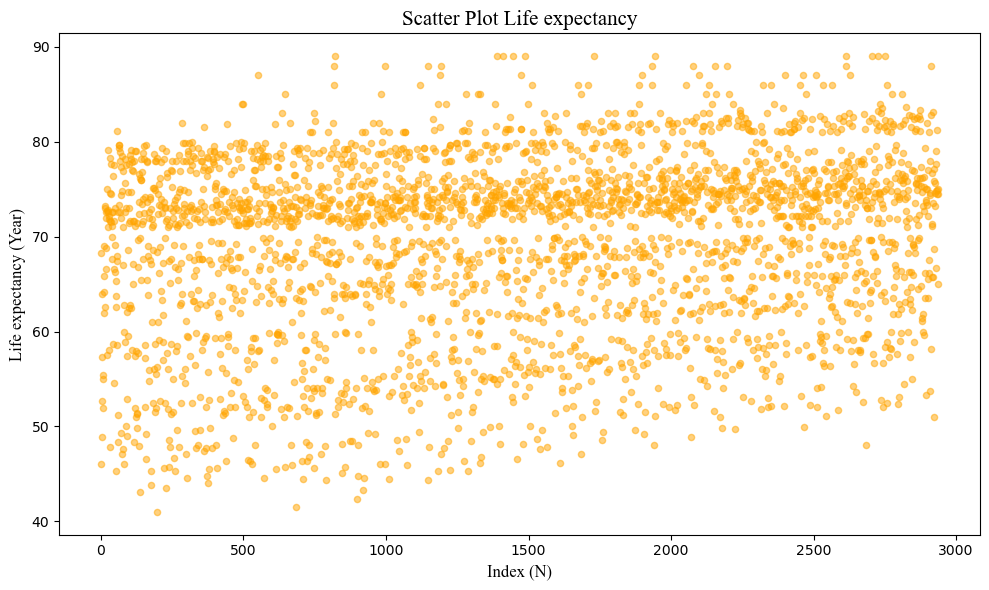

In [275]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Life expectancy'], errors='coerce').dropna()
plot_scatter(Data, title='Scatter Plot Life expectancy', xlabel='Index (N)', ylabel='Life expectancy (Year)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

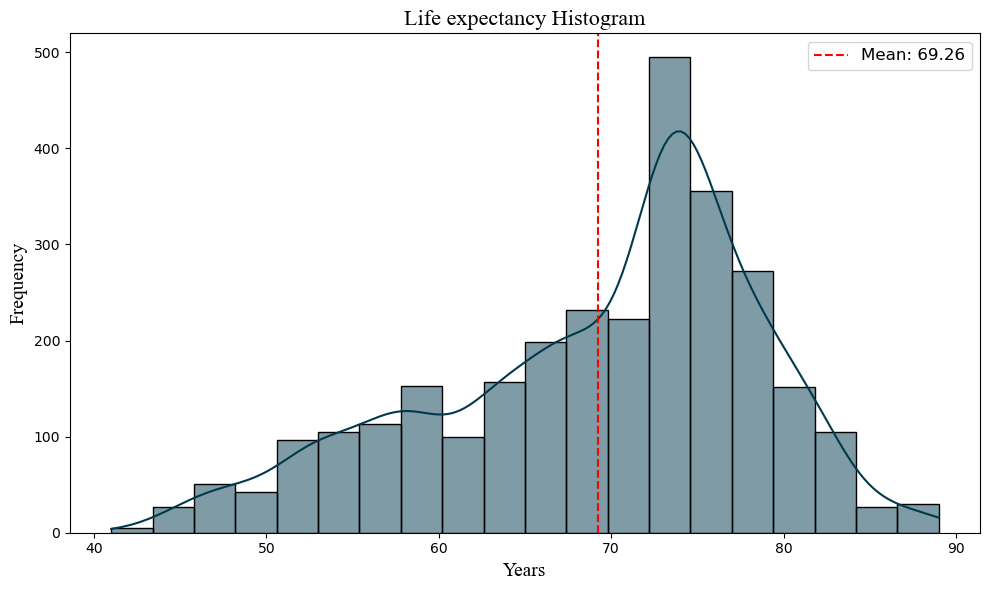

In [276]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Life expectancy'], errors='coerce').dropna()

plot_histogram(Data, title='Life expectancy Histogram', xlabel='Years', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')

From the plot above we can see the average of life expectancy is around 69 years, and the most frequent value is around 75 years with a low thresholds of 89 and 42. The previous cell a general understanding to the distribution of the data can be generated as following, the cleaning of the data and the modelling changed the lower limits of the data effecting the value of the mean a little from _69.22_ into _69.26_ .

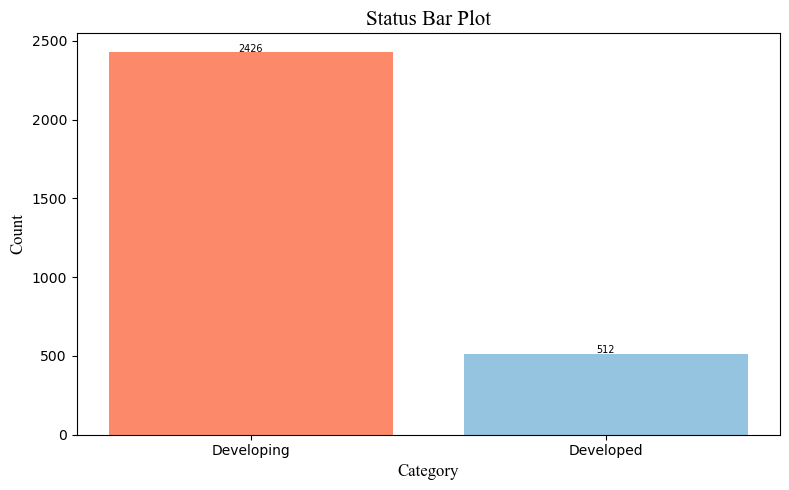

In [277]:
# Bar plot plotting
Data = lifeExpectancyDataframe['Status'].value_counts()
labels = Data.index
Data = Data.values

plot_categorical_bar(Data, labels, title='Status Bar Plot', xlabel='Category', ylabel='Count',
                     colors=None, fontname='Times New Roman', figsize=(8, 5), 
                     label_fontsize=12, title_fontsize=15, value_fontsize=7, 
                     text_offset=5)

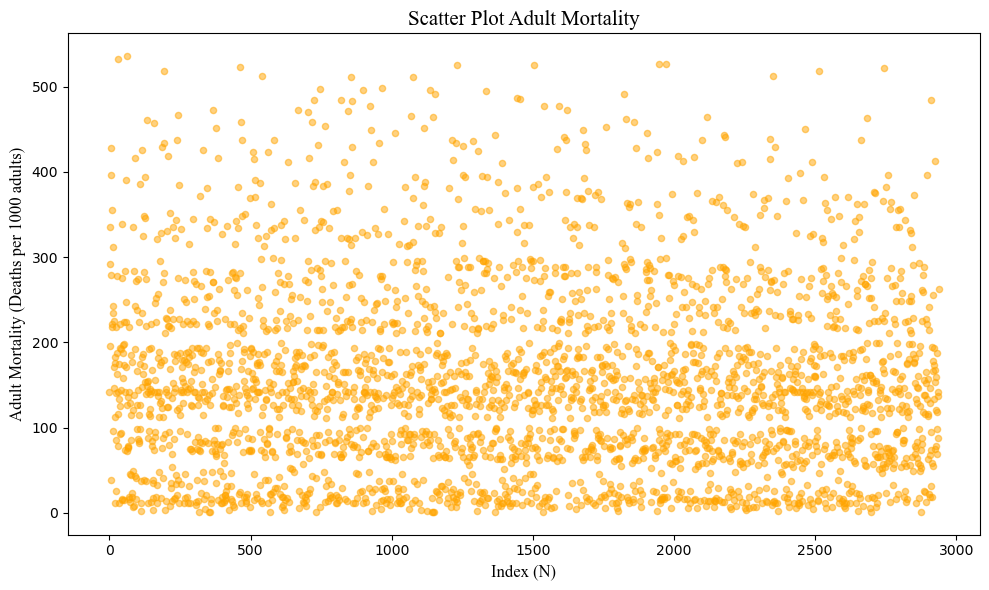

In [278]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Adult Mortality'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Adult Mortality', xlabel='Index (N)', ylabel='Adult Mortality (Deaths per 1000 adults)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

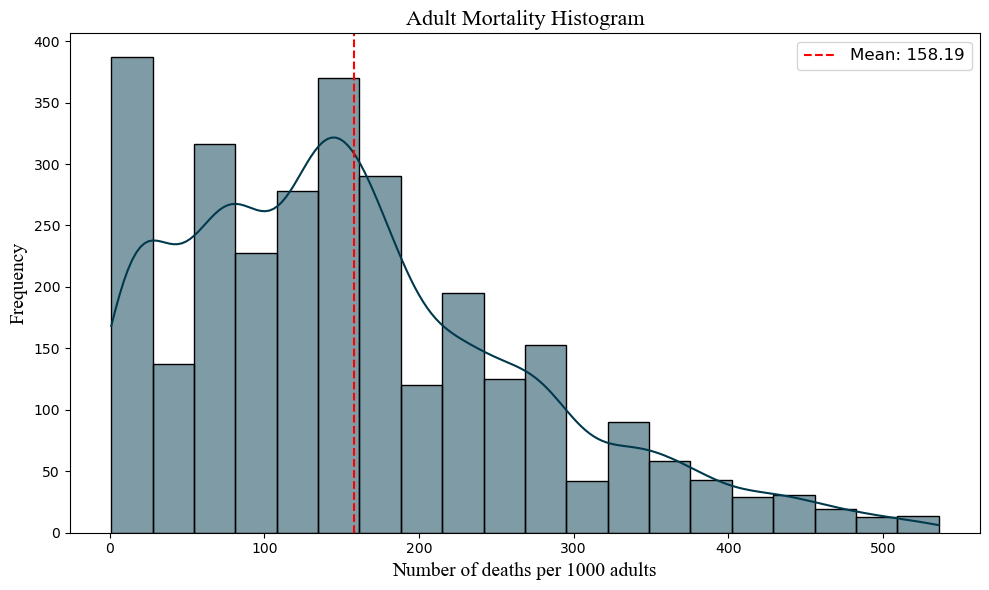

In [279]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Adult Mortality'], errors='coerce').dropna()

plot_histogram(Data, title='Adult Mortality Histogram', xlabel='Number of deaths per 1000 adults', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')

From the figure above we can notice that the data is more skweed to the right side, with lower mean of 158.19 and lower high values. The feature renders the numbers of people how dies from the X to Y for each 1000 person. Based on the relative fact we can say the some countries have high death rates but the frequency of the countires is low.
As a comclusion the numbers of personal to die with in the range is a kind of low.

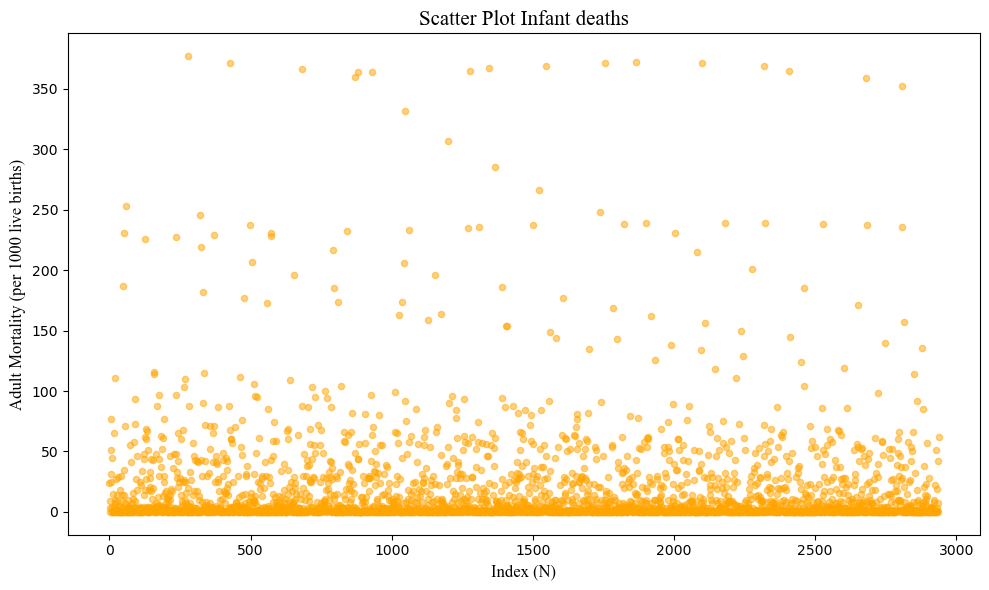

In [280]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Infant deaths'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Infant deaths', xlabel='Index (N)', ylabel='Adult Mortality (per 1000 live births)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

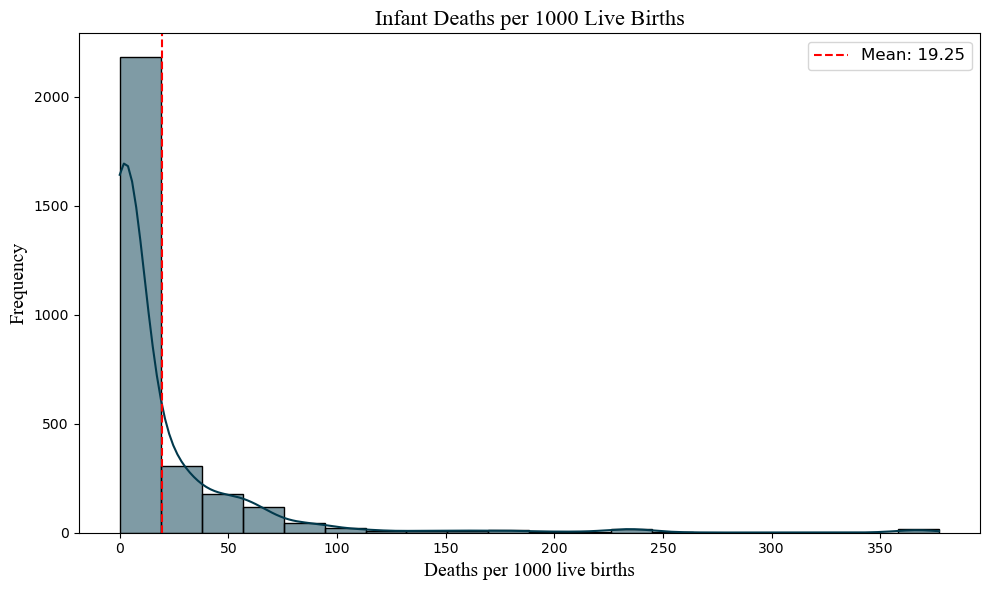

In [281]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Infant deaths'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Infant Deaths per 1000 Live Births',
               xlabel='Deaths per 1000 live births',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

Previously the plot showed possible outliers as the range maxed at 1000 and we had values exceeding the range of measuring. But after cleaning and modeling the range of data shrinked into 400 at max but still skewed to the right.

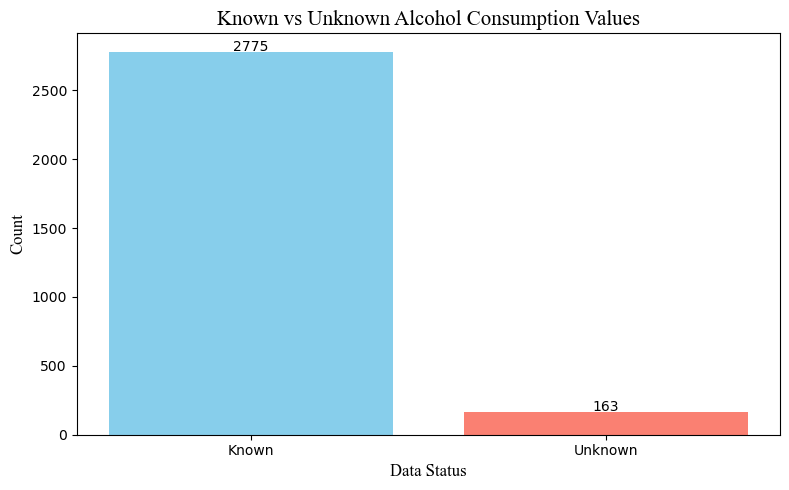

In [282]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Alcohol Consumption Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

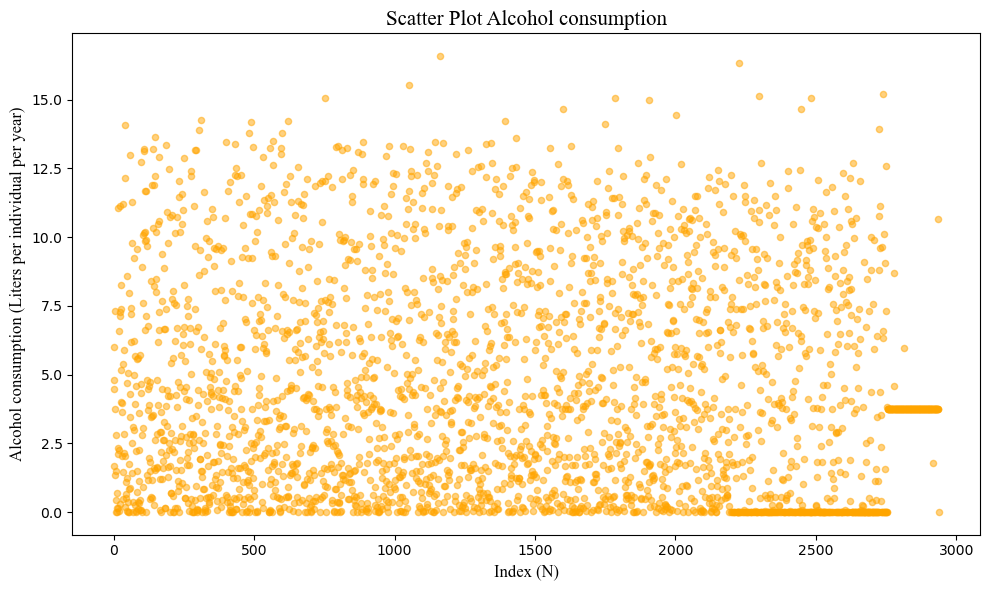

In [283]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Alcohol consumption'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Alcohol consumption', xlabel='Index (N)', ylabel='Alcohol consumption (Liters per individual per year)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

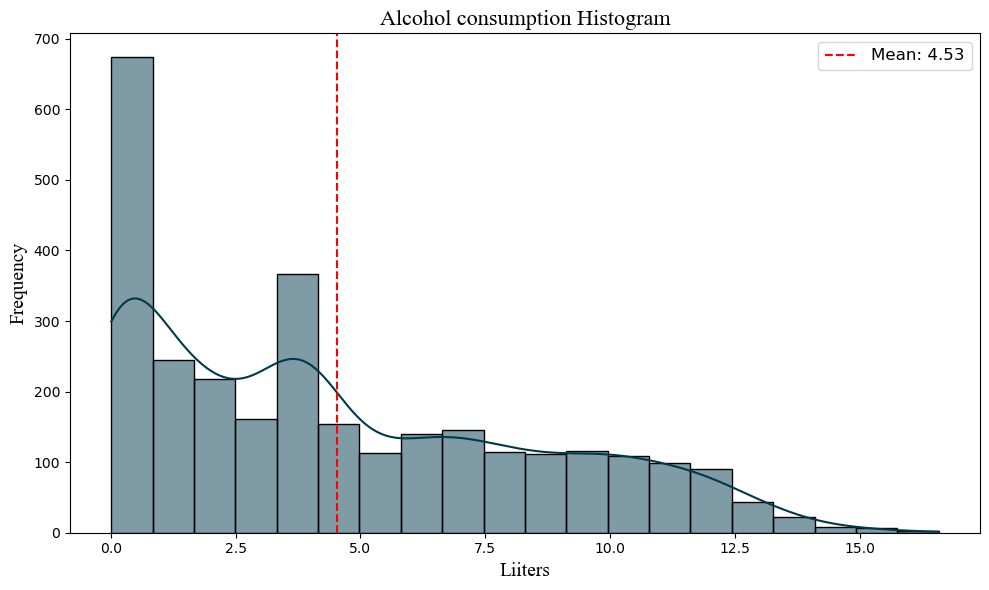

In [284]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Alcohol consumption'], errors='coerce').dropna()

plot_histogram(Data, title='Alcohol consumption Histogram', xlabel='Liiters', ylabel='Frequency',
                   color='#01394c', bins=20, show_kde=True, show_mean=True,
                   figsize=(10, 6), fontname='Times New Roman')


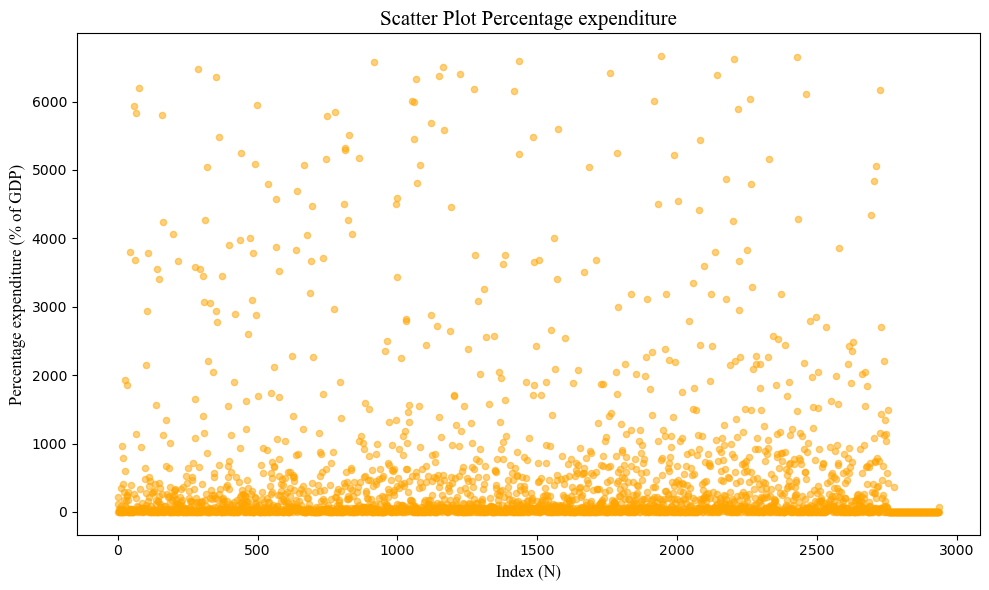

In [285]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Percentage expenditure'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Percentage expenditure', xlabel='Index (N)', ylabel='Percentage expenditure (% of GDP)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

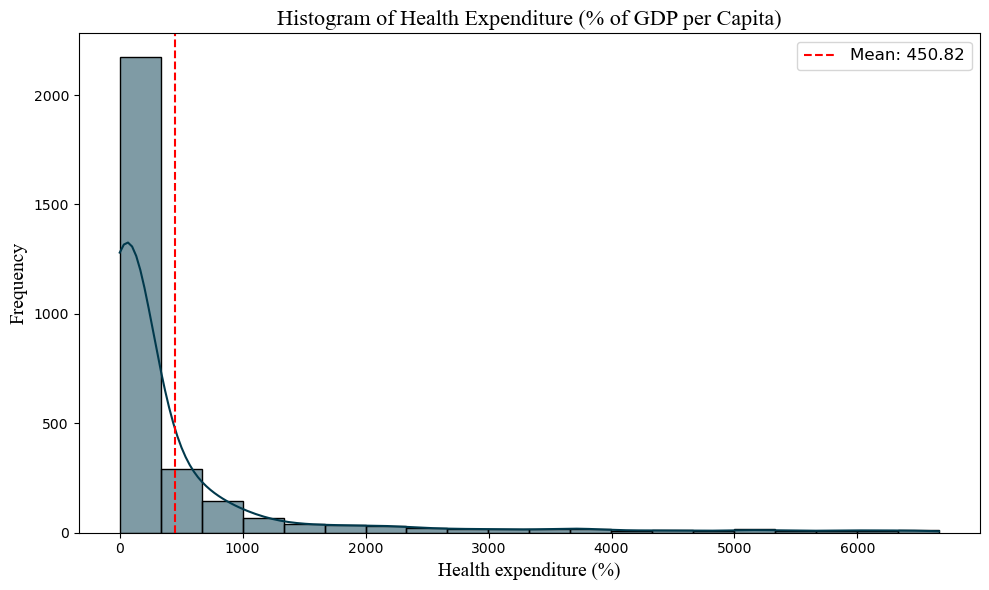

In [286]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Percentage expenditure'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Health Expenditure (% of GDP per Capita)',
               xlabel='Health expenditure (%)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

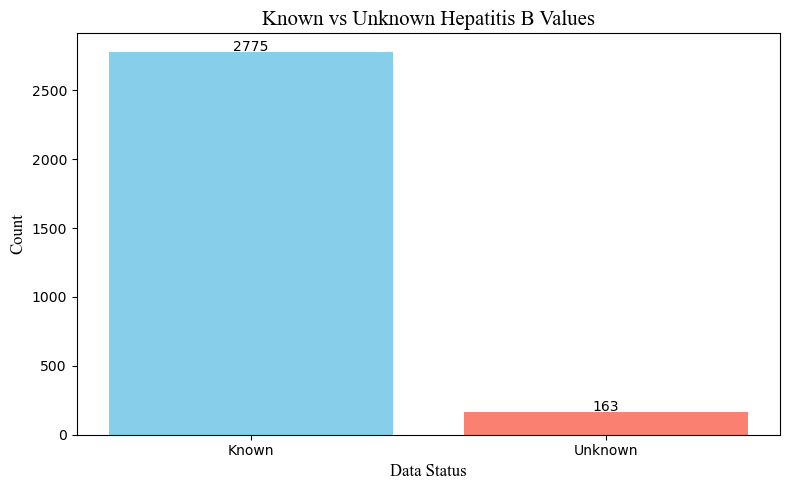

In [287]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Hepatitis B Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

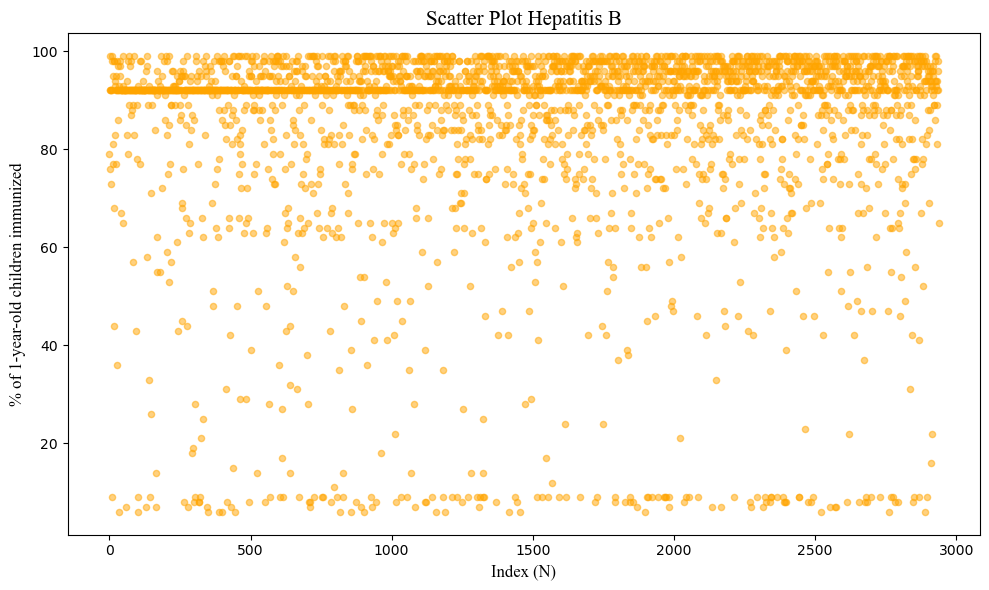

In [288]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Hepatitis B'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Hepatitis B', xlabel='Index (N)', ylabel='% of 1-year-old children immunized',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

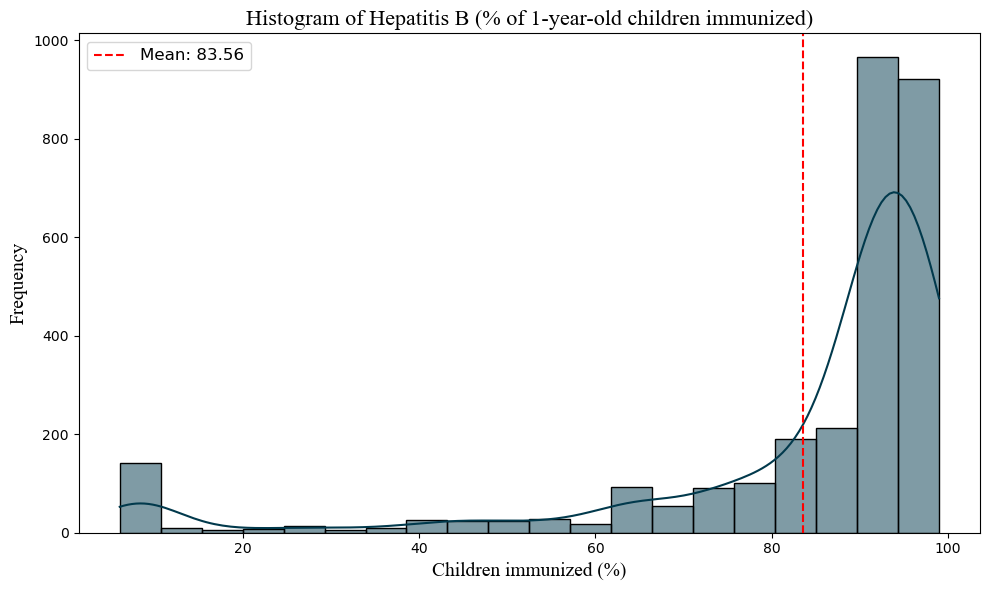

In [289]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Hepatitis B'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Hepatitis B (% of 1-year-old children immunized)',
               xlabel='Children immunized (%)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

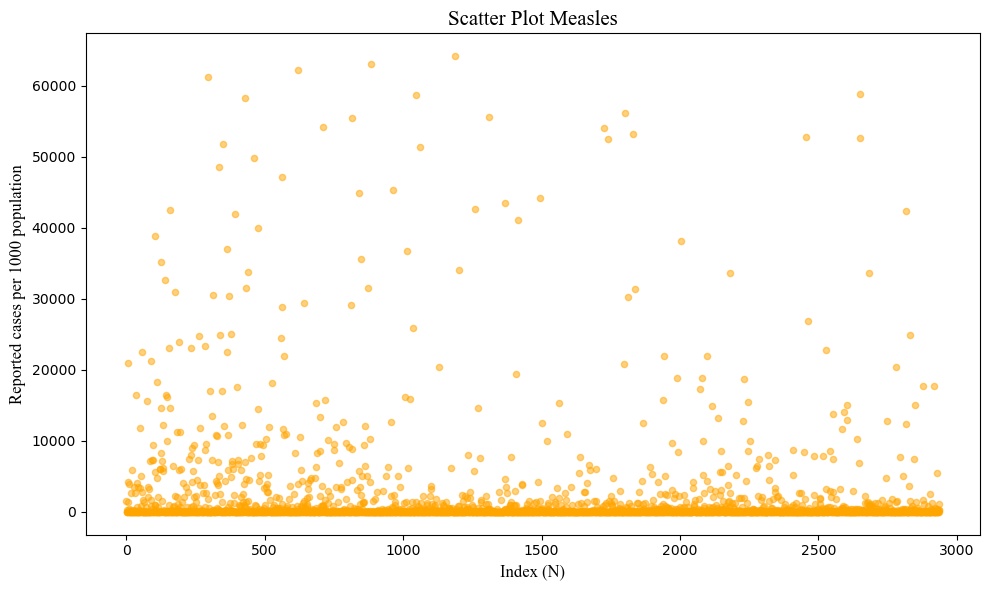

In [290]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Measles'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Measles', xlabel='Index (N)', ylabel='Reported cases per 1000 population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

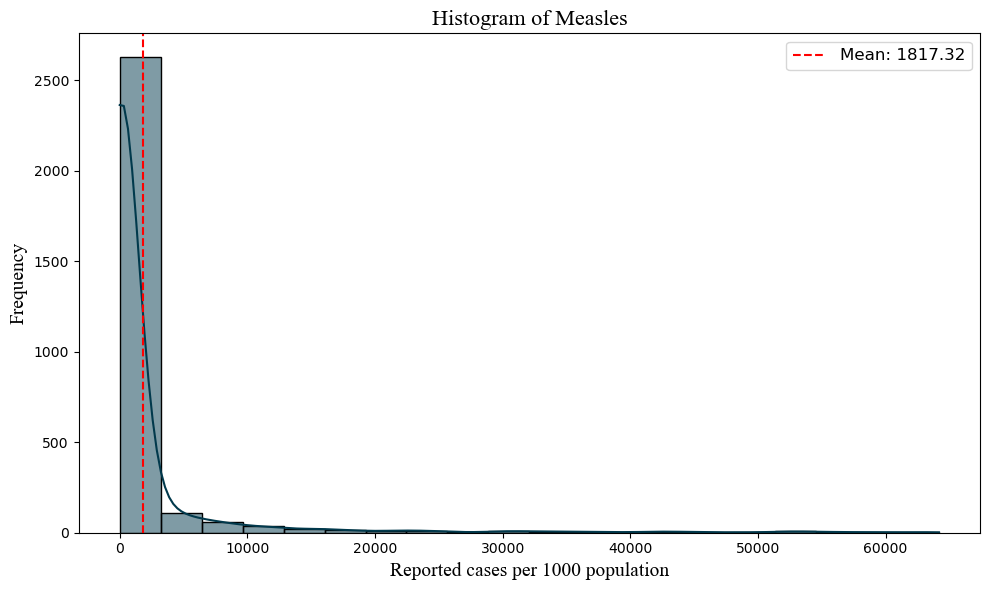

In [291]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Measles'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Measles',
               xlabel='Reported cases per 1000 population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

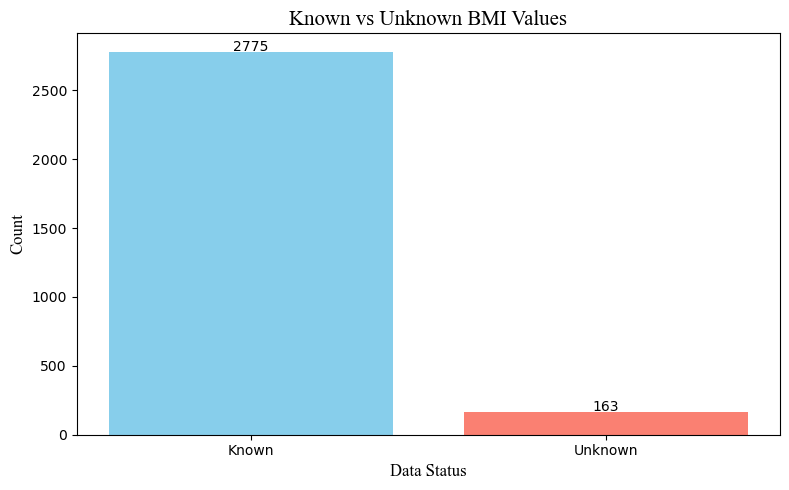

In [292]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown BMI Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

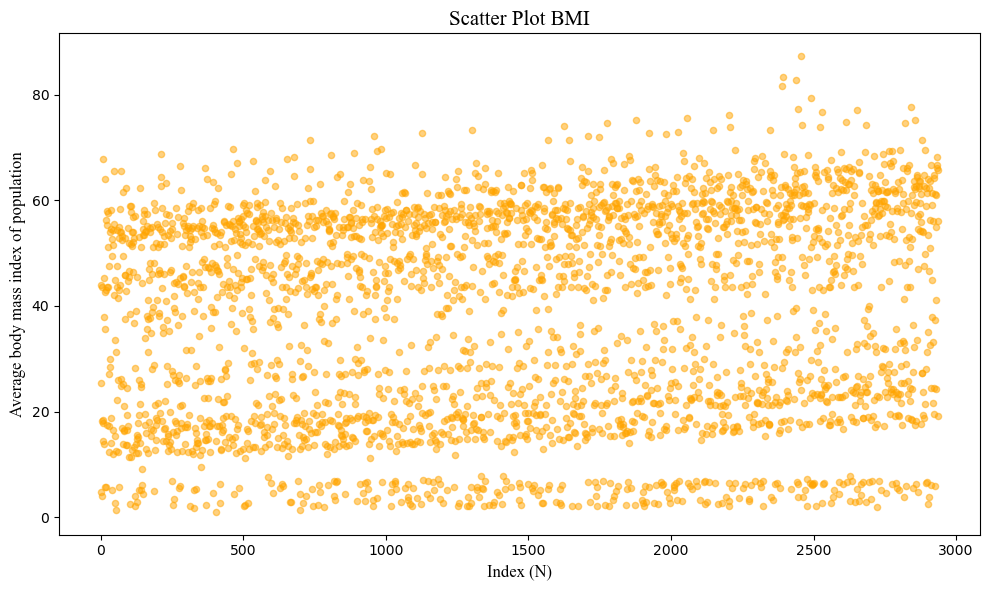

In [293]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['BMI'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot BMI', xlabel='Index (N)', ylabel='Average body mass index of population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

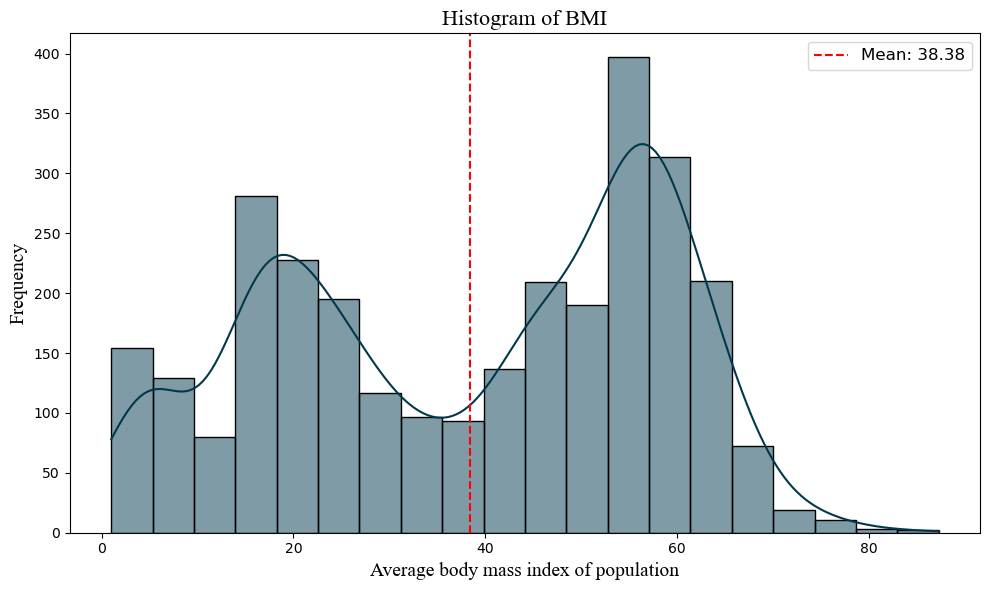

In [294]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['BMI'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of BMI',
               xlabel='Average body mass index of population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

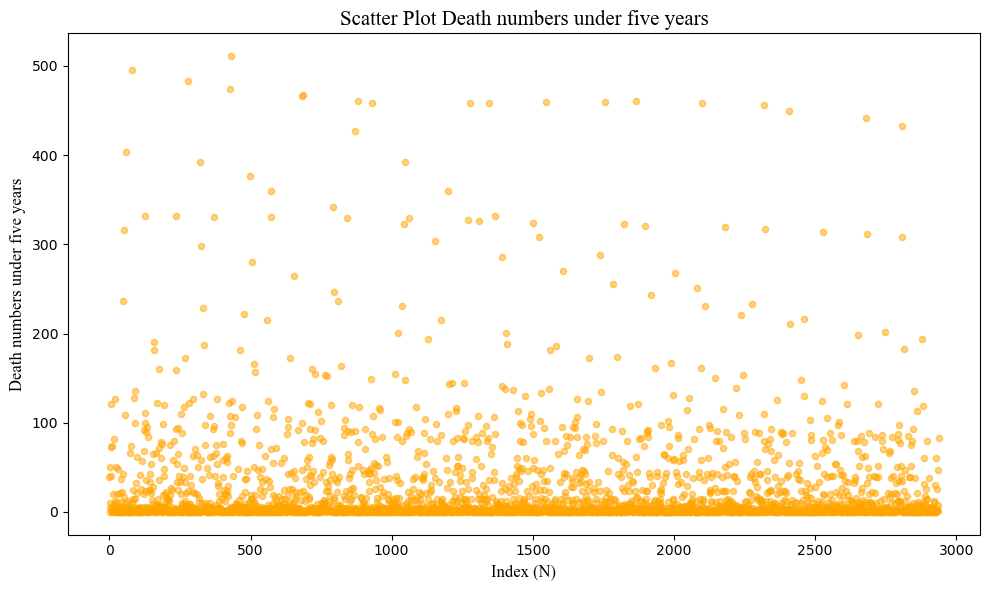

In [295]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Death numbers under-five'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Death numbers under five years', xlabel='Index (N)', ylabel='Death numbers under five years',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

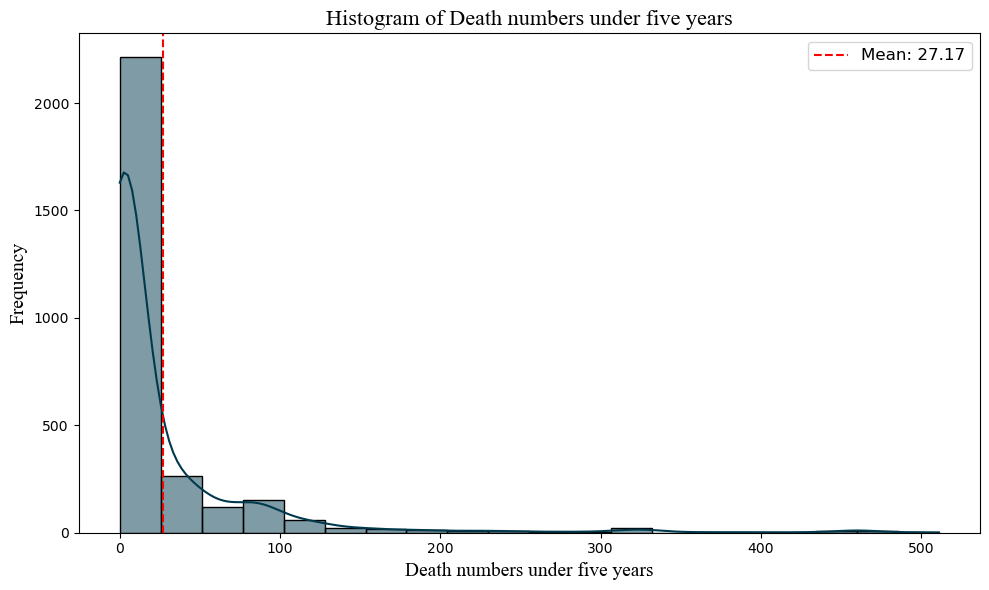

In [296]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Death numbers under-five'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Death numbers under five years',
               xlabel='Death numbers under five years',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

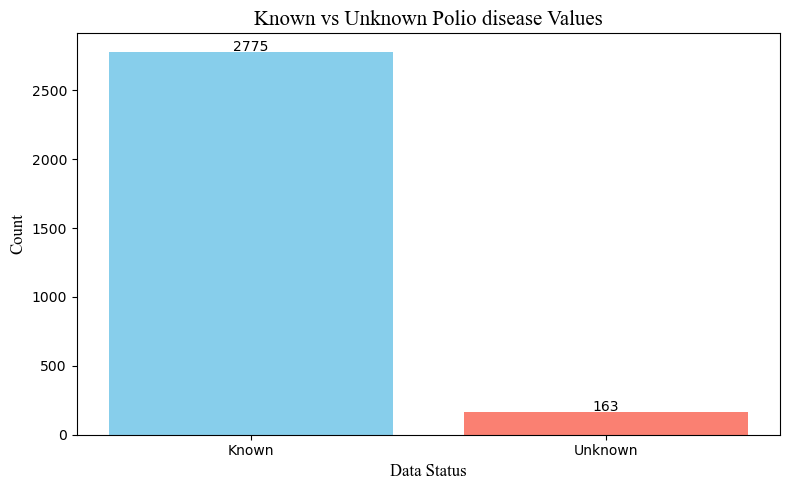

In [297]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Polio disease Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

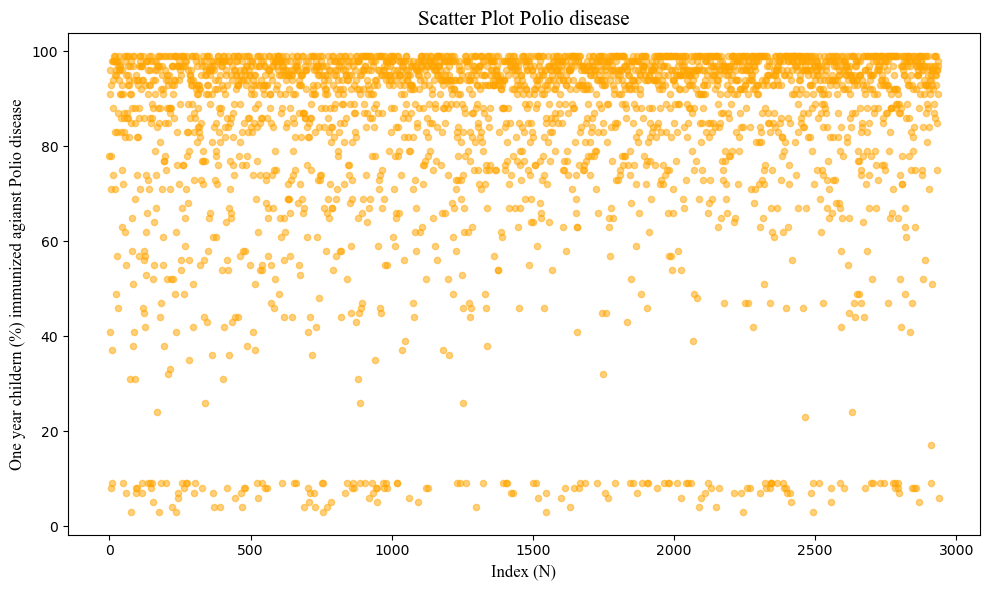

In [298]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Polio disease'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Polio disease', xlabel='Index (N)', ylabel='One year childern (%) immunized agianst Polio disease',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

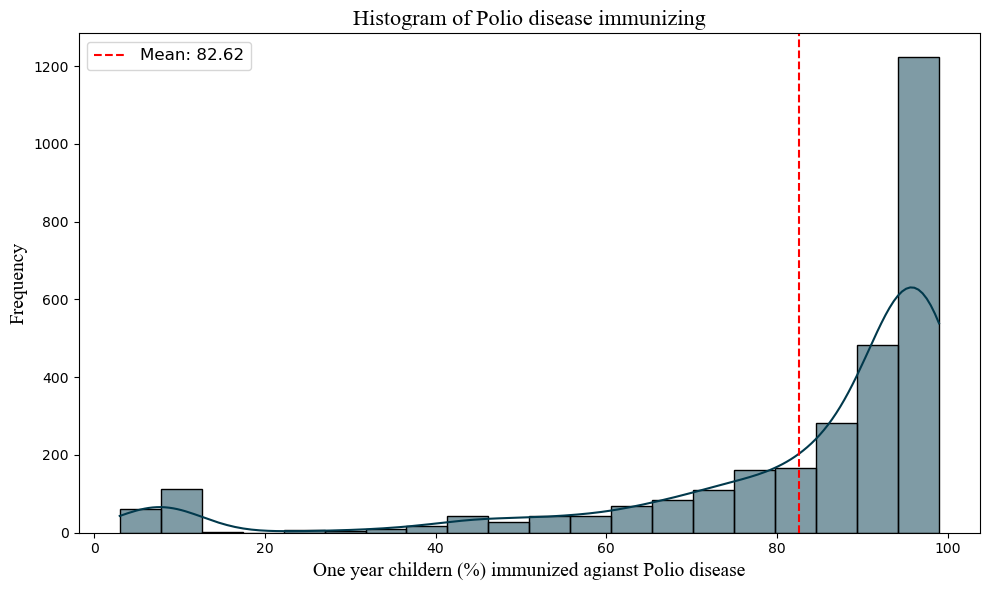

In [299]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Polio disease'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Polio disease immunizing',
               xlabel='One year childern (%) immunized agianst Polio disease',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

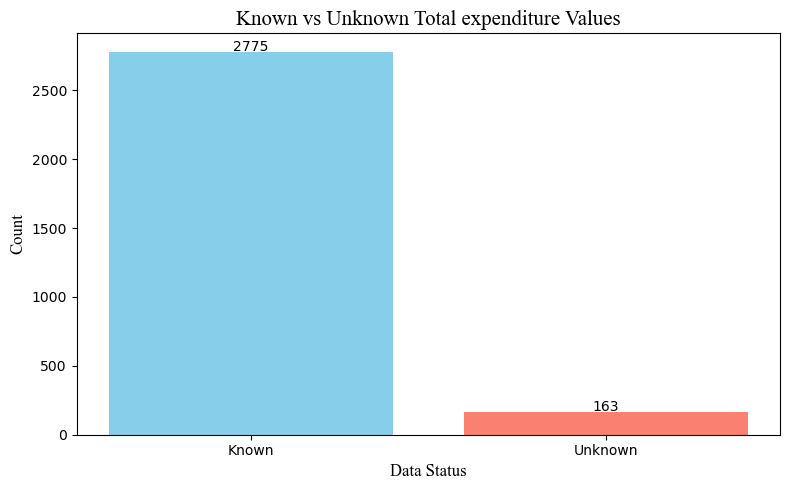

In [300]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Total expenditure Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

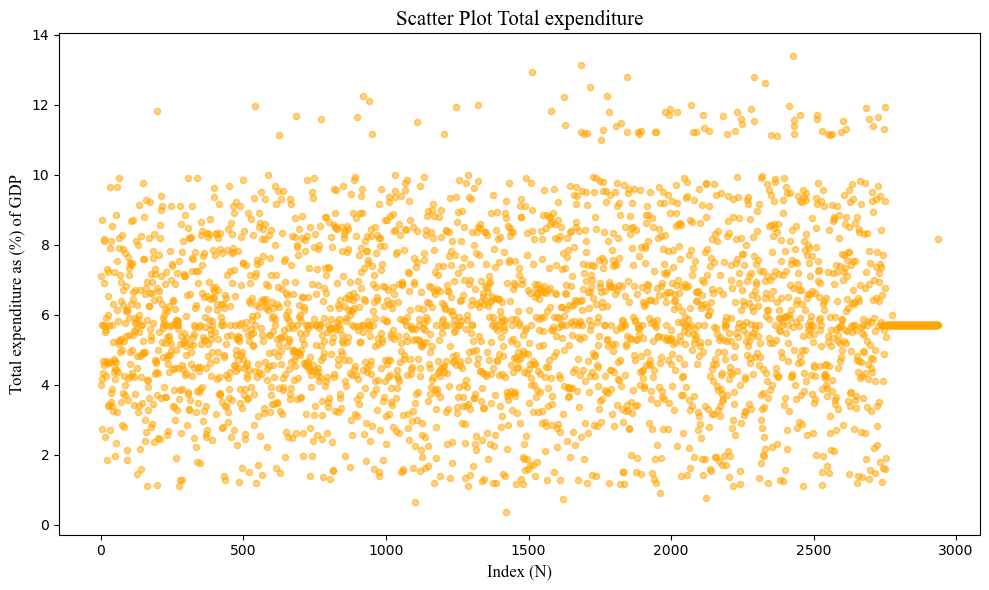

In [301]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Total expenditure'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Total expenditure', xlabel='Index (N)', ylabel='Total expenditure as (%) of GDP',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

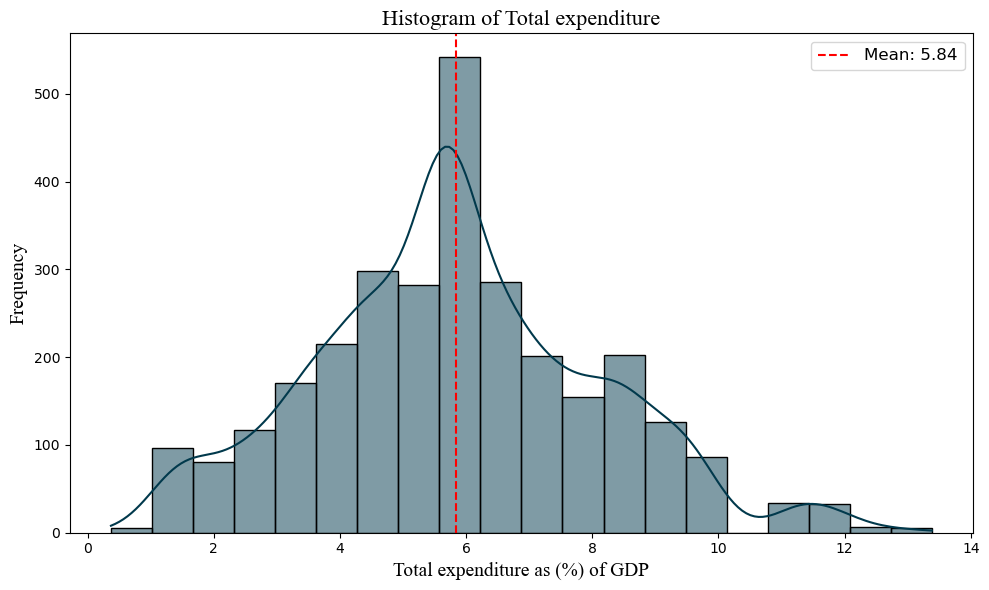

In [302]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Total expenditure'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Total expenditure',
               xlabel='Total expenditure as (%) of GDP',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

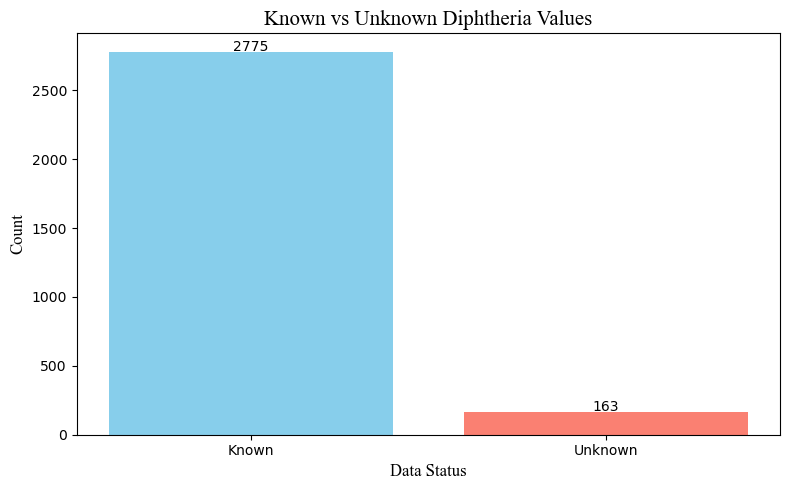

In [303]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Diphtheria Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

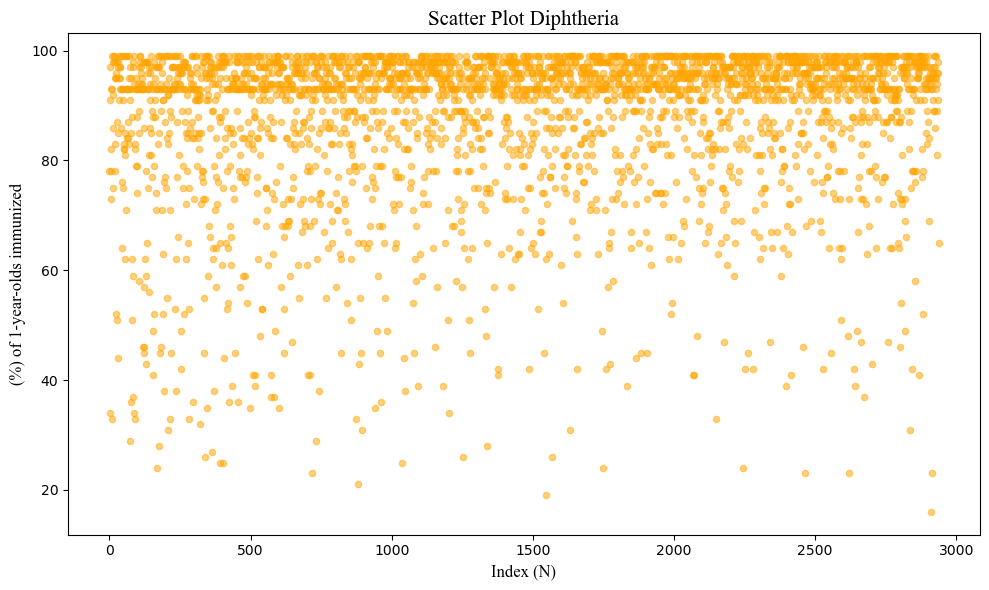

In [304]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Diphtheria'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Diphtheria', xlabel='Index (N)', ylabel='(%) of 1-year-olds immunized',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

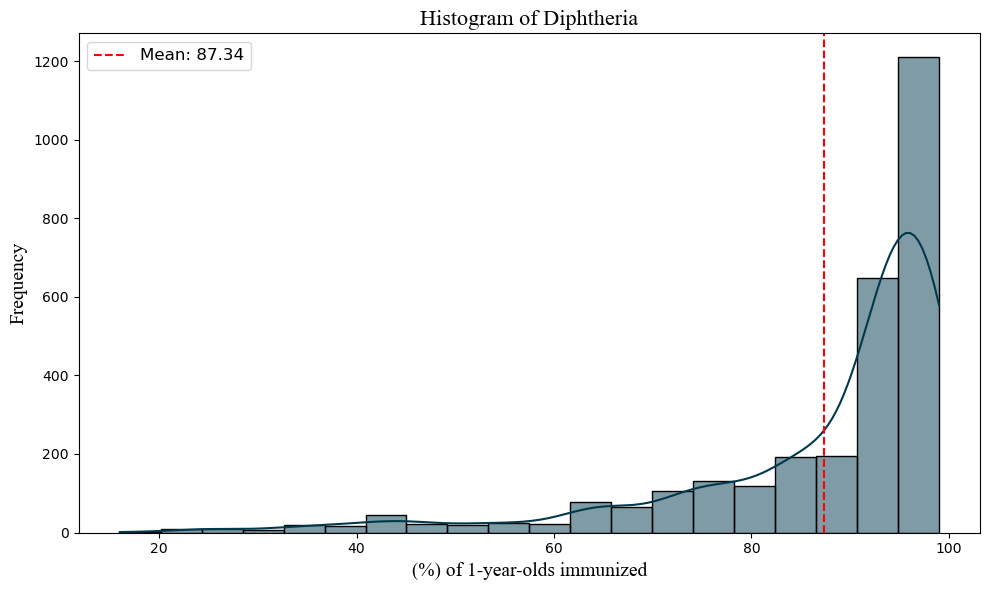

In [305]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Diphtheria'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Diphtheria',
               xlabel='(%) of 1-year-olds immunized',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

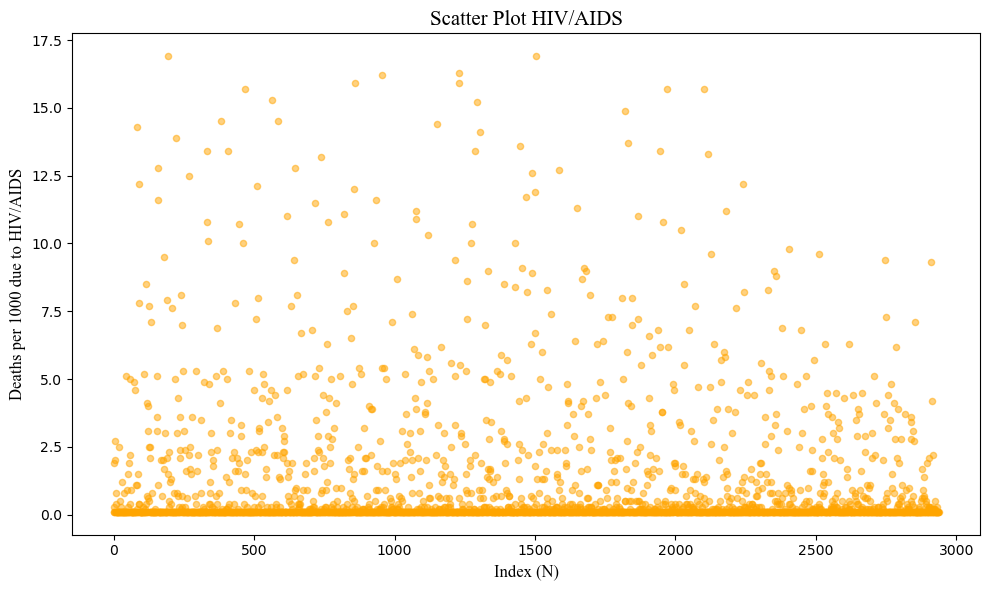

In [306]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['HIV/AIDS'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot HIV/AIDS', xlabel='Index (N)', ylabel='Deaths per 1000 due to HIV/AIDS',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

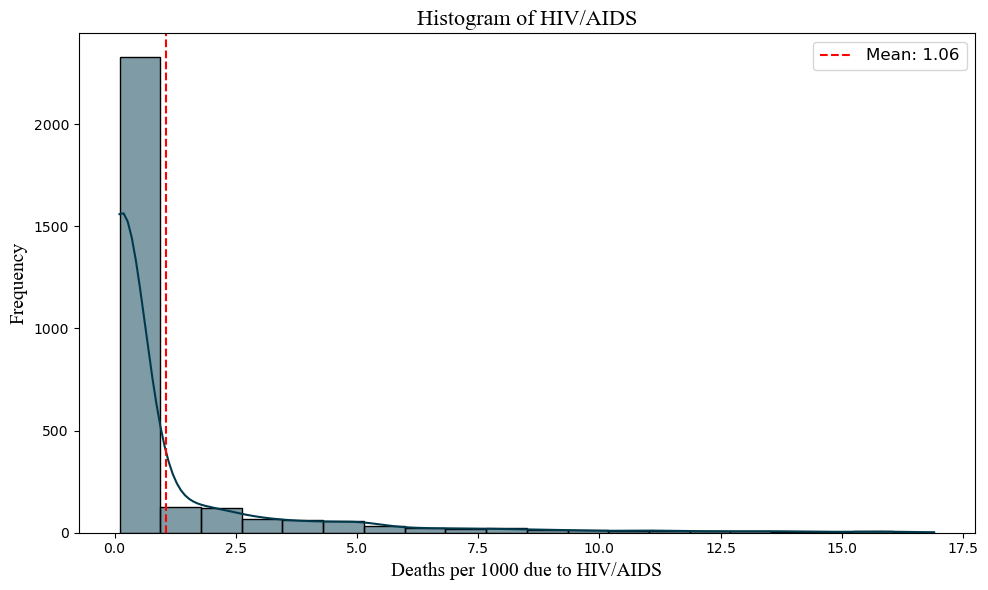

In [307]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['HIV/AIDS'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of HIV/AIDS',
               xlabel='Deaths per 1000 due to HIV/AIDS',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

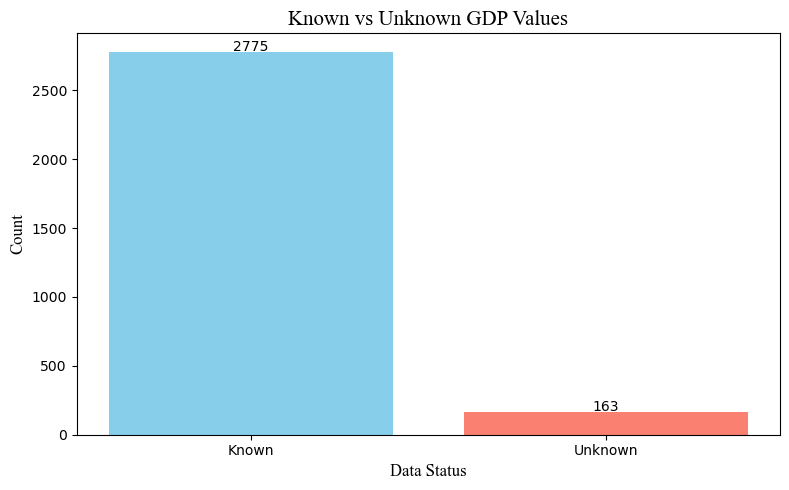

In [308]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown GDP Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

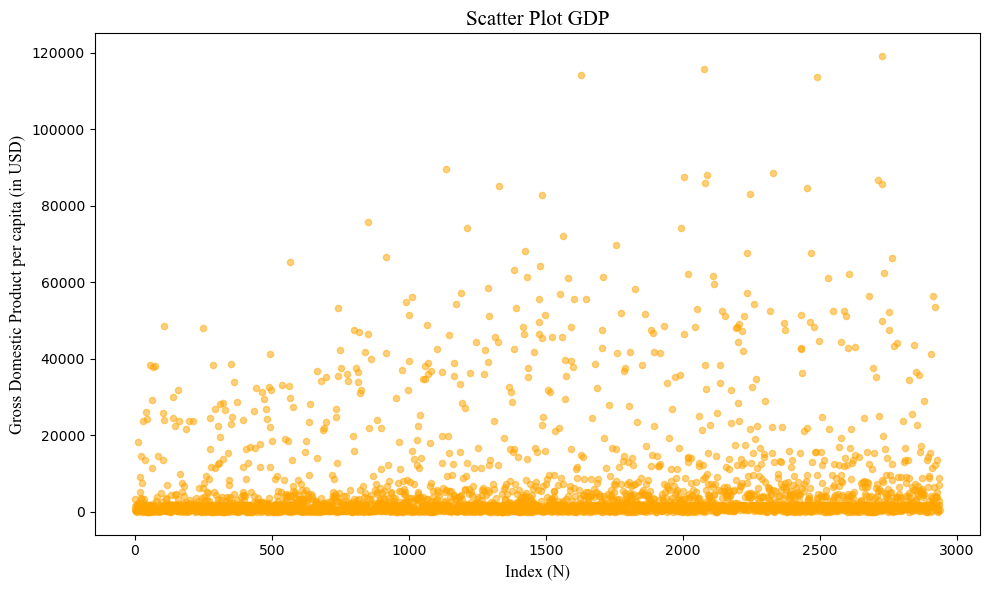

In [309]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['GDP'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot GDP', xlabel='Index (N)', ylabel='Gross Domestic Product per capita (in USD)',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

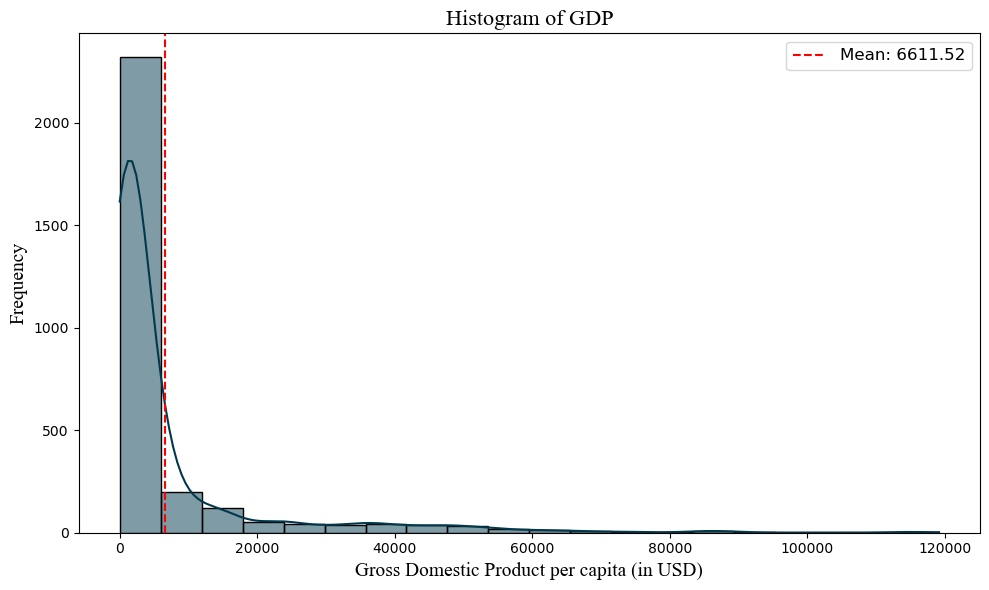

In [310]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['GDP'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of GDP',
               xlabel='Gross Domestic Product per capita (in USD)',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

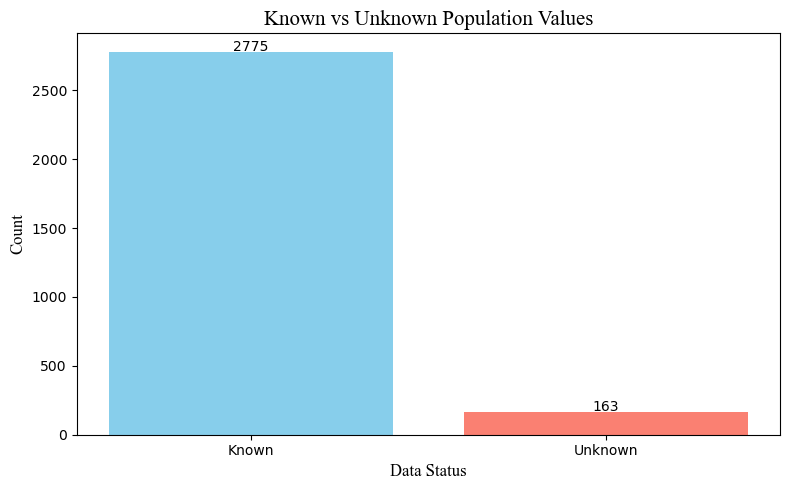

In [311]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Population Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

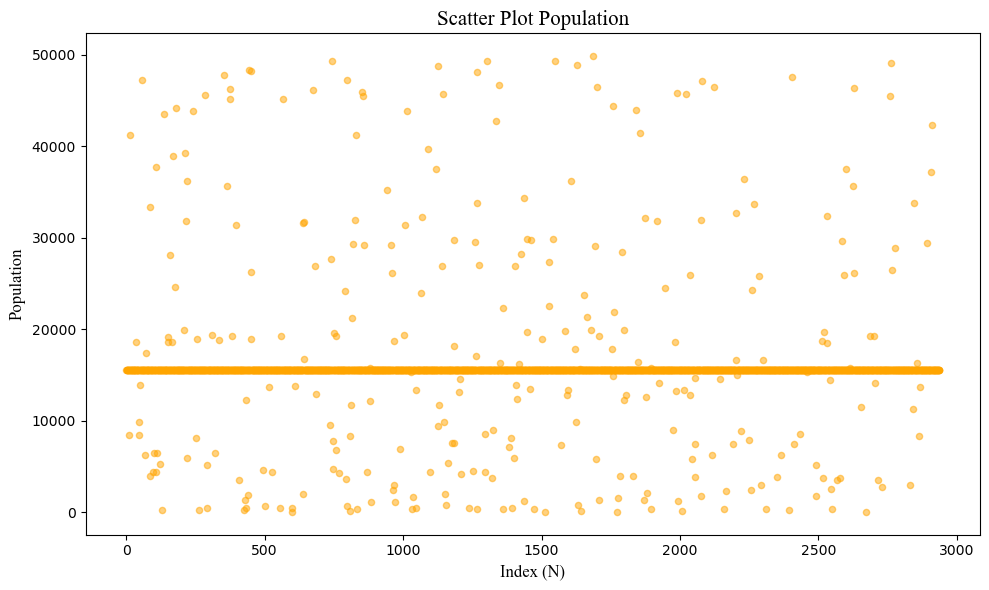

In [312]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Population'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='Population',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

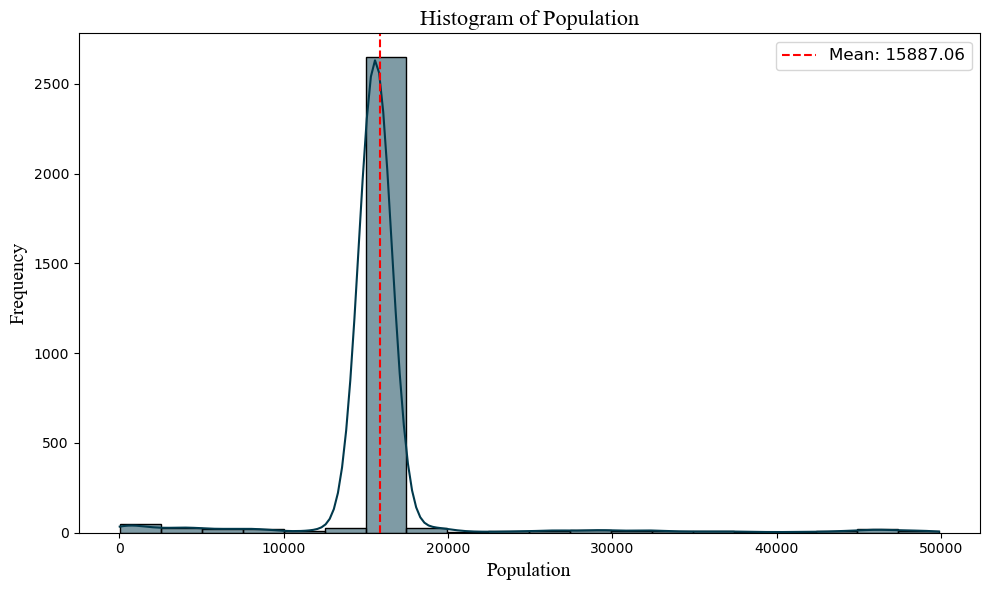

In [313]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Population'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Population',
               xlabel='Population',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

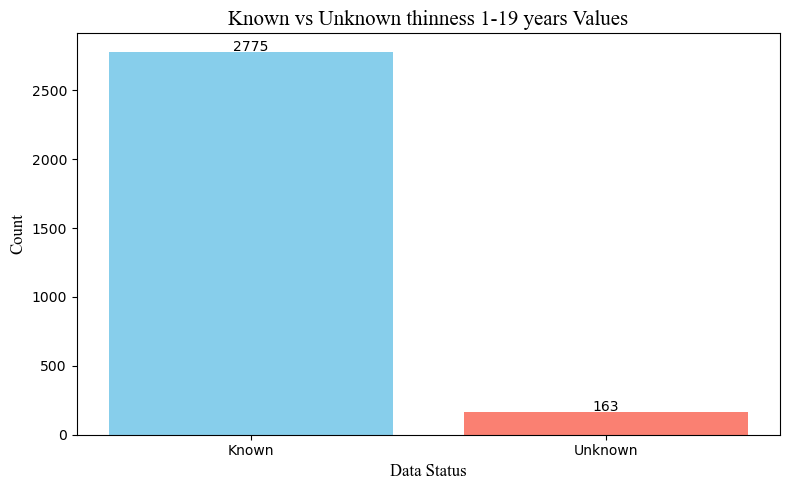

In [314]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown thinness 1-19 years Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

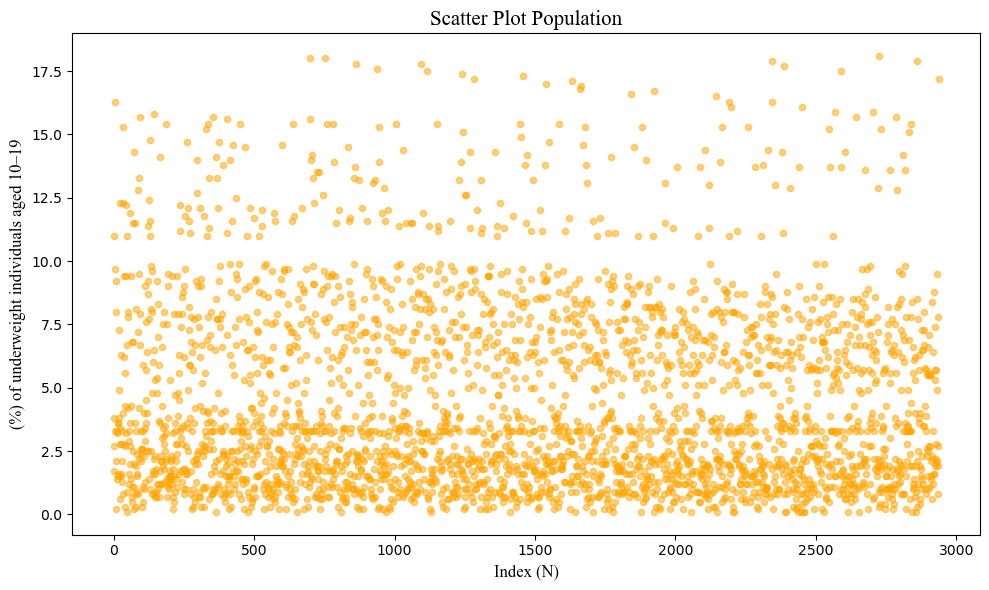

In [315]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 10-19 years'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='(%) of underweight individuals aged 10–19',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

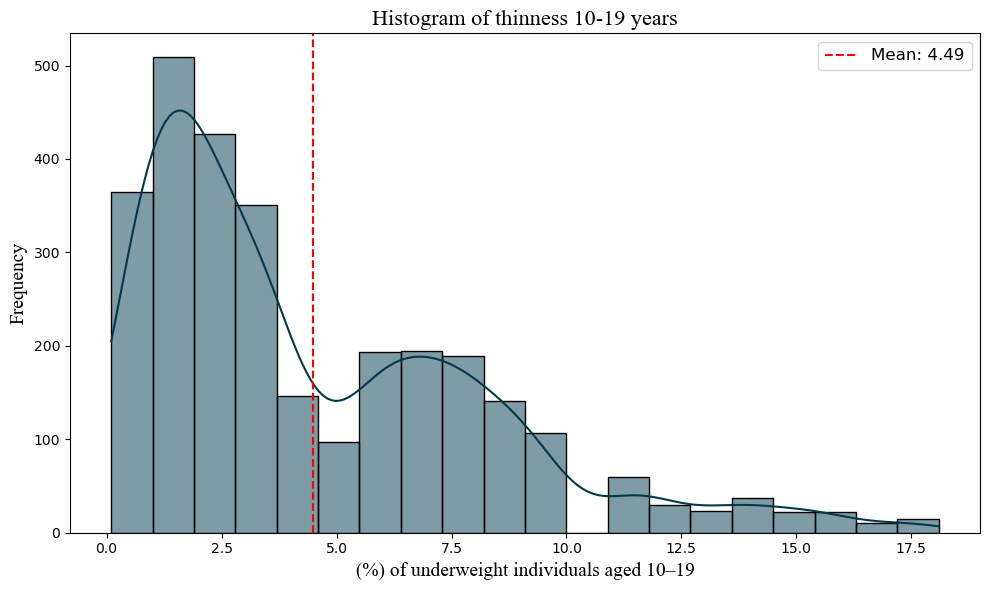

In [316]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 10-19 years'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of thinness 10-19 years',
               xlabel='(%) of underweight individuals aged 10–19',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

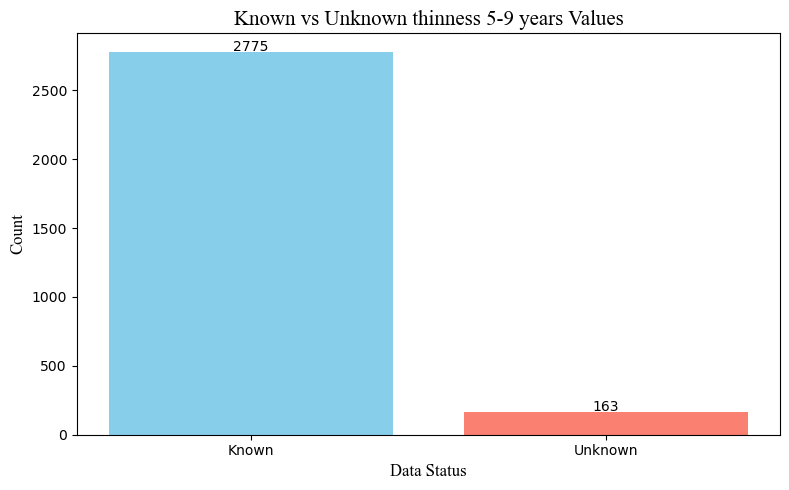

In [317]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown thinness 5-9 years Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

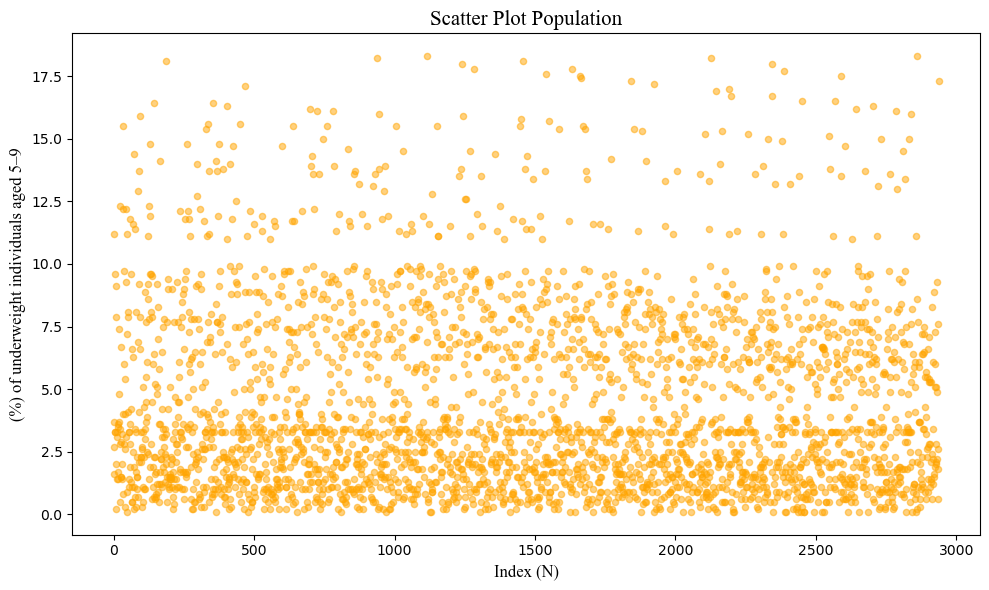

In [318]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 5-9 years'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Population', xlabel='Index (N)', ylabel='(%) of underweight individuals aged 5–9',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

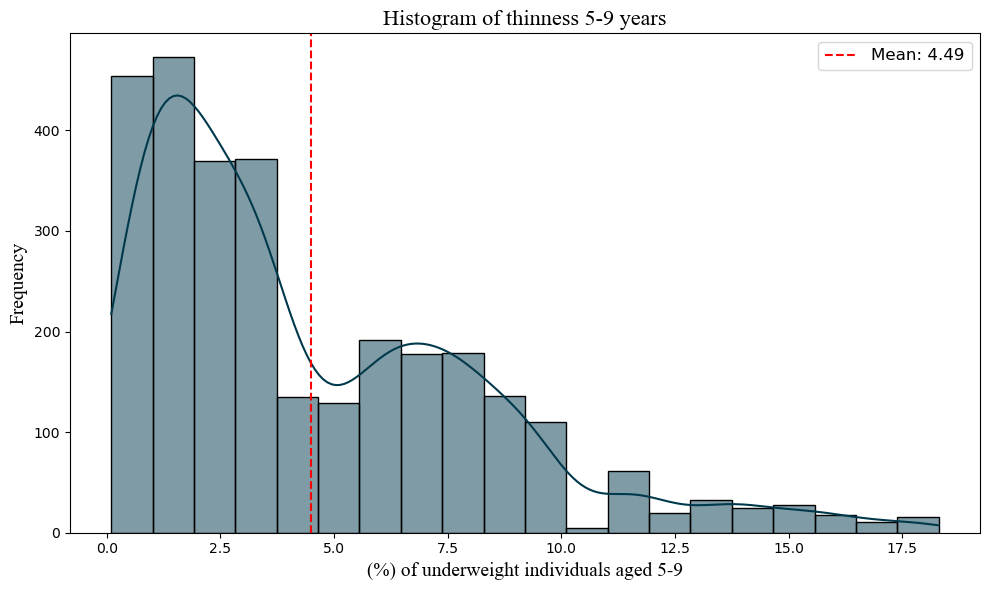

In [319]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Thinness 5-9 years'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of thinness 5-9 years',
               xlabel='(%) of underweight individuals aged 5-9',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

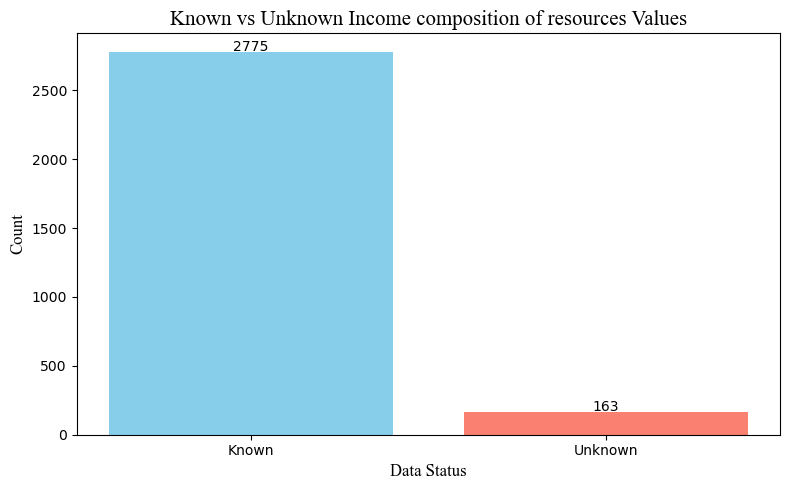

In [320]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Income composition of resources Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

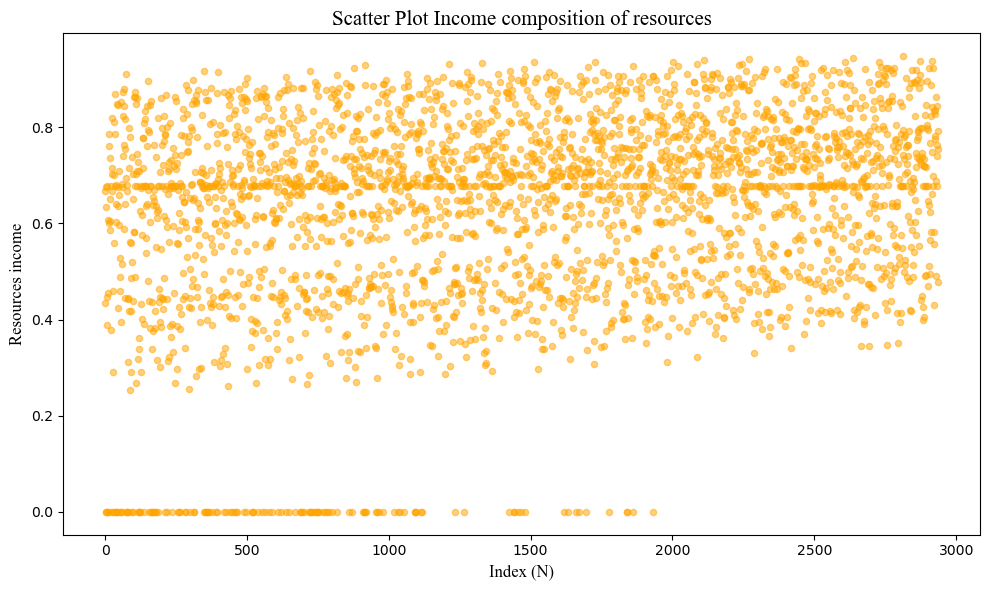

In [321]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Income composition of resources'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Income composition of resources', xlabel='Index (N)', ylabel='Resources income',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

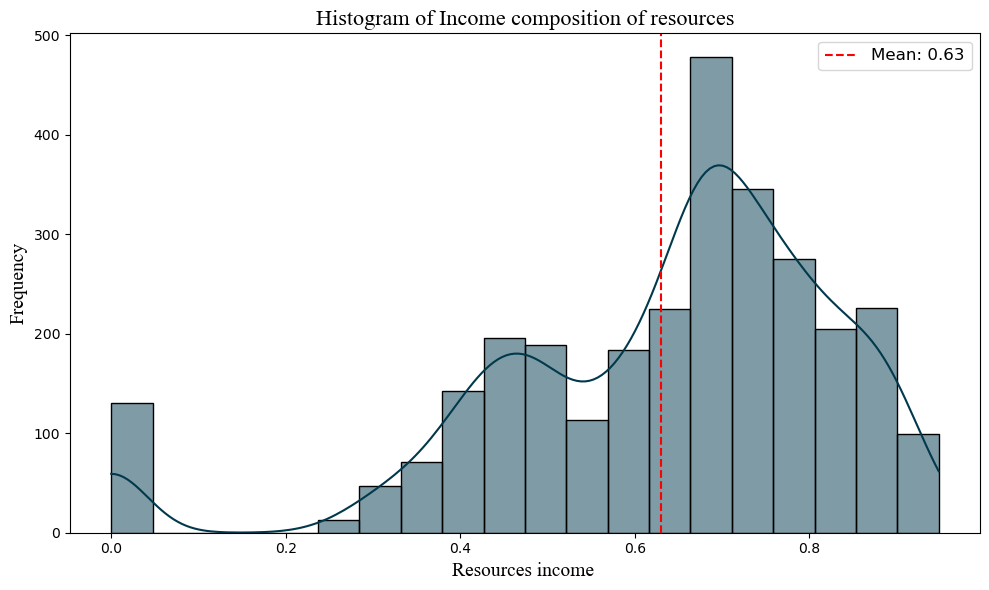

In [322]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Income composition of resources'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Income composition of resources',
               xlabel='Resources income ',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

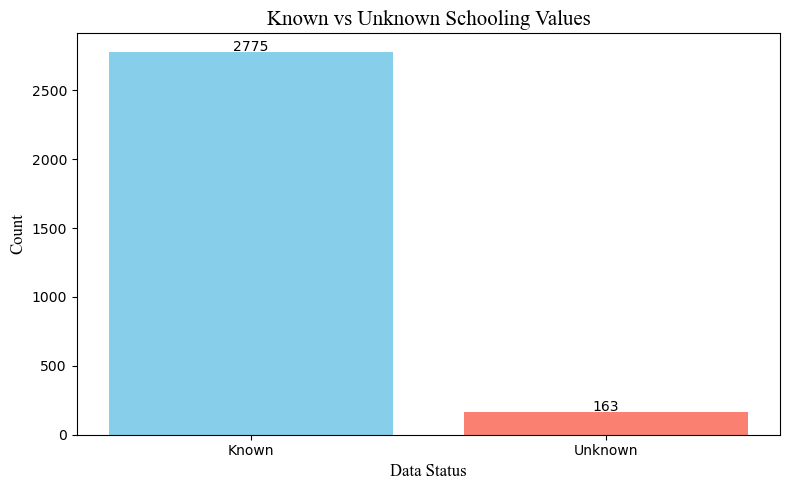

In [323]:
# Bar plot plotting
Data = [known_values, unknown_values]
labels = ['Known', 'Unknown']

plot_categorical_bar(
    Data, labels,
    title='Known vs Unknown Schooling Values',
    xlabel='Data Status', ylabel='Count',
    colors=['skyblue', 'salmon'],
    fontname='Times New Roman',
    figsize=(8, 5),
    label_fontsize=12,
    title_fontsize=15,
    value_fontsize=10,
    text_offset=10
)

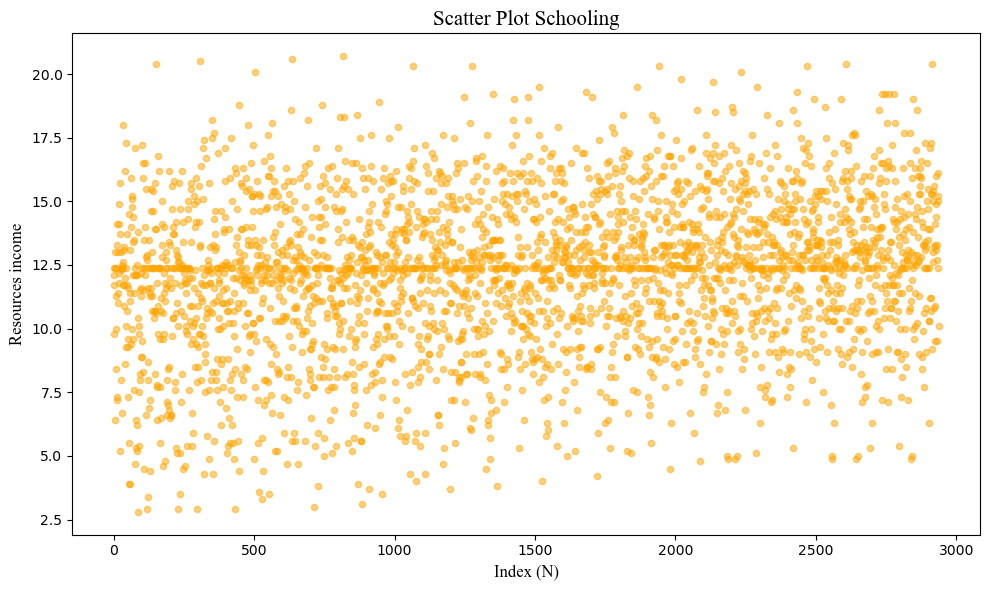

In [324]:
#Scatter plot plotting 
Data = pd.to_numeric(lifeExpectancyDataframe['Schooling'], errors='coerce').dropna()

plot_scatter(Data, title='Scatter Plot Schooling', xlabel='Index (N)', ylabel='Resources income',
                 color='#FFA500', alpha=0.5, point_size=20, figsize=(10, 6),
                 fontname='Times New Roman')

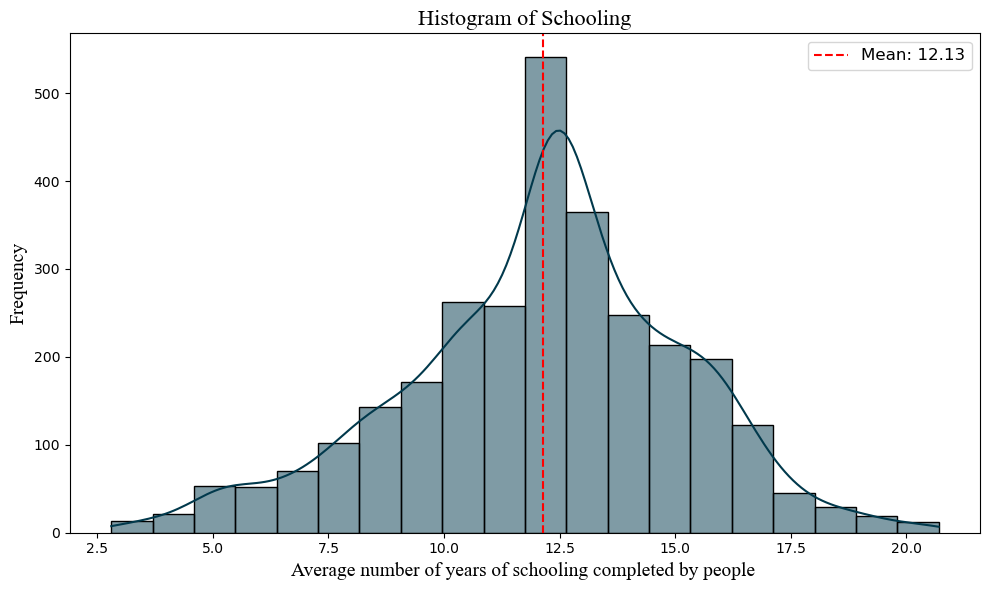

In [325]:
# Histogram plotting
Data = pd.to_numeric(lifeExpectancyDataframe['Schooling'], errors='coerce').dropna()

plot_histogram(Data, 
               title='Histogram of Schooling',
               xlabel='Average number of years of schooling completed by people ',
               ylabel='Frequency',
               color='#01394c',
               bins=20,
               show_kde=True,
               show_mean=True,
               figsize=(10, 6),
               fontname='Times New Roman')

In [326]:
lifeExpectancyDataframe.head(5)

Country    Year      Status  Life expectancy  Adult Mortality  \
0           Zimbabwe  2000.0  Developing         46.00000            142.0   
1             Belize  2000.0  Developing         68.31250            196.0   
2         Kazakhstan  2000.0  Developing         63.90625            292.0   
3  Equatorial Guinea  2000.0  Developing         52.68750            336.0   
4        South Sudan  2000.0  Developing         48.90625             38.0   

   Infant deaths  Alcohol consumption  Percentage expenditure  Hepatitis B  \
0           24.0             1.679688                0.000000         79.0   
1            0.0             4.789062              219.000000         76.0   
2            9.0             6.000000              112.562500         99.0   
3            3.0             4.460938               14.953125         92.0   
4           31.0             3.740234                0.000000         92.0   

   Measles  ...  Polio disease  Total expenditure  Diphtheria  HIV/AIDS  \
0   1483.0  ...           78.0           7.101562        78.0  0.099976   
1      0.0  ...           91.0           3.980469        91.0  0.300049   
2    245.0  ...           96.0           4.160156        97.0  0.099976   
3      0.0  ...           41.0           2.730469        34.0  1.900391   
4      0.0  ...           93.0           5.718750        93.0  2.699219   

           GDP  Population  Thinness 5-9 years  Thinness 10-19 years  \
0   547.358887     15578.0           11.203125             11.000000   
1  3364.423828     15578.0            3.699219              3.800781   
2  1229.958008     15578.0            2.699219              2.699219   
3   172.684906     15578.0            1.599609              1.700195   
4  1766.947571     15578.0            3.300781              3.300781   

   Income composition of resources  Schooling  
0                            0.434   9.796875  
1                            0.668  11.703125  
2                            0.676  12.101562  
3                            0.000  12.398438  
4                            0.000  12.398438  

[5 rows x 22 columns]

In [327]:
# corr_matrix = lifeExpectancyDataframe.corr()
# plt.figure(figsize=(8, 6)) 
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# plt.title('Correlation Heatmap')
# plt.show()

In [328]:
# Group by Country and calculate mean Life expectancy and total GDP
aggregated_data = lifeExpectancyDataframe.groupby('Country').agg({
    'Life expectancy': 'mean', 
    'GDP': 'sum',
    'Status': 'first' 
})

print(aggregated_data)

                                    Life expectancy            GDP      Status
Country                                                                       
Afghanistan                               58.195312    5440.246828  Developing
Albania                                   75.160156   33915.626690  Developing
Algeria                                   73.617188   45565.654207  Developing
Angola                                    49.015625   31602.288940  Developing
Antigua and Barbuda                       75.054688  156148.892090  Developing
...                                             ...            ...         ...
Venezuela (Bolivarian Republic of)        73.390625   28271.161133  Developing
Viet Nam                                  74.769531   28271.161133  Developing
Yemen                                     63.859375   28271.161133  Developing
Zambia                                    53.906250   12988.989495  Developing
Zimbabwe                                  50.488281 

In [329]:
# Group by 'Year' and calculate mean Life expectancy and total GDP
aggregated_data = lifeExpectancyDataframe.groupby('Year').agg({
    'Life expectancy': 'mean', 
    'GDP': 'sum'               
})

print(aggregated_data)

        Life expectancy           GDP
Year                                 
2000.0        66.934768  7.763528e+05
2001.0        67.127561  8.019263e+05
2002.0        67.351093  7.623665e+05
2003.0        67.432889  7.895741e+05
2004.0        67.645833  1.148426e+06
2005.0        68.207821  1.178674e+06
2006.0        68.667179  1.193845e+06
2007.0        69.034665  1.379518e+06
2008.0        69.427596  1.701938e+06
2009.0        69.939037  1.149164e+06
2010.0        70.244877  1.212168e+06
2011.0        70.655738  1.558709e+06
2012.0        70.917008  1.649588e+06
2013.0        71.282060  1.362737e+06
2014.0        71.534836  1.601888e+06
2015.0        71.618682  1.157783e+06
